In [4]:
import pandas as pd
from pandas import DataFrame as DataFrame
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import xgboost as xg

In [5]:
PATH_STATIONS_RAW = 'data/raw/bases_bicimad.csv'
PATH_BIKES_RAW = 'data/raw/bike_data.csv'
PATH_BIKES_CLEAN = 'data/clean/bike_data_clean.csv'
PATH_AEMET_PER_DAY = 'data/raw/other-data/aemet_per_day.json'
PATH_DATASET = {
    'daily': 'data/prepared/bicimad_daily.csv',
    'hourly': 'data/prepared/bicimad_hourly.csv'
}
# columns in raw data
COL_BIKES_ID = 'id'
COL_BIKES_USER_DAY_CODE = 'user_day_code'
COL_BIKES_ID_PLUG_STATION = 'idplug_station'
COL_BIKES_ID_UNPLUG_STATION = 'idunplug_station'
COL_BIKES_ID_PLUG_BASE = 'idplug_base'
COL_BIKES_ID_UNPLUG_BASE = 'idunplug_base'
COL_BIKES_USER_TYPE = 'user_type'
COL_BIKES_TRAVEL_TIME = 'travel_time'
COL_BIKES_AGE_RANGE = 'ageRange'
COL_BIKES_UNPLUG_TIMESTAMP = 'unplug_hourTime'
COL_BIKES_ZIP_CODE = 'zip_code'

# new columns
COL_BIKES_DAY_OF_WEEK = 'day_of_week'
COL_BIKES_HOUR = 'hour'
COL_BIKES_MONTH = 'month'
COL_BIKES_DAY = 'day'
COL_BIKES_DATE = 'date'

COL_BIKES_RIDES = 'rides'
COL_BIKES_RIDES_MEAN_WEEKDAY = 'mean_for_weekday'
COL_BIKES_RIDES_MEAN_WEEKDAY_HOUR = 'mean_for_weekday_and_hour'
COL_BIKES_WEEKEND = 'weekend'
DAYS_IN_WEEKEND = ['Sat', 'Sun']
VALUE_WEEKEND_TRUE = 'weekend'
VALUE_WEEKEND_FALSE = 'weekday'

COL_WEATHER_DATE = 'date'
COL_WEATHER_TEMP_MEAN = 'tmed'
COL_WEATHER_TEMP_MIN = 'tmin'
COL_WEATHER_TEMP_MAX = 'tmax'
COL_WEATHER_HOUR_TEMP_MAX = 'horatmax'
COL_WEATHER_HOUR_TEMP_MIN = 'horatmin'
COL_WEATHER_WIND_MEAN = 'velmedia'
COL_WEATHER_RAIN = 'prec'

COL_WEATHER_TEMP_HOURLY ='temp'
COL_WEATHER_WIND_HOURLY = 'wind'
COL_WEATHER_RAIN_HOURLY = 'rain'

SUNRISE_HOUR = 7
SUNSET_HOUR = 22

TEST_SIZE = 0.2
CATEGORICAL_COLUMNS_DAILY = [
    COL_BIKES_DAY_OF_WEEK,
    COL_BIKES_WEEKEND
]
# TODO create new set of constants for dataset (using COL_BIKES_* and COL_WEATHER_*)?
NUMERICAL_COLUMNS_DAILY = [
    COL_BIKES_RIDES_MEAN_WEEKDAY,
    COL_WEATHER_TEMP_MEAN,
    COL_WEATHER_TEMP_MIN,
    COL_WEATHER_TEMP_MAX,
    COL_WEATHER_RAIN,
    COL_WEATHER_WIND_MEAN
]

ENCODED_CATEGORIAL_COLUMNS_DAILY = ['weekend_weekday', 'weekend_weekend']

FEATURES_DAILY = ENCODED_CATEGORIAL_COLUMNS_DAILY + NUMERICAL_COLUMNS_DAILY
TARGET = COL_BIKES_RIDES

In [6]:
HOME_PATH = '/home/irene/dev/keepler-prueba/keepler-bicimad'

def create_path(home_path: str, relative_path: str) -> str:
    return home_path + '/' + relative_path

Funciones para preparación de los datos (transformación de tipos)

In [7]:
def column_to_float_format(df: DataFrame, column_name: str) -> DataFrame:
    df[column_name] = df[column_name].astype(str).str.replace(',', '.')
    return df

def column_to_numeric(df: DataFrame, column_name: str) -> DataFrame:
    df[column_name] = pd.to_numeric(df[column_name], downcast='float')
    return df

def transform_types_dataset(df:DataFrame) -> DataFrame:
    columns_to_transform = [COL_WEATHER_TEMP_MEAN, COL_WEATHER_TEMP_MIN, COL_WEATHER_TEMP_MAX]
    for column in columns_to_transform:
        df = column_to_float_format(df, column)
        df = column_to_numeric(df, column)
    return df

Funciones para creación, entrenamiento y test de los modelos:

In [8]:
def split_data(df: DataFrame, test_size=0.2):
    # TODO better transform to numpy?
    return train_test_split(df, test_size=test_size)

def encode_categorical(df: DataFrame, categorical_columns: list) -> DataFrame:
    return pd.get_dummies(df, columns=categorical_columns)

def prepare_data(df: DataFrame):
    df_types_transformed = transform_types_dataset(df)
    df_encoded = encode_categorical(df_types_transformed, CATEGORICAL_COLUMNS_DAILY)
    return split_data(df_encoded, TEST_SIZE)

def create_model(model_type: str):
    if model_type == 'linear-regression':
        return create_linear_regression_model()
    else:
        return create_linear_regression_model()

def train(model, df_train, features_columns, target_column):
    return model.fit(df_train[features_columns], df_train[target_column])

def evaluate(model, df_test, features_columns, target_column, metric='rmse') -> int:
    predictions = model.predict(df_test[features_columns])
    if metric == 'rmse':
        rmse = math.sqrt(metrics.mean_absolute_error(predictions, df_test[target_column]))
    return rmse

Modelo de regresión lineal (funciones propias):

In [9]:
def fit_model(model: LinearRegression, train_features, train_target) -> LinearRegression:
    return model.fit(train_features, train_target)

def create_linear_regression_model() -> LinearRegression:
    return LinearRegression()

def get_score(model, train_features, train_target) -> int:
    return model.score(train_features, train_target)


def rmsle(y_true, y_pred,convertExp=True):
    if convertExp:
        y_true = np.exp(y_true),
        y_pred = np.exp(y_pred)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y_true]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_pred]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#### Carga de datos, preparación del dataset (transformación de tipos, codificación de variables categóricas):

In [10]:
dataset_hourly = pd.read_csv(create_path(HOME_PATH, PATH_DATASET.get("hourly")))
dataset_daily = pd.read_csv(create_path(HOME_PATH, PATH_DATASET.get("daily")))

In [12]:
dataset_hourly.head()

,day_of_week,hour,rides,weekend,mean_for_weekday_and_hour,tmax,tmin,rain,wind,temp
0,Sat,1,456,weekend,470.00,"33,6","21,0",0.0,1.1,"21,0"
1,Sat,2,342,weekend,396.50,"33,6","21,0",0.0,1.1,"21,0"
2,Sat,3,275,weekend,293.25,"33,6","21,0",0.0,1.1,"21,0"
3,Sat,4,183,weekend,190.25,"33,6","21,0",0.0,1.1,"21,0"
4,Sat,5,137,weekend,151.75,"33,6","21,0",0.0,1.1,"21,0"


Comprobación de que nuestros datos siguen una distribución normal:

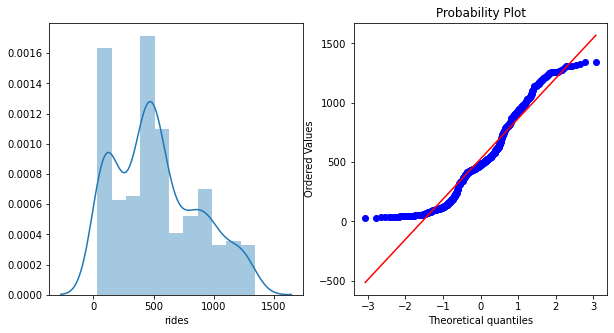

In [74]:
fig,axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
dist = sns.distplot(dataset_hourly[COL_BIKES_RIDES],ax=axes[0])
prob = stats.probplot(dataset_hourly[COL_BIKES_RIDES], dist='norm', fit=True, plot=axes[1])

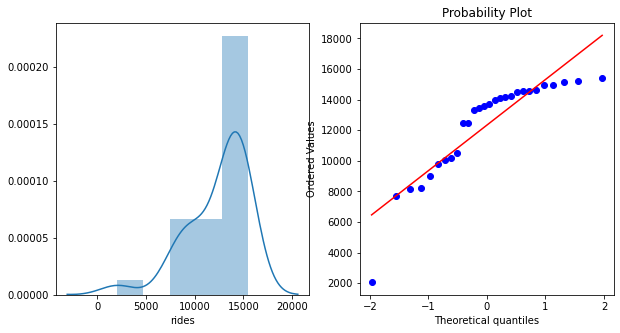

In [75]:
fig,axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
dist = sns.distplot(dataset_daily[COL_BIKES_RIDES],ax=axes[0]) # was macht distplot?
prob = stats.probplot(dataset_daily[COL_BIKES_RIDES], dist='norm', fit=True, plot=axes[1])

Test Shapiro para confirmar hipótesis de normalidad: (rechazo de hipótesis si p < 0.05)

In [89]:
from scipy.stats import shapiro
stat_hourly, p_hourly = shapiro(dataset_hourly[COL_BIKES_RIDES])
stat_daily, p_daily = shapiro(dataset_daily[COL_BIKES_RIDES])
print("Dataset horario: ")
print(stat_hourly, p_hourly)
print("Dataset diario: ")
print(stat_daily, p_daily)

Dataset horario: 
0.9461052417755127 1.0338342900132694e-14
Dataset diario: 
0.8222179412841797 0.00027004245202988386


Nuestros datos no siguen una distribución normal, por lo que debemos tener cuidado a la hora de aplicar modelos de machine learning (cada modelo asume un conjunto de hipótesis). Una opción sería transformar dicha variable usando una transformación log-normal. o una función boxcox [TODO]

Transformación log-normal a datos horarios

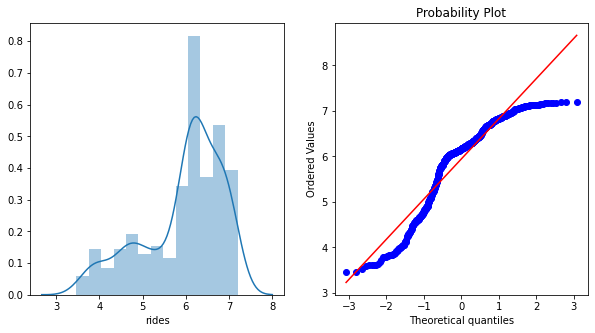

In [114]:
fig,axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
dist = sns.distplot(np.log(dataset_hourly[COL_BIKES_RIDES]),ax=axes[0])
prob = stats.probplot(np.log(dataset_hourly[COL_BIKES_RIDES]),  dist='norm', fit=True, plot=axes[1])

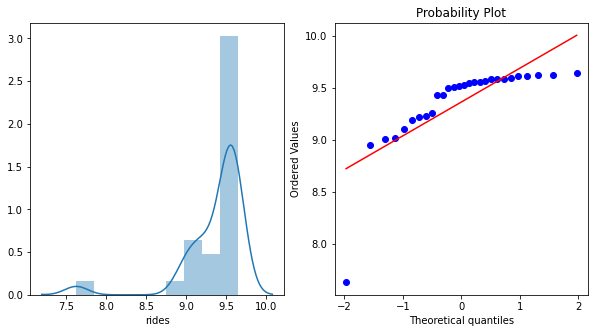

In [115]:
fig,axes = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
dist = sns.distplot(np.log(dataset_daily[COL_BIKES_RIDES]),ax=axes[0])
prob = stats.probplot(np.log(dataset_daily[COL_BIKES_RIDES]),  dist='norm', fit=True, plot=axes[1])

Seguimos sin tener un resultado idealmente normal. 

### Modelo Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_error

In [17]:
train_daily, test_daily = prepare_data(dataset_daily)

In [162]:
def evaluate(model, test_features, test_target):
    
    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    metrics_result = {}
    predictions = model.predict(test_features)
    metrics_result['mae'] = mean_absolute_error(predictions, test_target)
    metrics_result['mse']  = mean_squared_error(predictions, test_target)
    metrics_result['r2'] = r2_score(predictions, test_target)
    metrics_result['mape'] = mean_absolute_percentage_error(test_target, predictions)
    metrics_result['acc'] = 100 - metrics_result['mape']
    return metrics_result

In [178]:
rf_baseline = RandomForestRegressor(n_estimators=10)
rf_baseline.fit(train_daily[FEATURES_DAILY].values, train_daily[TARGET].values)
rf_baseline_metrics = evaluate(rf_baseline, test_daily[FEATURES_DAILY], test_daily[TARGET])
rf_baseline_metrics

{'mae': 1399.9333333333336,
 'mse': 4319079.640000001,
 'r2': 0.3874503446091634,
 'mape': 10.116647559756727,
 'acc': 89.88335244024327}

In [145]:
rf = RandomForestRegressor()

In [155]:
GRID_SEARCH_PARAMETERS_RF = [
    {
        'n_estimators': [10, 20, 30]
    }
]

def grid_search_cv(estimator, parameters_grid, train_features, train_target):
    grid_search = GridSearchCV(estimator=estimator, param_grid=parameters_grid)
    grid_search = grid_search.fit(train_features, train_target)
    return grid_search

In [156]:
gs = grid_search_cv(rf, GRID_SEARCH_PARAMETERS_RF, train_daily[FEATURES_DAILY], train_daily[TARGET])

In [157]:
gs.best_params_

{'n_estimators': 10}

In [ ]:
gs.best_estimator_

In [158]:
rf_gs_metrics = evaluate(gs.best_estimator_, test_daily[FEATURES_DAILY], test_daily[TARGET])

In [159]:
rf_gs_metrics

{'mae': 747.6999999999999, 'mse': 865888.9233333332, 'r2': 0.8725189343752113}

In [38]:
rf_baseline_metrics = evaluate(rf_baseline, test_daily[FEATURES_DAILY], test_daily[TARGET])

-3.102253061516646

In [40]:
gs.verbose

0

In [186]:
PATH_RESULTS = {
    'daily': {
        'random-forest':{
            'model' :'data/results/randomforest/daily/randomforestmodel',
            'metrics': 'data/results/randomforest/daily/metrics'
        },
        'deep-learning': 'aaa'
    },
    'hourly':
    {
        'random-forest':{
            'model' : 'data/results/randomforest/hourly/randomforestmodel',
            'metrics': 'data/results/randomforest/hourly/metrics'
        }
    }
}

In [192]:
PATH_RESULTS['daily']['random-forest']['model']

'data/results/randomforest/daily/randomforestmodel'

### Modelo deep learning

In [163]:
dataset_daily.iloc[23]

day_of_week             Mon
rides                 13589
weekend             weekday
mean_for_weekday    13218.5
tmed                     26
prec                      0
velmedia                1.9
tmax                     32
tmin                     20
Name: 23, dtype: object

In [137]:
train_daily, test_daily = prepare_data(dataset_daily)

In [155]:
test_daily

,rides,mean_for_weekday,tmed,prec,velmedia,tmax,tmin,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,weekend_weekday,weekend_weekend
11,14981,14556.00,23.200001,0.0,0.6,29.000000,17.299999,0,0,0,0,0,0,1,1,0
23,13589,13218.50,26.000000,0.0,1.9,32.000000,20.000000,0,1,0,0,0,0,0,1,0
9,13466,13218.50,22.799999,0.0,1.9,28.299999,17.299999,0,1,0,0,0,0,0,1,0
4,13959,14556.00,23.000000,0.0,2.8,27.799999,18.299999,0,0,0,0,0,0,1,1,0
8,9035,9269.25,21.000000,0.0,0.8,26.299999,15.800000,0,0,0,1,0,0,0,0,1
19,15429,14939.75,25.700001,0.0,1.1,31.500000,19.900000,0,0,0,0,1,0,0,1,0


In [132]:
import torch

In [138]:
train_daily[FEATURES_DAILY].head(1)

,weekend_weekday,weekend_weekend,mean_for_weekday,tmed,tmin,tmax,prec,velmedia
1,0,1,9269.25,27.5,20.200001,34.799999,1.2,1.7


In [ ]:
[1.0000e+00, 0.0000e+00, 1.4940e+04, 2.1000e+01, 1.5700e+01, 2.6400e+01,
        # 0.0000e+00, 3.0000e-01]

In [139]:
torch.tensor(train_daily[FEATURES_DAILY].values)[0]

tensor([0.0000e+00, 1.0000e+00, 9.2692e+03, 2.7500e+01, 2.0200e+01, 3.4800e+01,
        1.2000e+00, 1.7000e+00], dtype=torch.float64)

In [123]:
train_daily, test_daily = prepare_data(dataset_daily)



train_daily.head()

,rides,mean_for_weekday,tmed,prec,velmedia,tmax,tmin,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,weekend_weekday,weekend_weekend
24,14659,14296.50,23.200001,0.0,2.2,29.299999,17.200001,0,0,0,0,0,1,0,1,0
9,13466,13218.50,22.799999,0.0,1.9,28.299999,17.299999,0,1,0,0,0,0,0,1,0
4,13959,14556.00,23.000000,0.0,2.8,27.799999,18.299999,0,0,0,0,0,0,1,1,0
16,13347,13218.50,24.700001,1.2,1.9,30.799999,18.600000,0,1,0,0,0,0,0,1,0
12,15196,14939.75,25.400000,0.0,0.8,32.200001,18.600000,0,0,0,0,1,0,0,1,0


In [140]:
losses = [168971824.0, 155817408.0, 143343520.0, 131532568.0, 120270232.0, 109557912.0, 99395264.0, 89779120.0, 80705032.0, 72169216.0, 64170844.0, 56713672.0, 49807556.0, 43468536.0, 37718240.0, 32582040.0, 28086542.0, 24256046.0, 21110038.0, 18654094.0, 16875468.0, 15745739.0, 15211530.0, 15193094.0, 15586061.0, 16267058.0, 17103246.0, 17964578.0, 18736642.0, 19331468.0, 19694234.0, 19804652.0, 19673702.0, 19336816.0, 18845358.0, 18257972.0, 17632922.0, 17022180.0, 16467459.0, 15998169.0, 15631039.0, 15371075.0, 15213414.0, 15145689.0, 15150611.0, 15208400.0, 15298968.0, 15403647.0, 15505034.0, 15590186.0, 15652933.0, 15688801.0, 15696601.0, 15677941.0, 15636608.0, 15577906.0, 15507976.0, 15433142.0, 15359356.0, 15291708.0, 15234118.0, 15189098.0, 15157735.0, 15139743.0, 15133676.0, 15137213.0, 15147505.0, 15161533.0, 15176436.0, 15189785.0, 15199776.0, 15205325.0, 15206068.0, 15202284.0, 15194750.0, 15184579.0, 15173013.0, 15161281.0, 15150433.0, 15141261.0, 15134257.0, 15129578.0, 15127128.0, 15126565.0, 15127423.0, 15129160.0, 15131236.0, 15133190.0, 15134658.0, 15135403.0, 15135345.0, 15134497.0, 15132984.0, 15130993.0, 15128746.0, 15126462.0, 15124326.0, 15122483.0, 15121023.0, 15119965.0, 15119290.0, 15118927.0, 15118789.0, 15118767.0, 15118764.0, 15118701.0, 15118513.0, 15118178.0, 15117689.0, 15117068.0, 15116347.0, 15115565.0, 15114773.0, 15114007.0, 15113293.0, 15112651.0, 15112088.0, 15111590.0, 15111150.0, 15110748.0, 15110359.0, 15109964.0, 15109554.0, 15109114.0, 15108643.0, 15108141.0, 15107617.0, 15107075.0, 15106526.0, 15105980.0, 15105439.0, 15104911.0, 15104399.0, 15103897.0, 15103409.0, 15102922.0, 15102442.0, 15101959.0, 15101472.0, 15100976.0, 15100472.0, 15099961.0, 15099444.0, 15098923.0, 15098402.0, 15097876.0, 15097355.0, 15096831.0, 15096309.0, 15095794.0, 15095276.0, 15094758.0, 15094238.0, 15093719.0, 15093196.0, 15092669.0, 15092140.0, 15091609.0, 15091076.0, 15090541.0, 15090003.0, 15089467.0, 15088929.0, 15088389.0, 15087848.0, 15087308.0, 15086767.0, 15086222.0, 15085676.0, 15085129.0, 15084582.0, 15084032.0, 15083480.0, 15082929.0, 15082371.0, 15081815.0, 15081259.0, 15080701.0, 15080142.0, 15079580.0, 15079018.0, 15078454.0, 15077890.0, 15077323.0, 15076755.0, 15076187.0, 15075618.0, 15075044.0, 15074474.0, 15073898.0, 15073321.0, 15072745.0, 15072165.0, 15071585.0, 15071005.0, 15070422.0, 15069838.0, 15069257.0, 15068668.0, 15068080.0, 15067491.0, 15066903.0, 15066311.0, 15065717.0, 15065123.0, 15064528.0, 15063932.0, 15063333.0, 15062733.0, 15062134.0, 15061532.0, 15060930.0, 15060324.0, 15059718.0, 15059112.0, 15058505.0, 15057897.0, 15057286.0, 15056674.0, 15056059.0, 15055446.0, 15054830.0, 15054212.0, 15053596.0, 15052977.0, 15052356.0, 15051734.0, 15051110.0, 15050484.0, 15049860.0, 15049233.0, 15048606.0, 15047977.0, 15047346.0, 15046714.0, 15046081.0, 15045445.0, 15044811.0, 15044174.0, 15043535.0, 15042897.0, 15042259.0, 15041616.0, 15040971.0, 15040330.0, 15039685.0, 15039037.0, 15038390.0, 15037743.0, 15037090.0, 15036441.0, 15035788.0, 15035135.0, 15034478.0, 15033824.0, 15033167.0, 15032507.0, 15031848.0, 15031188.0, 15030525.0, 15029862.0, 15029198.0, 15028531.0, 15027863.0, 15027197.0, 15026527.0, 15025858.0, 15025186.0, 15024514.0, 15023841.0, 15023165.0, 15022488.0, 15021811.0, 15021135.0, 15020452.0, 15019770.0, 15019088.0, 15018405.0, 15017720.0, 15017037.0, 15016348.0, 15015660.0, 15014968.0, 15014280.0, 15013587.0, 15012894.0, 15012200.0, 15011505.0, 15010809.0, 15010110.0, 15009411.0, 15008712.0, 15008010.0, 15007307.0, 15006604.0, 15005900.0, 15005196.0, 15004487.0, 15003776.0, 15003068.0, 15002358.0, 15001645.0, 15000930.0, 15000218.0, 14999502.0, 14998786.0, 14998068.0, 14997350.0, 14996628.0, 14995909.0, 14995184.0, 14994460.0, 14993735.0, 14993009.0, 14992281.0, 14991555.0, 14990820.0, 14990093.0, 14989361.0, 14988627.0, 14987893.0, 14987157.0, 14986419.0, 14985684.0, 14984942.0, 14984200.0, 14983460.0, 14982716.0, 14981974.0, 14981227.0, 14980479.0, 14979730.0, 14978983.0, 14978233.0, 14977485.0, 14976728.0, 14975975.0, 14975220.0, 14974464.0, 14973706.0, 14972946.0, 14972185.0, 14971426.0, 14970665.0, 14969900.0, 14969137.0, 14968370.0, 14967603.0, 14966836.0, 14966063.0, 14965292.0, 14964520.0, 14963749.0, 14962970.0, 14962196.0, 14961421.0, 14960642.0, 14959864.0, 14959081.0, 14958298.0, 14957517.0, 14956731.0, 14955945.0, 14955159.0, 14954372.0, 14953579.0, 14952790.0, 14951996.0, 14951203.0, 14950410.0, 14949613.0, 14948816.0, 14948019.0, 14947218.0, 14946417.0, 14945616.0, 14944812.0, 14944007.0, 14943200.0, 14942392.0, 14941585.0, 14940774.0, 14939962.0, 14939151.0, 14938338.0, 14937523.0, 14936705.0, 14935889.0, 14935070.0, 14934250.0, 14933425.0, 14932605.0, 14931781.0, 14930956.0, 14930128.0, 14929300.0, 14928469.0, 14927639.0, 14926806.0, 14925973.0, 14925140.0, 14924303.0, 14923464.0, 14922626.0, 14921785.0, 14920943.0, 14920101.0, 14919257.0, 14918408.0, 14917565.0, 14916717.0, 14915866.0, 14915017.0, 14914163.0, 14913310.0, 14912455.0, 14911597.0, 14910737.0, 14909881.0, 14909019.0, 14908158.0, 14907296.0, 14906430.0, 14905563.0, 14904693.0, 14903825.0, 14902955.0, 14902083.0, 14901212.0, 14900336.0, 14899459.0, 14898583.0, 14897703.0, 14896822.0, 14895939.0, 14895055.0, 14894172.0, 14893286.0, 14892396.0, 14891509.0, 14890618.0, 14889726.0, 14888833.0, 14887936.0, 14887041.0, 14886143.0, 14885243.0, 14884341.0, 14883441.0, 14882536.0, 14881629.0, 14880720.0, 14879816.0, 14878905.0, 14877993.0, 14877080.0, 14876166.0, 14875250.0, 14874330.0, 14873412.0, 14872490.0, 14871569.0, 14870644.0, 14869718.0, 14868792.0, 14867865.0, 14866937.0, 14866001.0, 14865069.0, 14864134.0, 14863200.0, 14862259.0, 14861322.0, 14860379.0, 14859435.0, 14858491.0, 14857546.0, 14856598.0, 14855649.0, 14854698.0, 14853745.0, 14852792.0, 14851836.0, 14850877.0, 14849917.0, 14848957.0, 14847994.0, 14847033.0, 14846064.0, 14845099.0, 14844129.0, 14843157.0, 14842186.0, 14841209.0, 14840233.0, 14839255.0, 14838277.0, 14837296.0, 14836312.0, 14835328.0, 14834340.0, 14833352.0, 14832365.0, 14831372.0, 14830378.0, 14829384.0, 14828385.0, 14827389.0, 14826386.0, 14825383.0, 14824381.0, 14823376.0, 14822369.0, 14821357.0, 14820346.0, 14819333.0, 14818318.0, 14817301.0, 14816284.0, 14815262.0, 14814239.0, 14813217.0, 14812189.0, 14811161.0, 14810131.0, 14809098.0, 14808065.0, 14807030.0, 14805991.0, 14804953.0, 14803910.0, 14802868.0, 14801821.0, 14800773.0, 14799726.0, 14798675.0, 14797622.0, 14796566.0, 14795509.0, 14794451.0, 14793391.0, 14792325.0, 14791261.0, 14790192.0, 14789124.0, 14788053.0, 14786980.0, 14785904.0, 14784827.0, 14783751.0, 14782668.0, 14781582.0, 14780497.0, 14779410.0, 14778320.0, 14777228.0, 14776134.0, 14775040.0, 14773943.0, 14772843.0, 14771737.0, 14770633.0, 14769528.0, 14768419.0, 14767305.0, 14766193.0, 14765077.0, 14763959.0, 14762840.0, 14761717.0, 14760593.0, 14759469.0, 14758337.0, 14757209.0, 14756074.0, 14754937.0, 14753799.0, 14752661.0, 14751518.0, 14750374.0, 14749228.0, 14748079.0, 14746927.0, 14745771.0, 14744613.0, 14743457.0, 14742292.0, 14741131.0, 14739966.0, 14738797.0, 14737627.0, 14736455.0, 14735279.0, 14734100.0, 14732921.0, 14731738.0, 14730553.0, 14729363.0, 14728174.0, 14726981.0, 14725789.0, 14724589.0, 14723388.0, 14722188.0, 14720983.0, 14719774.0, 14718563.0, 14717350.0, 14716135.0, 14714918.0, 14713696.0, 14712476.0, 14711248.0, 14710017.0, 14708789.0, 14707555.0, 14706317.0, 14705079.0, 14703838.0, 14702594.0, 14701347.0, 14700098.0, 14698847.0, 14697589.0, 14696330.0, 14695070.0, 14693805.0, 14692540.0, 14691274.0, 14689999.0, 14688723.0, 14687450.0, 14686167.0, 14684886.0, 14683596.0, 14682310.0, 14681019.0, 14679722.0, 14678425.0, 14677127.0, 14675823.0, 14674518.0, 14673209.0, 14671896.0, 14670580.0, 14669262.0, 14667942.0, 14666619.0, 14665291.0, 14663960.0, 14662630.0, 14661292.0, 14659953.0, 14658611.0, 14657264.0, 14655917.0, 14654564.0, 14653212.0, 14651853.0, 14650491.0, 14649127.0, 14647761.0, 14646390.0, 14645014.0, 14643639.0, 14642261.0, 14640877.0, 14639488.0, 14638101.0, 14636708.0, 14635311.0, 14633912.0, 14632508.0, 14631100.0, 14629689.0, 14628279.0, 14626861.0, 14625442.0, 14624018.0, 14622591.0, 14621160.0, 14619728.0, 14618291.0, 14616851.0, 14615408.0, 14613961.0, 14612506.0, 14611051.0, 14609596.0, 14608134.0, 14606668.0, 14605202.0, 14603727.0, 14602252.0, 14600773.0, 14599290.0, 14597801.0, 14596312.0, 14594818.0, 14593319.0, 14591819.0, 14590313.0, 14588803.0, 14587290.0, 14585775.0, 14584253.0, 14582731.0, 14581204.0, 14579669.0, 14578133.0, 14576592.0, 14575050.0, 14573502.0, 14571951.0, 14570394.0, 14568834.0, 14567272.0, 14565706.0, 14564132.0, 14562560.0, 14560980.0, 14559394.0, 14557807.0, 14556218.0, 14554621.0, 14553021.0, 14551418.0, 14549809.0, 14548195.0, 14546580.0, 14544962.0, 14543336.0, 14541706.0, 14540071.0, 14538435.0, 14536792.0, 14535148.0, 14533496.0, 14531841.0, 14530182.0, 14528518.0, 14526849.0, 14525177.0, 14523501.0, 14521820.0, 14520135.0, 14518443.0, 14516751.0, 14515049.0, 14513347.0, 14511638.0, 14509923.0, 14508205.0, 14506485.0, 14504759.0, 14503027.0, 14501290.0, 14499549.0, 14497804.0, 14496052.0, 14494300.0, 14492539.0, 14490773.0, 14489005.0, 14487229.0, 14485451.0, 14483668.0, 14481880.0, 14480086.0, 14478288.0, 14476483.0, 14474674.0, 14472863.0, 14471042.0, 14469219.0, 14467390.0, 14465558.0, 14463718.0, 14461874.0, 14460028.0, 14458173.0, 14456313.0, 14454447.0, 14452577.0, 14450705.0, 14448825.0, 14446938.0, 14445049.0, 14443154.0, 14441250.0, 14439345.0, 14437434.0, 14435515.0, 14433593.0, 14431668.0, 14429732.0, 14427792.0, 14425846.0, 14423900.0, 14421943.0, 14419983.0, 14418017.0, 14416073.0, 14414099.0, 14412111.0, 14410138.0, 14408159.0, 14406172.0, 14404176.0, 14402173.0, 14400163.0, 14398150.0, 14396128.0, 14394104.0, 14392069.0, 14390029.0, 14387981.0, 14385927.0, 14383868.0, 14381853.0, 14379745.0, 14377681.0, 14375620.0, 14373544.0, 14371461.0, 14369367.0, 14367263.0, 14365156.0, 14363043.0, 14360924.0, 14358801.0, 14356668.0, 14354525.0, 14352377.0, 14350219.0, 14348057.0, 14345887.0, 14343712.0, 14341530.0, 14339343.0, 14337204.0, 14334981.0, 14332772.0, 14330576.0, 14328370.0, 14326154.0, 14323931.0, 14321697.0, 14319460.0, 14317218.0, 14314966.0, 14312705.0, 14310438.0, 14308162.0, 14305875.0, 14303585.0, 14301287.0, 14298982.0, 14296669.0, 14294369.0, 14292036.0, 14289713.0, 14287381.0, 14285040.0, 14282691.0, 14280341.0, 14277982.0, 14275621.0, 14273251.0, 14270874.0, 14268487.0, 14266093.0, 14263687.0, 14261278.0, 14258857.0, 14256432.0, 14253995.0, 14251552.0, 14249113.0, 14246668.0, 14244210.0, 14241747.0, 14239270.0, 14236786.0, 14234292.0, 14231794.0, 14229293.0, 14226783.0, 14224269.0, 14221750.0, 14219215.0, 14216678.0, 14214127.0, 14211571.0, 14209002.0, 14206431.0, 14203845.0, 14201302.0, 14198668.0, 14196073.0, 14193465.0, 14190849.0, 14188227.0, 14185592.0, 14182947.0, 14180295.0, 14177676.0, 14174982.0, 14172316.0, 14169641.0, 14166956.0, 14164263.0, 14161555.0, 14158843.0, 14156120.0, 14153391.0, 14150661.0, 14147911.0, 14145170.0, 14142413.0, 14139648.0, 14136871.0, 14134086.0, 14131291.0, 14128486.0, 14125671.0, 14122862.0, 14120031.0, 14117205.0, 14114366.0, 14111520.0, 14108660.0, 14105790.0, 14102912.0, 14100023.0, 14097126.0, 14094232.0, 14091317.0, 14088406.0, 14085483.0, 14082550.0, 14079608.0, 14076651.0, 14073688.0, 14070712.0, 14067727.0, 14064747.0, 14061746.0, 14058749.0, 14055738.0, 14052719.0, 14049687.0, 14046646.0, 14043592.0, 14040528.0, 14037457.0, 14034380.0, 14031302.0, 14028213.0, 14025117.0, 14022005.0, 14018884.0, 14015755.0, 14012613.0, 14009458.0, 14006296.0, 14003122.0, 14000006.0, 13996761.0, 13993576.0, 13990378.0, 13987170.0, 13983946.0, 13980713.0, 13977467.0, 13974213.0, 13970968.0, 13967690.0, 13964420.0, 13961141.0, 13957849.0, 13954543.0, 13951228.0, 13947900.0, 13944561.0, 13941213.0, 13937853.0, 13934492.0, 13931121.0, 13927748.0, 13924365.0, 13920967.0, 13917555.0, 13914129.0, 13910698.0, 13907254.0, 13903799.0, 13900340.0, 13896874.0, 13893407.0]

In [144]:
losses[900]

14193465.0

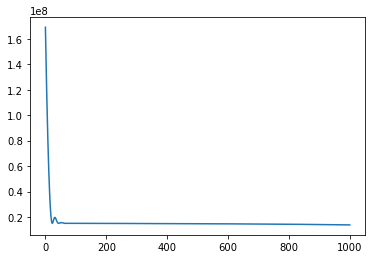

In [143]:
plt.plot(losses)

In [145]:
losses = [124692136.0, 116230104.0, 107737400.0, 99256888.0, 90832376.0, 82509312.0, 74335408.0, 66360976.0, 58639308.0, 51226860.0, 44183332.0, 37571324.0, 31455664.0, 25901902.0, 20973988.0, 16730850.0, 13221683.0, 10480049.0, 8516925.0, 7313479.5, 6814686.5, 6925759.5, 7513640.0, 8415474.0, 9454456.0, 10460650.0, 11292107.0, 11850729.0, 12089267.0, 12009048.0, 11650574.0, 11080507.0, 10377995.0, 9622705.0, 8889534.0, 8234542.0, 7688889.0, 7273143.5, 6991900.0, 6836637.5, 6789235.5, 6825681.5, 6919504.0, 7044691.5, 7177929.5, 7300096.0, 7397104.0, 7460127.5, 7485365.0, 7473443.5, 7428590.0, 7357659.0, 7269092.0, 7171936.0, 7074911.5, 6985641.5, 6910060.0, 6852025.5, 6813204.0, 6793137.5, 6789564.5, 6798874.5, 6816670.0, 6838375.5, 6859770.0, 6877433.5, 6889038.5, 6893452.0, 6890688.0, 6881715.0, 6868173.0, 6852041.5, 6835340.0, 6819845.5, 6806911.0, 6797362.5, 6791481.0, 6789064.5, 6789529.5, 6792054.5, 6795730.0, 6799671.5, 6803141.0, 6805608.0, 6806779.5, 6806596.5, 6805203.0, 6802884.5, 6800019.5, 6796995.5, 6794169.0, 6791816.0, 6790109.0, 6789107.5, 6788768.5, 6788967.5, 6789534.5, 6790277.0, 6791018.0, 6791613.0, 6791967.0, 6792039.0, 6791844.5, 6791432.0, 6790880.5, 6790274.5, 6789698.5, 6789214.5, 6788862.5, 6788656.0, 6788592.0, 6788636.0, 6788751.0, 6788898.5, 6789037.5, 6789139.0, 6789186.0, 6789171.0, 6789104.0, 6788994.5, 6788863.0, 6788729.5, 6788607.5, 6788513.0, 6788448.0, 6788414.5, 6788409.5, 6788420.0, 6788441.5, 6788463.5, 6788477.5, 6788480.0, 6788467.5, 6788444.5, 6788411.5, 6788373.0, 6788332.5, 6788297.0, 6788268.0, 6788243.0, 6788229.0, 6788217.0, 6788209.5, 6788205.5, 6788200.5, 6788192.0, 6788181.5, 6788167.0, 6788150.5, 6788132.0, 6788113.0, 6788092.5, 6788075.5, 6788059.0, 6788044.0, 6788030.5, 6788019.0, 6788006.5, 6787996.0, 6787983.0, 6787970.0, 6787957.0, 6787941.5, 6787927.5, 6787913.0, 6787896.5, 6787882.0, 6787868.0, 6787853.0, 6787839.5, 6787826.0, 6787812.0, 6787798.0, 6787784.5, 6787772.0, 6787756.5, 6787743.5, 6787727.5, 6787712.0, 6787698.0, 6787684.5, 6787668.5, 6787655.5, 6787641.0, 6787625.5, 6787611.5, 6787596.5, 6787581.5, 6787567.5, 6787552.0, 6787538.0, 6787524.0, 6787507.0, 6787492.5, 6787477.0, 6787462.0, 6787449.0, 6787433.0, 6787418.5, 6787403.5, 6787388.0, 6787372.0, 6787356.5, 6787342.0, 6787328.0, 6787311.5, 6787296.5, 6787281.0, 6787264.0, 6787251.5, 6787235.5, 6787220.0, 6787204.0, 6787188.0, 6787173.0, 6787156.5, 6787140.0, 6787125.5, 6787109.5, 6787095.0, 6787077.5, 6787062.5, 6787047.0, 6787029.0, 6787014.0, 6786998.0, 6786983.0, 6786966.5, 6786950.5, 6786934.5, 6786919.0, 6786902.0, 6786886.5, 6786870.0, 6786853.5, 6786836.5, 6786821.0, 6786805.0, 6786788.0, 6786772.0, 6786756.0, 6786740.0, 6786723.0, 6786706.0, 6786688.5, 6786672.0, 6786655.5, 6786640.0, 6786622.5, 6786606.0, 6786588.5, 6786571.5, 6786555.5, 6786538.5, 6786522.5, 6786505.0, 6786487.5, 6786471.5, 6786454.5, 6786436.5, 6786420.0, 6786402.5, 6786386.5, 6786368.0, 6786352.0, 6786334.5, 6786316.5, 6786300.0, 6786282.5, 6786265.5, 6786247.5, 6786228.5, 6786212.0, 6786195.0, 6786179.0, 6786160.5, 6786143.0, 6786126.0, 6786108.0, 6786091.0, 6786073.0, 6786054.0, 6786036.5, 6786020.0, 6786001.5, 6785984.5, 6785966.0, 6785948.5, 6785929.5, 6785912.5, 6785893.5, 6785875.0, 6785858.5, 6785840.0, 6785822.0, 6785804.0, 6785785.5, 6785768.0, 6785748.5, 6785732.0, 6785714.0, 6785695.0, 6785676.0, 6785659.0, 6785640.5, 6785621.5, 6785604.0, 6785584.5, 6785567.5, 6785550.0, 6785528.5, 6785510.0, 6785492.5, 6785474.5, 6785454.5, 6785437.0, 6785419.0, 6785398.5, 6785381.0, 6785361.5, 6785341.5, 6785325.0, 6785305.5, 6785287.0, 6785267.5, 6785249.5, 6785231.0, 6785212.0, 6785191.5, 6785174.5, 6785155.0, 6785136.0, 6785115.0, 6785098.5, 6785077.5, 6785059.5, 6785040.5, 6785020.5, 6785000.0, 6784980.5, 6784964.0, 6784943.5, 6784925.5, 6784904.0, 6784884.5, 6784867.5, 6784847.5, 6784826.0, 6784807.0, 6784788.0, 6784769.5, 6784749.5, 6784728.5, 6784710.5, 6784690.5, 6784670.5, 6784651.5, 6784630.5, 6784612.0, 6784592.5, 6784571.5, 6784552.5, 6784531.5, 6784512.5, 6784492.5, 6784472.5, 6784452.0, 6784434.0, 6784412.5, 6784392.5, 6784373.0, 6784354.0, 6784332.0, 6784313.5, 6784292.5, 6784273.0, 6784252.0, 6784232.0, 6784212.0, 6784192.5, 6784172.5, 6784151.0, 6784130.5, 6784110.5, 6784091.5, 6784071.0, 6784049.5, 6784029.5, 6784009.0, 6783989.5, 6783968.5, 6783948.0, 6783925.5, 6783907.0, 6783884.0, 6783865.0, 6783844.0, 6783824.5, 6783803.0, 6783782.5, 6783761.0, 6783741.5, 6783720.0, 6783699.5, 6783678.0, 6783658.5, 6783638.0, 6783616.5, 6783594.5, 6783574.0, 6783554.0, 6783532.5, 6783511.0, 6783491.5, 6783471.0, 6783450.0, 6783427.5, 6783406.0, 6783386.0, 6783364.5, 6783342.5, 6783322.5, 6783301.5, 6783279.5, 6783258.5, 6783238.5, 6783215.0, 6783194.5, 6783172.0, 6783152.5, 6783131.0, 6783110.0, 6783088.0, 6783067.5, 6783045.5, 6783025.0, 6783002.5, 6782980.5, 6782960.0, 6782937.0, 6782916.0, 6782893.5, 6782873.0, 6782852.0, 6782829.5, 6782807.0, 6782787.5, 6782764.0, 6782743.0, 6782721.0, 6782698.5, 6782678.0, 6782656.0, 6782633.5, 6782612.0, 6782588.5, 6782568.5, 6782544.5, 6782524.0, 6782502.5, 6782480.0, 6782458.0, 6782436.0, 6782413.5, 6782392.0, 6782370.5, 6782348.0, 6782325.5, 6782304.0, 6782282.0, 6782259.0, 6782237.0, 6782215.5, 6782192.0, 6782171.0, 6782148.0, 6782125.5, 6782103.0, 6782080.5, 6782057.5, 6782036.0, 6782014.0, 6781991.5, 6781968.5, 6781947.0, 6781924.0, 6781901.0, 6781877.5, 6781856.0, 6781834.0, 6781811.5, 6781787.5, 6781765.5, 6781743.5, 6781720.0, 6781697.0, 6781675.0, 6781652.0, 6781630.5, 6781606.5, 6781585.5, 6781561.5, 6781538.0, 6781515.5, 6781492.5, 6781469.0, 6781446.0, 6781424.0, 6781399.5, 6781379.0, 6781355.0, 6781332.0, 6781308.0, 6781286.5, 6781262.5, 6781239.5, 6781215.5, 6781194.0, 6781171.0, 6781147.5, 6781124.0, 6781100.0, 6781078.0, 6781055.5, 6781030.5, 6781008.5, 6780984.5, 6780961.5, 6780938.5, 6780914.0, 6780892.0, 6780868.0, 6780845.0, 6780820.0, 6780799.0, 6780773.5, 6780750.5, 6780726.5, 6780703.5, 6780680.0, 6780655.5, 6780632.5, 6780609.5, 6780586.5, 6780563.5, 6780538.0, 6780515.5, 6780491.5, 6780468.0, 6780444.0, 6780420.0, 6780395.5, 6780371.5, 6780349.0, 6780325.0, 6780302.0, 6780278.5, 6780253.5, 6780229.5, 6780206.5, 6780182.5, 6780158.5, 6780134.0, 6780110.5, 6780085.5, 6780061.0, 6780038.0, 6780013.0, 6779990.5, 6779966.0, 6779943.0, 6779918.0, 6779893.0, 6779869.0, 6779846.0, 6779821.5, 6779797.5, 6779774.0, 6779747.5, 6779724.5, 6779700.0, 6779675.5, 6779652.0, 6779628.0, 6779602.5, 6779579.5, 6779556.0, 6779530.0, 6779505.0, 6779482.0, 6779457.0, 6779431.5, 6779408.5, 6779384.5, 6779359.0, 6779334.0, 6779309.5, 6779286.0, 6779260.0, 6779236.0, 6779212.0, 6779188.0, 6779162.5, 6779138.5, 6779112.5, 6779088.5, 6779065.0, 6779038.0, 6779013.5, 6778990.0, 6778964.5, 6778940.0, 6778915.0, 6778889.5, 6778865.0, 6778841.0, 6778815.5, 6778791.5, 6778766.0, 6778741.5, 6778716.0, 6778691.5, 6778665.5, 6778640.0, 6778616.0, 6778591.5, 6778565.5, 6778541.0, 6778516.5, 6778492.0, 6778467.0, 6778441.0, 6778415.5, 6778391.5, 6778365.0, 6778339.5, 6778315.0, 6778289.5, 6778264.0, 6778239.5, 6778213.5, 6778189.5, 6778164.0, 6778138.0, 6778114.0, 6778087.0, 6778062.5, 6778037.5, 6778012.0, 6777985.5, 6777960.0, 6777935.0, 6777908.5, 6777884.0, 6777858.5, 6777831.5, 6777808.0, 6777781.0, 6777756.0, 6777730.5, 6777705.5, 6777679.5, 6777653.0, 6777628.5, 6777602.0, 6777577.0, 6777551.5, 6777525.5, 6777500.0, 6777473.0, 6777449.0, 6777423.0, 6777397.0, 6777372.0, 6777346.0, 6777318.0, 6777292.5, 6777268.0, 6777242.0, 6777216.0, 6777190.0, 6777164.0, 6777137.0, 6777112.5, 6777085.5, 6777060.5, 6777034.0, 6777010.0, 6776982.5, 6776956.0, 6776929.5, 6776905.0, 6776877.0, 6776852.5, 6776826.5, 6776799.5, 6776773.5, 6776748.0, 6776722.0, 6776696.0, 6776668.0, 6776641.5, 6776616.5, 6776589.5, 6776564.0, 6776536.0, 6776510.5, 6776484.0, 6776457.0, 6776432.5, 6776406.0, 6776379.0, 6776353.0, 6776326.5, 6776299.5, 6776273.0, 6776246.0, 6776221.0, 6776194.5, 6776167.5, 6776141.0, 6776114.5, 6776087.0, 6776060.5, 6776035.0, 6776008.0, 6775981.0, 6775955.0, 6775928.5, 6775901.5, 6775875.5, 6775847.0, 6775820.0, 6775796.0, 6775768.0, 6775742.0, 6775714.5, 6775687.5, 6775662.0, 6775633.5, 6775607.5, 6775581.0, 6775553.0, 6775526.5, 6775500.0, 6775472.0, 6775446.5, 6775418.0, 6775392.0, 6775364.5, 6775339.5, 6775312.0, 6775284.0, 6775257.0, 6775230.5, 6775204.0, 6775175.5, 6775148.5, 6775122.5, 6775094.5, 6775068.5, 6775040.5, 6775014.0, 6774986.5, 6774958.0, 6774931.5, 6774906.0, 6774877.5, 6774850.5, 6774824.0, 6774796.0, 6774769.5, 6774741.0, 6774712.5, 6774687.0, 6774660.5, 6774631.5, 6774604.5, 6774577.5, 6774550.5, 6774522.5, 6774495.0, 6774467.0, 6774440.0, 6774412.0, 6774385.5, 6774357.5, 6774330.0, 6774303.0, 6774275.0, 6774247.0, 6774220.0, 6774192.0, 6774165.0, 6774138.5, 6774110.0, 6774081.5, 6774054.5, 6774028.0, 6773997.5, 6773970.5, 6773943.0, 6773915.5, 6773887.5, 6773861.0, 6773832.0, 6773804.5, 6773776.0, 6773748.5, 6773722.0, 6773694.0, 6773665.5, 6773638.0, 6773610.0, 6773581.5, 6773554.5, 6773525.0, 6773498.0, 6773471.0, 6773443.0, 6773414.0, 6773386.0, 6773359.0, 6773331.0, 6773301.5, 6773275.0, 6773244.5, 6773220.0, 6773189.0, 6773161.0, 6773133.5, 6773106.5, 6773078.0, 6773049.0, 6773021.5, 6772993.0, 6772965.0, 6772937.5, 6772909.0, 6772879.5, 6772852.0, 6772823.5, 6772796.0, 6772766.5, 6772740.0, 6772709.5, 6772682.0, 6772654.0, 6772626.0, 6772596.5, 6772568.0, 6772540.0, 6772512.0, 6772483.0, 6772454.5, 6772426.0, 6772397.5, 6772369.5, 6772340.0, 6772312.0, 6772283.5, 6772255.0, 6772227.5, 6772199.0, 6772170.0, 6772141.0, 6772113.5, 6772082.5, 6772053.5, 6772026.0, 6771996.0, 6771967.5, 6771939.0, 6771911.5, 6771882.5, 6771854.5, 6771827.0, 6771796.5, 6771767.5, 6771738.5, 6771711.5, 6771680.5, 6771653.0, 6771623.5, 6771594.0, 6771564.5, 6771538.0, 6771508.0, 6771479.5, 6771450.0, 6771421.0, 6771391.5, 6771363.5, 6771334.5, 6771304.5, 6771277.5, 6771247.5, 6771217.5, 6771188.5, 6771160.0, 6771131.5, 6771102.0, 6771073.5, 6771044.0, 6771015.0, 6770986.0, 6770956.0, 6770927.0, 6770898.5, 6770868.5, 6770839.5, 6770810.5, 6770780.5, 6770752.0, 6770722.0, 6770693.5, 6770663.0, 6770635.0, 6770604.5, 6770576.0, 6770546.0, 6770516.5, 6770486.0, 6770458.0, 6770428.5, 6770399.5, 6770369.0, 6770340.0, 6770309.5, 6770282.5, 6770252.5, 6770223.0, 6770191.5, 6770162.5, 6770134.5, 6770104.0, 6770074.0, 6770044.0, 6770015.0, 6769986.5, 6769956.5, 6769927.0, 6769897.5, 6769866.5, 6769837.5, 6769808.5, 6769778.0, 6769748.5, 6769718.5, 6769688.0, 6769659.5, 6769629.0, 6769599.0, 6769570.5, 6769540.0, 6769511.0, 6769480.5, 6769451.5, 6769420.0, 6769390.0, 6769361.5, 6769331.5, 6769301.0, 6769272.0, 6769242.0, 6769210.0, 6769181.0, 6769151.0, 6769121.0, 6769093.0, 6769061.0, 6769032.0, 6769001.5, 6768971.0, 6768940.5, 6768910.5, 6768880.0, 6768850.5, 6768821.0, 6768790.0, 6768759.0, 6768731.0, 6768700.0, 6768669.0, 6768638.5, 6768611.0, 6768579.0, 6768549.0, 6768518.0, 6768488.0, 6768458.0, 6768427.5, 6768398.5, 6768367.0, 6768337.0, 6768305.0, 6768276.0, 6768245.0, 6768215.5, 6768186.0]
losses_val = [124822376.0, 115427536.0, 106034456.0, 96690096.0, 87443216.0, 78345008.0, 69449456.0, 60813832.0, 52498860.0, 44568892.0, 37091612.0, 30137308.0, 23777410.0, 18082082.0, 13116628.0, 8936607.0, 5581553.5, 3067690.5, 1380141.125, 466095.25, 230777.375, 538679.875, 1222122.25, 2097563.25, 2987284.5, 3741540.75, 4255383.0, 4476254.0, 4401897.0, 4070749.5, 3548349.25, 2913207.5, 2244207.5, 1614019.5, 1076783.625, 661368.375, 384804.5625, 247617.953125, 236920.421875, 330208.65625, 499309.6875, 714055.625, 945353.125, 1167533.375, 1359900.75, 1507578.125, 1601681.0, 1639024.25, 1621440.5, 1554828.375, 1448093.0, 1311992.25, 1158041.625, 997493.3125, 840460.375, 695258.9375, 567949.3125, 462159.8125, 379130.25, 317995.34375, 276243.4375, 250280.203125, 236047.296875, 229582.5, 227489.28125, 227247.078125, 227347.875, 227267.921875, 227296.65625, 228274.328125, 231291.875, 237397.453125, 247359.203125, 261502.796875, 279642.21875, 301092.9375, 324758.34375, 349268.84375, 373141.4375, 394940.1875, 413416.625, 427622.5, 436970.4375, 441256.0625, 440640.25, 435599.0, 426842.15625, 415230.09375, 401686.84375, 387114.59375, 372333.8125, 358035.28125, 344759.6875, 332888.4375, 322657.34375, 314178.90625, 307473.03125, 302491.15625, 299148.53125, 297335.5625, 296936.4375, 297825.15625, 299872.46875, 302937.375, 306861.6875, 311466.03125, 316552.5625, 321906.0, 327298.65625, 332506.40625, 337316.65625, 341541.90625, 345032.0, 347680.6875, 349429.34375, 350271.71875, 350247.09375, 349437.4375, 347954.1875, 345933.9375, 343523.875, 340875.1875, 338131.78125, 335424.46875, 332869.25, 330559.25, 328566.6875, 326944.1875, 325719.9375, 324906.71875, 324497.3125, 324471.25, 324793.25, 325419.59375, 326295.125, 327360.1875, 328551.9375, 329806.21875, 331061.125, 332258.5, 333348.46875, 334289.15625, 335048.65625, 335606.21875, 335954.71875, 336095.5625, 336041.3125, 335813.5625, 335439.375, 334951.5, 334384.59375, 333773.0, 333153.59375, 332553.6875, 332002.84375, 331523.8125, 331130.84375, 330836.59375, 330645.5, 330556.9375, 330566.71875, 330664.6875, 330836.75, 331069.3125, 331344.21875, 331644.375, 331953.15625, 332252.1875, 332529.28125, 332770.53125, 332968.40625, 333115.625, 333210.4375, 333254.1875, 333246.3125, 333194.09375, 333103.9375, 332985.8125, 332845.90625, 332696.4375, 332545.15625, 332401.65625, 332271.71875, 332161.4375, 332074.9375, 332014.6875, 331981.28125, 331974.625, 331992.9375, 332032.21875, 332089.71875, 332158.9375, 332236.25, 332315.96875, 332395.5625, 332468.71875, 332532.8125, 332584.9375, 332623.875, 332649.34375, 332659.75, 332657.71875, 332644.875, 332621.0625, 332589.84375, 332554.625, 332517.5625, 332479.3125, 332445.8125, 332416.53125, 332392.03125, 332375.3125, 332365.625, 332362.84375, 332368.125, 332378.9375, 332395.09375, 332415.15625, 332437.78125, 332461.6875, 332484.5625, 332506.0, 332525.71875, 332541.71875, 332553.6875, 332561.375, 332566.03125, 332566.6875, 332563.71875, 332559.0, 332552.40625, 332544.28125, 332535.6875, 332527.28125, 332520.4375, 332515.40625, 332512.03125, 332509.90625, 332510.4375, 332512.78125, 332517.15625, 332523.5, 332531.0625, 332538.4375, 332546.25, 332555.0625, 332562.8125, 332571.5625, 332577.5, 332582.96875, 332587.59375, 332590.84375, 332591.9375, 332594.25, 332594.71875, 332594.6875, 332593.625, 332592.96875, 332592.8125, 332593.53125, 332593.71875, 332594.96875, 332596.71875, 332598.1875, 332600.96875, 332605.625, 332609.0625, 332613.21875, 332617.5625, 332621.9375, 332625.71875, 332630.9375, 332634.46875, 332638.0625, 332641.1875, 332644.78125, 332646.40625, 332649.71875, 332651.40625, 332653.5625, 332655.0, 332657.5, 332659.40625, 332660.78125, 332663.0625, 332665.6875, 332667.59375, 332669.8125, 332673.9375, 332676.5625, 332679.875, 332682.6875, 332685.375, 332689.125, 332693.5625, 332695.96875, 332699.5625, 332702.3125, 332704.625, 332707.53125, 332710.46875, 332712.9375, 332715.53125, 332717.4375, 332719.78125, 332723.21875, 332725.9375, 332728.375, 332730.6875, 332733.75, 332736.375, 332739.9375, 332742.5, 332745.6875, 332748.1875, 332751.84375, 332754.59375, 332757.53125, 332760.5, 332762.25, 332765.65625, 332769.1875, 332771.3125, 332773.71875, 332776.78125, 332779.65625, 332782.9375, 332785.3125, 332788.1875, 332790.75, 332793.3125, 332797.0, 332799.4375, 332801.8125, 332805.09375, 332807.5625, 332811.125, 332814.1875, 332816.53125, 332819.96875, 332822.4375, 332825.4375, 332828.1875, 332830.59375, 332833.8125, 332836.5, 332839.53125, 332842.84375, 332845.78125, 332848.125, 332850.59375, 332854.125, 332856.9375, 332859.8125, 332862.4375, 332865.3125, 332868.90625, 332871.59375, 332874.5625, 332877.125, 332879.75, 332882.9375, 332885.96875, 332888.6875, 332891.71875, 332893.96875, 332897.6875, 332900.40625, 332903.625, 332906.5625, 332909.0625, 332913.0625, 332915.625, 332918.03125, 332920.6875, 332924.4375, 332926.90625, 332929.3125, 332932.4375, 332934.84375, 332938.03125, 332940.65625, 332943.90625, 332946.3125, 332949.75, 332952.5625, 332956.15625, 332958.40625, 332961.5625, 332963.625, 332968.0625, 332970.5625, 332973.875, 332976.34375, 332980.40625, 332982.625, 332984.875, 332987.25, 332990.0625, 332993.6875, 332995.9375, 332999.6875, 333002.59375, 333005.53125, 333008.75, 333011.3125, 333013.9375, 333017.21875, 333020.71875, 333024.0625, 333026.84375, 333029.03125, 333032.625, 333035.53125, 333037.8125, 333040.46875, 333043.625, 333046.75, 333049.28125, 333051.84375, 333055.125, 333059.09375, 333062.0625, 333064.75, 333067.21875, 333069.8125, 333074.1875, 333077.1875, 333079.65625, 333082.25, 333085.5625, 333088.15625, 333091.21875, 333094.34375, 333097.59375, 333100.8125, 333103.5, 333106.15625, 333109.28125, 333112.9375, 333115.59375, 333118.03125, 333121.6875, 333125.09375, 333127.3125, 333129.53125, 333133.03125, 333136.09375, 333139.125, 333142.03125, 333144.375, 333147.9375, 333150.21875, 333153.125, 333155.75, 333159.09375, 333162.3125, 333165.21875, 333167.96875, 333170.5625, 333174.6875, 333177.25, 333180.6875, 333183.78125, 333187.5, 333190.28125, 333192.78125, 333195.75, 333199.59375, 333201.5625, 333204.5625, 333207.65625, 333211.53125, 333213.8125, 333216.6875, 333218.96875, 333222.65625, 333225.21875, 333227.8125, 333230.78125, 333234.75, 333237.40625, 333240.3125, 333242.53125, 333246.5625, 333249.25, 333252.3125, 333254.5625, 333258.5625, 333260.875, 333264.21875, 333266.5, 333270.1875, 333273.1875, 333276.4375, 333279.03125, 333282.6875, 333285.8125, 333288.4375, 333291.125, 333294.4375, 333297.28125, 333300.40625, 333303.125, 333306.6875, 333309.1875, 333311.65625, 333314.75, 333317.8125, 333320.75, 333324.15625, 333326.6875, 333330.3125, 333333.125, 333336.4375, 333340.4375, 333342.375, 333345.90625, 333348.71875, 333352.25, 333354.875, 333357.6875, 333360.53125, 333364.0625, 333366.4375, 333369.78125, 333372.59375, 333375.71875, 333378.65625, 333381.28125, 333383.625, 333387.34375, 333390.15625, 333393.375, 333397.03125, 333400.40625, 333402.5, 333405.28125, 333409.125, 333411.5, 333414.78125, 333417.75, 333420.71875, 333423.78125, 333426.46875, 333430.0625, 333432.53125, 333436.28125, 333438.375, 333442.1875, 333445.28125, 333447.90625, 333450.9375, 333453.9375, 333456.5625, 333459.4375, 333462.8125, 333465.25, 333468.34375, 333472.0625, 333475.40625, 333478.53125, 333480.75, 333483.9375, 333487.6875, 333490.25, 333493.15625, 333497.0625, 333499.0625, 333501.875, 333504.4375, 333508.25, 333510.875, 333513.5625, 333517.1875, 333520.5625, 333522.6875, 333526.21875, 333529.1875, 333532.09375, 333535.3125, 333538.46875, 333541.625, 333544.46875, 333547.21875, 333550.71875, 333553.96875, 333556.3125, 333559.625, 333561.9375, 333565.15625, 333567.875, 333571.6875, 333574.125, 333577.3125, 333581.0625, 333583.625, 333586.59375, 333589.65625, 333592.59375, 333595.875, 333598.1875, 333602.5625, 333604.96875, 333607.25, 333609.65625, 333613.0625, 333616.65625, 333619.65625, 333623.03125, 333626.0625, 333628.75, 333632.3125, 333635.09375, 333637.8125, 333641.0625, 333644.625, 333646.96875, 333649.84375, 333653.46875, 333655.90625, 333659.28125, 333662.84375, 333665.125, 333668.03125, 333670.65625, 333674.3125, 333677.3125, 333679.90625, 333683.65625, 333686.59375, 333689.28125, 333692.84375, 333695.65625, 333698.40625, 333701.4375, 333704.8125, 333707.5, 333710.5625, 333714.1875, 333715.84375, 333719.21875, 333722.5625, 333725.8125, 333728.3125, 333732.125, 333734.25, 333737.46875, 333740.1875, 333744.15625, 333746.40625, 333749.6875, 333753.0625, 333755.4375, 333759.125, 333762.4375, 333765.125, 333767.65625, 333771.3125, 333773.96875, 333776.6875, 333780.03125, 333782.8125, 333785.8125, 333788.28125, 333792.0625, 333795.78125, 333797.90625, 333801.84375, 333804.84375, 333807.8125, 333811.375, 333813.3125, 333816.5, 333819.5, 333822.1875, 333824.84375, 333828.34375, 333831.03125, 333833.375, 333837.5625, 333839.84375, 333843.3125, 333846.28125, 333849.5625, 333853.21875, 333855.5625, 333859.0625, 333862.15625, 333864.53125, 333867.84375, 333870.4375, 333872.8125, 333876.8125, 333879.65625, 333882.09375, 333885.5625, 333888.78125, 333891.21875, 333894.5625, 333898.0, 333900.5625, 333903.90625, 333907.0, 333910.125, 333913.28125, 333915.875, 333918.8125, 333922.9375, 333925.40625, 333928.09375, 333931.40625, 333933.90625, 333936.9375, 333940.09375, 333943.28125, 333946.40625, 333949.375, 333952.34375, 333955.09375, 333958.9375, 333961.71875, 333963.8125, 333967.25, 333970.4375, 333973.25, 333976.78125, 333979.75, 333982.3125, 333985.75, 333988.8125, 333991.28125, 333994.84375, 333997.96875, 333999.5, 334003.75, 334006.375, 334009.0625, 334012.75, 334015.75, 334018.9375, 334021.9375, 334024.65625, 334027.84375, 334030.53125, 334033.1875, 334036.8125, 334039.65625, 334042.46875, 334045.75, 334048.4375, 334051.4375, 334054.75, 334057.40625, 334060.3125, 334064.03125, 334066.96875, 334070.15625, 334073.59375, 334076.3125, 334079.125, 334081.96875, 334084.25, 334088.09375, 334090.75, 334094.34375, 334097.53125, 334100.09375, 334103.3125, 334106.25, 334109.0, 334111.96875, 334115.21875, 334118.15625, 334120.75, 334124.71875, 334127.5625, 334130.1875, 334132.90625, 334136.3125, 334139.90625, 334142.3125, 334145.15625, 334148.78125, 334151.25, 334154.4375, 334157.25, 334160.46875, 334164.15625, 334166.34375, 334169.4375, 334172.25, 334175.5625, 334177.9375, 334181.1875, 334183.6875, 334187.125, 334190.8125, 334193.28125, 334196.8125, 334200.5625, 334202.96875, 334206.1875, 334208.6875, 334211.28125, 334214.6875, 334217.5, 334220.125, 334223.8125, 334226.8125, 334230.09375, 334233.4375, 334235.78125, 334239.3125, 334241.90625, 334244.4375, 334248.34375, 334251.09375, 334254.53125, 334256.625, 334260.15625, 334263.25, 334265.71875, 334268.78125, 334272.3125, 334275.09375, 334278.84375, 334281.03125, 334283.9375, 334287.5, 334290.6875, 334292.84375, 334296.875, 334299.03125, 334302.46875, 334305.625, 334307.6875, 334311.59375, 334314.125, 334317.59375, 334319.90625, 334323.6875, 334326.8125, 334329.875, 334332.28125, 334335.9375, 334338.4375, 334341.90625, 334344.5625, 334347.8125, 334350.625, 334353.8125, 334356.3125, 334359.3125, 334362.90625, 334365.6875, 334369.0625, 334371.8125, 334375.1875, 334378.125, 334381.625, 334384.0625, 334386.90625, 334390.125, 334392.96875, 334396.125, 334399.0, 334401.5625, 334404.8125, 334408.0625, 334410.71875, 334414.1875, 334416.71875, 334419.96875, 334423.34375, 334426.4375, 334429.0, 334432.15625, 334435.375, 334438.3125, 334442.15625, 334444.78125, 334447.0625, 334450.59375, 334452.875, 334456.40625, 334459.3125, 334461.96875, 334464.90625, 334468.28125, 334471.6875, 334474.3125, 334477.34375, 334480.84375, 334483.1875, 334487.3125, 334490.75, 334492.3125, 334496.125, 334498.71875, 334502.59375, 334505.15625, 334507.5625, 334511.59375, 334513.65625, 334516.8125, 334519.1875, 334523.6875, 334526.46875, 334529.21875, 334532.0, 334535.65625, 334538.59375, 334541.75, 334544.84375, 334547.75, 334550.53125, 334553.9375, 334556.6875, 334560.25, 334562.15625, 334565.375, 334568.3125, 334571.25, 334574.78125, 334577.625, 334580.3125, 334584.25, 334587.21875, 334590.15625, 334593.09375, 334596.25, 334599.0625, 334601.8125, 334605.15625, 334607.90625, 334611.0625, 334613.5625, 334616.4375, 334620.53125, 334623.4375, 334626.4375, 334629.71875, 334633.1875, 334635.625, 334637.9375, 334641.9375, 334644.59375, 334647.78125, 334650.875, 334654.15625, 334656.28125, 334659.5625, 334663.0625, 334665.5625, 334669.3125, 334671.59375, 334675.65625, 334678.125, 334682.03125, 334684.15625, 334687.3125, 334690.5625, 334693.25, 334696.1875, 334699.6875, 334702.875, 334705.3125, 334707.8125, 334711.3125, 334714.46875, 334718.625, 334721.09375, 334724.53125, 334727.25, 334729.375, 334733.25, 334735.90625, 334739.5625, 334742.34375, 334745.5, 334748.4375, 334751.53125, 334754.40625, 334757.0625, 334760.0625, 334763.375, 334767.03125, 334769.28125, 334773.4375, 334775.65625, 334779.625, 334782.0, 334784.5625, 334788.125, 334790.9375, 334794.84375, 334797.5, 334800.96875, 334803.8125]


In [149]:
losses = [158324592.0, 147952000.0, 137852240.0, 128035280.0, 118501072.0, 109336512.0, 100571824.0, 92035592.0, 83659712.0, 75471672.0, 67502728.0, 59793496.0, 52375648.0, 45298212.0, 38624068.0, 32420616.0, 26757818.0, 21705010.0, 17326622.0, 13677001.0, 10794194.0, 8693191.0, 7359234.0, 6742212.0, 6753741.0, 7268716.5, 8132740.5, 9175724.0, 10230022.0, 11149485.0, 11825189.0, 12194294.0, 12240934.0, 11990006.0, 11496506.0, 10833072.0, 10078037.0, 9305579.0, 8578546.0, 7944196.5, 7432582.0, 7057039.0, 6816305.0, 6697590.0, 6680108.5, 6738595.5, 6846466.5, 6978428.0, 7112403.5, 7230779.5, 7321011.0, 7375717.5, 7392333.5, 7372437.5, 7320917.0, 7244977.0, 7153163.5, 7054379.0, 6957040.5, 6868378.5, 6793890.0, 6737049.5, 6699207.5, 6679725.0, 6676279.5, 6685316.5, 6702593.0, 6723717.5, 6744667.5, 6762169.5, 6773970.5, 6778933.0, 6776994.5, 6768986.0, 6756380.0, 6741016.0, 6724781.5, 6709388.0, 6696180.0, 6686035.5, 6679331.5, 6675986.0, 6675548.0, 6677310.0, 6680445.5, 6684123.5, 6687613.5, 6690349.0, 6691979.5, 6692361.0, 6691549.0, 6689753.5, 6687278.0, 6684476.5, 6681687.5, 6679202.0, 6677224.5, 6675867.5, 6675142.5, 6674984.5, 6675265.5, 6675823.5, 6676491.5, 6677120.0, 6677595.0, 6677842.5, 6677839.5, 6677610.5, 6677200.0, 6676674.5, 6676116.0, 6675586.0, 6675140.5, 6674812.0, 6674612.0, 6674532.0, 6674549.0, 6674627.5, 6674736.5, 6674839.0, 6674915.5, 6674943.0, 6674919.5, 6674849.5, 6674744.0, 6674613.0, 6674477.5, 6674349.0, 6674239.5, 6674156.5, 6674099.5, 6674066.5, 6674051.0, 6674045.5, 6674046.0, 6674042.0, 6674027.5, 6674004.0, 6673967.5, 6673922.5, 6673874.0, 6673819.5, 6673768.0, 6673717.5, 6673674.0, 6673636.0, 6673603.5, 6673573.5, 6673548.0, 6673521.5, 6673495.5, 6673467.5, 6673437.0, 6673402.5, 6673368.5, 6673330.5, 6673294.5, 6673259.0, 6673220.5, 6673188.0, 6673152.0, 6673118.0, 6673086.5, 6673055.5, 6673023.0, 6672991.5, 6672959.0, 6672924.0, 6672891.5, 6672857.0, 6672821.0, 6672786.5, 6672752.0, 6672717.5, 6672683.0, 6672649.5, 6672614.5, 6672580.5, 6672546.0, 6672512.5, 6672477.0, 6672444.0, 6672408.5, 6672373.0, 6672340.0, 6672303.0, 6672268.0, 6672234.5, 6672197.5, 6672162.5, 6672127.5, 6672091.0, 6672056.0, 6672021.0, 6671985.0, 6671949.0, 6671914.5, 6671877.0, 6671840.5, 6671805.5, 6671768.5, 6671733.5, 6671697.5, 6671659.5, 6671623.0, 6671586.5, 6671549.0, 6671513.5, 6671475.0, 6671439.5, 6671400.5, 6671364.0, 6671328.0, 6671292.0, 6671254.5, 6671217.0, 6671178.0, 6671140.0, 6671103.0, 6671066.0, 6671028.5, 6670990.0, 6670953.0, 6670916.0, 6670876.5, 6670840.0, 6670800.5, 6670762.0, 6670724.0, 6670685.0, 6670648.5, 6670608.5, 6670572.0, 6670530.5, 6670493.0, 6670454.5, 6670415.5, 6670378.5, 6670337.5, 6670299.0, 6670258.5, 6670220.5, 6670180.5, 6670140.0, 6670101.5, 6670062.5, 6670023.0, 6669983.0, 6669943.5, 6669904.0, 6669865.0, 6669825.0, 6669785.0, 6669744.5, 6669705.0, 6669665.5, 6669622.5, 6669583.0, 6669543.0, 6669503.5, 6669461.5, 6669421.5, 6669380.0, 6669340.0, 6669300.0, 6669258.5, 6669219.0, 6669176.5, 6669136.5, 6669096.0, 6669052.5, 6669013.0, 6668972.5, 6668930.5, 6668891.5, 6668847.5, 6668806.5, 6668763.5, 6668721.5, 6668681.5, 6668639.5, 6668596.0, 6668556.0, 6668513.0, 6668471.0, 6668429.0, 6668387.5, 6668344.5, 6668303.5, 6668260.5, 6668218.5, 6668176.0, 6668132.5, 6668090.0, 6668045.5, 6668005.5, 6667963.0, 6667918.0, 6667877.0, 6667834.0, 6667790.0, 6667748.5, 6667705.5, 6667661.5, 6667618.0, 6667572.5, 6667531.5, 6667487.5, 6667444.5, 6667402.5, 6667357.5, 6667314.0, 6667270.5, 6667228.0, 6667183.5, 6667138.5, 6667097.0, 6667052.0, 6667006.0, 6666963.5, 6666918.5, 6666876.0, 6666832.0, 6666787.5, 6666743.5, 6666698.0, 6666653.0, 6666609.5, 6666564.0, 6666518.0, 6666475.0, 6666430.0, 6666385.5, 6666340.5, 6666294.0, 6666249.0, 6666204.0, 6666160.0, 6666116.0, 6666068.5, 6666024.0, 6665979.0, 6665932.5, 6665887.0, 6665842.0, 6665798.5, 6665751.5, 6665707.0, 6665660.0, 6665615.5, 6665568.5, 6665523.0, 6665477.0, 6665431.0, 6665385.0, 6665339.5, 6665292.5, 6665245.5, 6665200.5, 6665154.5, 6665107.0, 6665061.5, 6665014.5, 6664969.0, 6664922.0, 6664875.5, 6664828.5, 6664784.0, 6664735.0, 6664689.5, 6664641.0, 6664596.0, 6664548.0, 6664500.0, 6664454.5, 6664406.0, 6664360.0, 6664312.0, 6664265.0, 6664219.0, 6664171.0, 6664124.0, 6664076.0, 6664028.0, 6663981.5, 6663934.0, 6663886.0, 6663838.0, 6663790.5, 6663744.0, 6663694.5, 6663647.0, 6663600.0, 6663550.5, 6663503.5, 6663454.5, 6663407.0, 6663358.0, 6663310.5, 6663264.0, 6663214.0, 6663166.5, 6663116.5, 6663069.0, 6663019.5, 6662972.0, 6662923.5, 6662875.0, 6662825.5, 6662777.5, 6662727.5, 6662679.5, 6662630.0, 6662581.5, 6662532.0, 6662482.0, 6662433.5, 6662384.5, 6662335.5, 6662287.0, 6662236.0, 6662188.5, 6662140.0, 6662090.5, 6662039.0, 6661990.0, 6661941.0, 6661891.5, 6661841.0, 6661793.0, 6661741.5, 6661693.0, 6661643.0, 6661593.0, 6661543.0, 6661492.0, 6661444.0, 6661392.5, 6661343.0, 6661291.0, 6661242.5, 6661191.0, 6661141.0, 6661092.0, 6661041.0, 6660991.5, 6660940.5, 6660890.5, 6660839.5, 6660788.5, 6660738.0, 6660687.5, 6660636.0, 6660586.5, 6660535.0, 6660485.0, 6660435.0, 6660380.5, 6660331.0, 6660279.0, 6660229.5, 6660179.0, 6660127.0, 6660075.5, 6660023.5, 6659974.0, 6659921.5, 6659869.0, 6659819.0, 6659768.0, 6659716.5, 6659664.0, 6659614.0, 6659561.5, 6659510.5, 6659459.0, 6659406.5, 6659355.0, 6659303.5, 6659249.0, 6659200.5, 6659146.0, 6659095.0, 6659043.0, 6658990.5, 6658940.0, 6658887.0, 6658834.5, 6658782.0, 6658729.5, 6658676.0, 6658624.0, 6658572.0, 6658519.5, 6658467.5, 6658414.5, 6658362.5, 6658310.0, 6658256.5, 6658204.0, 6658152.0, 6658099.0, 6658044.5, 6657993.0, 6657940.5, 6657886.5, 6657835.0, 6657780.0, 6657729.0, 6657675.0, 6657621.5, 6657569.0, 6657516.0, 6657462.0, 6657408.5, 6657356.0, 6657302.5, 6657249.5, 6657194.5, 6657141.5, 6657088.5, 6657034.5, 6656980.5, 6656927.0, 6656872.0, 6656818.5, 6656764.5, 6656712.5, 6656658.5, 6656604.0, 6656549.0, 6656496.5, 6656441.5, 6656387.5, 6656334.5, 6656280.5, 6656225.0, 6656171.0, 6656115.5, 6656063.0, 6656007.5, 6655956.0, 6655898.5, 6655846.0, 6655789.5, 6655735.0, 6655680.5, 6655627.0, 6655572.0, 6655517.5, 6655462.5, 6655408.0, 6655353.0, 6655299.0, 6655243.5, 6655188.0, 6655133.5, 6655077.5, 6655024.0, 6654968.0, 6654914.0, 6654859.5, 6654804.0, 6654746.5, 6654691.5, 6654636.0, 6654582.0, 6654524.5, 6654470.5, 6654417.5, 6654360.5, 6654303.5, 6654248.5, 6654194.5, 6654137.0, 6654082.5, 6654025.5, 6653971.0, 6653914.0, 6653859.0, 6653802.5, 6653748.5, 6653691.0, 6653636.0, 6653580.0, 6653523.0, 6653466.5, 6653411.0, 6653354.5, 6653299.0, 6653242.5, 6653185.0, 6653131.5, 6653073.0, 6653018.5, 6652962.0, 6652904.5, 6652847.5, 6652791.5, 6652734.0, 6652678.5, 6652621.5, 6652564.0, 6652508.5, 6652451.5, 6652394.5, 6652339.0, 6652280.5, 6652223.5, 6652167.0, 6652110.0, 6652053.0, 6651997.5, 6651939.5, 6651881.5, 6651826.0, 6651768.5, 6651710.5, 6651653.5, 6651596.0, 6651539.5, 6651482.5, 6651425.5, 6651366.0, 6651308.0, 6651253.0, 6651194.5, 6651135.0, 6651079.0, 6651022.5, 6650964.0, 6650907.0, 6650848.5, 6650792.0, 6650733.5, 6650676.5, 6650617.0, 6650560.0, 6650502.0, 6650444.5, 6650386.5, 6650328.0, 6650268.0, 6650212.0, 6650154.0, 6650094.0, 6650036.5, 6649979.0, 6649921.5, 6649862.5, 6649803.5, 6649745.0, 6649688.0, 6649628.0, 6649569.5, 6649512.0, 6649452.0, 6649393.5, 6649335.0, 6649276.5, 6649220.0, 6649161.0, 6649101.0, 6649041.0, 6648982.5, 6648924.0, 6648866.5, 6648808.5, 6648747.5, 6648688.5, 6648629.5, 6648571.0, 6648511.5, 6648452.0, 6648393.0, 6648334.5, 6648276.0, 6648215.5, 6648156.5, 6648095.0, 6648039.0, 6647980.0, 6647920.5, 6647859.5, 6647801.0, 6647741.0, 6647682.0, 6647620.5, 6647562.5, 6647503.0, 6647443.0, 6647382.5, 6647323.0, 6647265.5, 6647204.0, 6647144.0, 6647083.5, 6647024.0, 6646964.0, 6646907.0, 6646844.0, 6646785.0, 6646724.0, 6646665.0, 6646604.0, 6646544.0, 6646483.5, 6646423.0, 6646363.5, 6646302.0, 6646243.0, 6646183.5, 6646122.0, 6646060.0, 6646001.5, 6645939.0, 6645880.5, 6645819.0, 6645759.5, 6645699.0, 6645637.0, 6645576.0, 6645516.0, 6645456.0, 6645394.0, 6645333.5, 6645272.0, 6645213.0, 6645151.0, 6645091.0, 6645028.0, 6644968.0, 6644908.0, 6644845.5, 6644783.5, 6644724.0, 6644663.0, 6644602.5, 6644541.0, 6644479.5, 6644416.5, 6644356.5, 6644295.5, 6644235.5, 6644173.0, 6644110.0, 6644050.0, 6643988.0, 6643925.5, 6643865.0, 6643804.5, 6643743.0, 6643678.5, 6643619.0, 6643557.0, 6643496.0, 6643433.5, 6643372.0, 6643310.5, 6643247.0, 6643186.5, 6643124.0, 6643062.5, 6643001.0, 6642939.0, 6642876.0, 6642813.0, 6642750.0, 6642689.0, 6642626.5, 6642564.0, 6642503.5, 6642441.5, 6642378.0, 6642317.0, 6642254.5, 6642191.0, 6642129.5, 6642068.0, 6642005.0, 6641941.5, 6641880.5, 6641817.0, 6641754.0, 6641692.5, 6641630.0, 6641564.5, 6641502.0, 6641440.5, 6641378.0, 6641315.0, 6641252.0, 6641190.5, 6641127.0, 6641062.5, 6641001.0, 6640938.5, 6640874.5, 6640812.0, 6640748.5, 6640684.0, 6640621.0, 6640558.5, 6640496.0, 6640432.5, 6640369.0, 6640304.5, 6640244.0, 6640178.5, 6640116.0, 6640052.5, 6639988.0, 6639926.0, 6639861.0, 6639798.0, 6639734.5, 6639670.5, 6639607.0, 6639544.5, 6639479.5, 6639417.5, 6639353.5, 6639288.0, 6639224.0, 6639161.0, 6639098.0, 6639034.0, 6638971.0, 6638906.5, 6638842.0, 6638777.5, 6638714.5, 6638649.0, 6638586.0, 6638521.5, 6638456.5, 6638391.5, 6638328.0, 6638265.0, 6638199.5, 6638137.5, 6638070.0, 6638006.5, 6637942.5, 6637879.0, 6637813.5, 6637748.5, 6637685.5, 6637620.5, 6637557.0, 6637490.5, 6637425.0, 6637362.0, 6637297.0, 6637232.5, 6637168.5, 6637103.5, 6637038.5, 6636973.5, 6636907.5, 6636843.5, 6636778.5, 6636713.5, 6636648.0, 6636584.0, 6636519.0, 6636454.0, 6636388.5, 6636324.0, 6636259.5, 6636192.0, 6636127.0, 6636064.0, 6635997.5, 6635932.5, 6635866.5, 6635801.5, 6635737.0, 6635670.5, 6635605.5, 6635539.5, 6635474.0, 6635408.5, 6635344.0, 6635278.0, 6635212.0, 6635146.5, 6635082.5, 6635016.0, 6634949.0, 6634884.0, 6634816.0, 6634752.0, 6634686.0, 6634620.0, 6634554.5, 6634487.5, 6634422.0, 6634355.5, 6634289.5, 6634225.0, 6634157.0, 6634092.5, 6634027.5, 6633960.5, 6633893.5, 6633827.5, 6633761.0, 6633695.5, 6633628.5, 6633562.5, 6633496.0, 6633428.0, 6633363.5, 6633296.5, 6633230.0, 6633164.0, 6633097.0, 6633030.5, 6632964.0, 6632897.0, 6632830.0, 6632764.5, 6632698.0, 6632631.0, 6632564.0, 6632496.5, 6632430.5, 6632364.0, 6632295.5, 6632229.5, 6632164.0, 6632096.0, 6632028.5, 6631962.5, 6631895.5, 6631827.0, 6631762.0, 6631694.0, 6631626.5, 6631559.0, 6631492.0, 6631425.5, 6631358.0, 6631291.5, 6631222.0, 6631157.0, 6631088.5, 6631020.5, 6630953.0, 6630884.0, 6630817.5, 6630750.5, 6630684.0, 6630615.0, 6630548.5, 6630481.0, 6630414.0, 6630346.0, 6630277.5, 6630210.0, 6630141.5, 6630075.0, 6630005.0, 6629938.5, 6629872.5, 6629803.0, 6629734.5, 6629666.5, 6629600.5, 6629532.0, 6629461.0, 6629395.0, 6629327.0, 6629258.5, 6629192.0, 6629122.0, 6629054.5, 6628988.0, 6628918.0, 6628849.0, 6628781.5, 6628713.0, 6628645.0, 6628575.5, 6628507.0, 6628438.5, 6628370.5, 6628301.5, 6628233.5, 6628164.0, 6628096.0, 6628028.5, 6627959.5, 6627890.5, 6627823.0, 6627752.5, 6627683.5, 6627616.0, 6627546.0, 6627477.5, 6627409.0, 6627340.0, 6627271.5, 6627202.5, 6627132.5, 6627064.5, 6626995.0, 6626926.0, 6626855.0, 6626788.0, 6626719.0, 6626648.5, 6626581.0, 6626509.5, 6626440.5, 6626372.0, 6626304.0, 6626235.0, 6626164.0, 6626095.0, 6626025.5, 6625956.0, 6625886.5, 6625816.5, 6625748.0, 6625677.0, 6625608.5, 6625539.5, 6625468.0, 6625399.0, 6625330.0, 6625260.0, 6625190.0, 6625119.0, 6625052.0, 6624980.0, 6624912.0, 6624841.0, 6624770.5, 6624700.0, 6624632.0, 6624560.5, 6624491.5, 6624421.0, 6624350.5, 6624282.0, 6624211.0, 6624140.0, 6624070.0, 6624000.5, 6623930.5, 6623859.5, 6623788.5, 6623720.0, 6623649.0, 6623579.0, 6623508.0, 6623438.0, 6623366.0, 6623296.0, 6623227.5, 6623156.0, 6623085.5, 6623013.5, 6622943.0, 6622872.5, 6622804.0, 6622730.5, 6622661.0, 6622589.5, 6622519.5, 6622448.5, 6622377.5, 6622306.0, 6622235.5, 6622164.0, 6622092.5, 6622023.0, 6621950.5, 6621880.5, 6621809.5, 6621737.0, 6621667.0, 6621596.0, 6621524.5, 6621455.0, 6621384.5, 6621313.5, 6621242.0, 6621168.5, 6621098.0, 6621027.0, 6620955.0, 6620883.0, 6620813.5, 6620741.0, 6620669.5, 6620597.5, 6620525.5, 6620455.0, 6620382.0, 6620310.5, 6620238.0, 6620168.5, 6620096.0, 6620024.0, 6619952.5, 6619880.0, 6619809.0, 6619737.0, 6619664.0, 6619593.0, 6619520.0, 6619449.0, 6619377.0, 6619306.0, 6619233.5, 6619163.0, 6619089.0, 6619017.0, 6618943.0, 6618872.5, 6618800.5, 6618728.0, 6618656.5, 6618583.5, 6618509.5, 6618437.5, 6618365.5, 6618292.5, 6618221.0, 6618148.5, 6618078.0, 6618003.5, 6617932.5, 6617860.0, 6617786.0, 6617713.0, 6617641.5, 6617569.0, 6617496.0, 6617425.5, 6617350.0, 6617277.5, 6617204.0, 6617132.5, 6617059.0, 6616986.0, 6616914.5, 6616840.5, 6616766.0, 6616694.0, 6616620.5, 6616548.0, 6616476.0, 6616401.5, 6616328.5, 6616255.5, 6616182.5, 6616108.0, 6616036.0, 6615963.0, 6615890.0, 6615815.5, 6615744.0, 6615669.0, 6615596.0, 6615524.0, 6615448.0, 6615375.5, 6615301.5, 6615229.5, 6615155.5, 6615082.0, 6615008.0, 6614933.5, 6614860.5, 6614787.5, 6614713.0, 6614638.0, 6614564.0, 6614492.5, 6614417.5, 6614343.0, 6614269.5, 6614196.0, 6614122.5, 6614047.0, 6613973.5, 6613901.0, 6613826.0, 6613751.5, 6613678.0, 6613604.5, 6613528.0, 6613454.5, 6613382.0, 6613306.5, 6613233.0, 6613157.5, 6613083.5, 6613008.5, 6612934.5, 6612860.0, 6612785.5, 6612710.5, 6612638.0, 6612561.5, 6612488.5, 6612414.0, 6612338.5, 6612264.0, 6612189.0, 6612116.0, 6612041.5, 6611967.0, 6611891.5, 6611816.5, 6611742.5, 6611666.0, 6611593.0, 6611516.0, 6611441.0, 6611367.5, 6611292.0, 6611217.0, 6611142.5, 6611065.5, 6610991.5, 6610917.0, 6610840.5, 6610766.0, 6610691.5, 6610616.0, 6610540.5, 6610466.5, 6610391.0, 6610315.5, 6610239.0, 6610164.5, 6610088.0, 6610014.0, 6609939.0, 6609861.5, 6609787.0, 6609712.0, 6609634.0, 6609561.0, 6609484.0, 6609407.5, 6609332.0, 6609257.0, 6609180.5, 6609106.0, 6609031.0, 6608955.0, 6608878.0, 6608804.0, 6608726.0, 6608652.0, 6608574.5, 6608498.5, 6608422.5, 6608346.5, 6608271.0, 6608195.0, 6608118.0, 6608042.0, 6607967.0, 6607890.0, 6607814.0, 6607737.5, 6607662.0, 6607586.0, 6607508.0, 6607431.5, 6607356.0, 6607278.0, 6607202.5, 6607128.0, 6607051.5, 6606974.5, 6606896.5, 6606820.5, 6606744.5, 6606667.0, 6606588.0, 6606513.5, 6606438.0, 6606360.5, 6606284.0, 6606206.5, 6606130.5, 6606053.5, 6605976.0, 6605899.0, 6605822.5, 6605744.0, 6605669.0, 6605591.0, 6605513.5, 6605436.5, 6605358.5, 6605283.0, 6605205.5, 6605128.5, 6605052.0, 6604973.0, 6604897.0, 6604820.0, 6604742.5, 6604665.0, 6604588.5, 6604510.5, 6604432.5, 6604354.0, 6604278.0, 6604200.5, 6604124.0, 6604045.0, 6603967.0, 6603890.0, 6603812.0, 6603734.5, 6603658.0, 6603580.0, 6603500.5, 6603425.0, 6603345.5, 6603268.5, 6603189.5, 6603111.5, 6603034.0, 6602956.0, 6602879.5, 6602801.0, 6602722.5, 6602644.0, 6602569.0, 6602488.5, 6602411.0, 6602333.0, 6602255.0, 6602175.5, 6602099.0, 6602019.5, 6601942.0, 6601864.5, 6601784.0, 6601708.0, 6601628.0, 6601549.0, 6601471.5, 6601391.5, 6601313.5, 6601235.5, 6601158.0, 6601078.0, 6601000.0, 6600922.0, 6600843.0, 6600763.5, 6600686.0, 6600605.5, 6600527.5, 6600449.5, 6600371.0, 6600292.5, 6600214.0, 6600134.0, 6600054.5, 6599976.5, 6599896.5, 6599819.0, 6599739.0, 6599660.0, 6599580.0, 6599501.0, 6599421.0, 6599343.5, 6599263.5, 6599185.0, 6599103.5, 6599027.0, 6598947.0, 6598866.5, 6598787.5, 6598709.0, 6598629.0, 6598551.0, 6598470.5, 6598391.0, 6598312.5, 6598232.5, 6598152.5, 6598073.5, 6597992.5, 6597913.5, 6597833.5, 6597754.5, 6597675.0, 6597596.0, 6597515.0, 6597434.5, 6597355.0, 6597274.5, 6597195.5, 6597117.0, 6597035.5, 6596955.0, 6596877.5, 6596796.0, 6596713.5, 6596636.0, 6596556.0, 6596474.0, 6596394.5, 6596315.5, 6596234.5, 6596153.0, 6596074.0, 6595993.5, 6595913.5, 6595832.0, 6595753.5, 6595672.0, 6595591.5, 6595512.0, 6595430.5, 6595349.5, 6595269.5, 6595189.0, 6595107.0, 6595028.0, 6594947.5, 6594866.0, 6594785.5, 6594706.0, 6594625.5, 6594543.5, 6594463.5, 6594383.0, 6594301.0, 6594221.0, 6594141.0, 6594060.0, 6593977.5, 6593896.0, 6593815.0, 6593733.5, 6593654.0, 6593572.5, 6593492.0, 6593412.0, 6593328.0, 6593247.0, 6593167.0, 6593085.0, 6593004.0, 6592923.0, 6592842.0, 6592758.5, 6592679.0, 6592597.0, 6592515.5, 6592435.5, 6592353.0, 6592271.5, 6592189.0, 6592110.5, 6592026.0, 6591945.0, 6591862.5, 6591780.5, 6591700.0, 6591618.0, 6591535.5, 6591454.0, 6591372.0, 6591290.5, 6591209.0, 6591127.0, 6591045.5, 6590964.0, 6590881.5, 6590801.0, 6590716.0, 6590636.0, 6590554.5, 6590471.0, 6590387.5, 6590307.5, 6590224.0, 6590141.5, 6590060.0, 6589977.5, 6589896.0, 6589812.5, 6589732.0, 6589648.5, 6589565.0, 6589484.0, 6589401.5, 6589319.0, 6589237.0, 6589153.0, 6589070.5, 6588988.0, 6588908.0, 6588823.5, 6588741.0, 6588659.0, 6588576.0, 6588495.0, 6588411.0, 6588328.0, 6588245.0, 6588162.0, 6588080.0, 6587996.0, 6587913.5, 6587829.5, 6587748.0, 6587664.0, 6587581.0, 6587498.0, 6587416.5, 6587332.0, 6587250.5, 6587165.5, 6587081.5, 6586999.0, 6586916.5, 6586831.5, 6586750.5, 6586666.0, 6586583.0, 6586499.5, 6586415.0, 6586332.5, 6586247.5, 6586165.0, 6586084.0, 6585997.0, 6585914.0, 6585832.0, 6585747.5, 6585662.5, 6585581.0, 6585497.5, 6585412.5, 6585330.5, 6585247.0, 6585163.5, 6585078.5, 6584994.5, 6584912.0, 6584827.0, 6584743.5, 6584658.5, 6584575.5, 6584492.0, 6584408.5, 6584322.0, 6584239.5, 6584155.0, 6584071.0, 6583986.5, 6583904.0, 6583819.0, 6583735.0, 6583652.0, 6583566.5, 6583482.5, 6583398.0, 6583314.0, 6583228.5, 6583144.5, 6583060.5, 6582977.0, 6582891.0, 6582807.5, 6582723.0, 6582639.0, 6582553.5, 6582471.0, 6582385.0, 6582300.0, 6582216.0, 6582130.5, 6582045.5, 6581960.5, 6581876.0, 6581792.5, 6581708.0, 6581622.5, 6581536.0, 6581452.0, 6581367.0, 6581282.5, 6581198.0, 6581111.5, 6581028.0, 6580943.0, 6580857.0, 6580773.5, 6580686.0, 6580601.5, 6580516.0, 6580432.5, 6580347.0, 6580261.0, 6580176.0, 6580091.0, 6580005.0, 6579920.5, 6579834.5, 6579749.0, 6579665.0, 6579579.5, 6579493.0, 6579408.5, 6579322.5, 6579237.5, 6579152.5, 6579066.5, 6578981.0, 6578895.0, 6578809.5, 6578723.5, 6578636.0, 6578551.5, 6578467.5, 6578380.5, 6578297.5, 6578208.0, 6578124.0, 6578038.0, 6577953.5, 6577866.5, 6577780.5, 6577695.0, 6577609.0, 6577523.5, 6577437.5, 6577350.0, 6577264.5, 6577177.5, 6577092.0, 6577005.0, 6576919.5, 6576835.0, 6576747.5, 6576660.0, 6576574.5, 6576489.5, 6576402.5, 6576315.5, 6576229.5, 6576142.5, 6576058.0, 6575971.5, 6575884.5, 6575797.0, 6575711.0, 6575625.0, 6575538.5, 6575452.0, 6575365.5, 6575280.0, 6575192.5, 6575106.0, 6575018.5, 6574932.5, 6574844.5, 6574760.0, 6574672.0, 6574585.5, 6574499.0, 6574410.5, 6574324.5, 6574238.5, 6574151.5, 6574064.5, 6573977.5, 6573892.0, 6573804.5, 6573717.0, 6573632.0, 6573544.0, 6573456.0, 6573367.0, 6573281.0, 6573194.0, 6573108.0, 6573021.0, 6572934.5, 6572845.5, 6572757.0, 6572671.0, 6572584.5, 6572497.0, 6572409.0, 6572322.0, 6572235.0, 6572147.5, 6572061.0, 6571972.5, 6571885.5, 6571797.5, 6571710.5, 6571622.5, 6571534.0, 6571448.5, 6571359.5, 6571272.0, 6571185.5, 6571098.5, 6571009.0, 6570921.0, 6570835.0, 6570747.0, 6570657.5, 6570572.0, 6570484.0, 6570396.0, 6570306.5, 6570220.0, 6570131.0, 6570043.5, 6569955.5, 6569868.0, 6569780.0, 6569691.5, 6569604.0, 6569516.5, 6569428.0, 6569341.0, 6569253.0, 6569164.0, 6569075.5, 6568987.0, 6568899.5, 6568810.5, 6568723.0, 6568636.0, 6568546.5, 6568458.5, 6568371.5, 6568281.5, 6568194.5, 6568105.0, 6568016.5, 6567927.5, 6567841.0, 6567751.5, 6567663.0, 6567575.5, 6567485.5, 6567399.0, 6567308.0, 6567220.0, 6567132.0, 6567044.5, 6566955.5, 6566866.5, 6566777.5, 6566689.5, 6566602.0, 6566511.5, 6566422.5, 6566335.0, 6566246.0, 6566156.0, 6566068.5, 6565980.0, 6565891.5, 6565803.0, 6565713.5, 6565624.5, 6565535.5, 6565446.0, 6565358.0, 6565268.0, 6565180.0, 6565090.5, 6565000.5, 6564912.0, 6564823.5, 6564736.0, 6564645.0, 6564558.0, 6564468.0, 6564379.0, 6564290.0, 6564200.5, 6564110.5, 6564022.0, 6563933.0, 6563843.5, 6563752.5, 6563664.0, 6563576.5, 6563486.5, 6563397.0, 6563308.0, 6563219.5, 6563127.5, 6563041.5, 6562950.5, 6562860.0, 6562771.5, 6562682.0, 6562591.0, 6562503.5, 6562413.0, 6562324.0, 6562236.0, 6562144.0, 6562055.5, 6561966.5, 6561876.0, 6561786.0, 6561696.5, 6561607.0, 6561518.5, 6561429.0, 6561337.0, 6561247.0, 6561159.0, 6561068.0, 6560980.0, 6560891.0, 6560800.0, 6560710.5, 6560619.5, 6560529.5, 6560441.5, 6560350.0, 6560262.0, 6560170.5, 6560081.0, 6559993.5, 6559902.5, 6559812.0, 6559721.0, 6559632.5, 6559541.0, 6559451.5, 6559361.5, 6559272.5, 6559181.0, 6559090.5, 6559002.0, 6558911.5, 6558822.0, 6558731.5, 6558642.5, 6558551.0, 6558460.5, 6558371.5, 6558280.5, 6558189.0, 6558100.0, 6558009.5, 6557920.5, 6557829.0, 6557739.5, 6557649.0, 6557559.5, 6557469.0, 6557377.0, 6557289.0, 6557197.0, 6557106.0, 6557018.0, 6556927.0, 6556836.0, 6556746.5, 6556656.0, 6556564.0, 6556475.5, 6556384.0, 6556294.0, 6556203.5, 6556113.0, 6556022.5, 6555931.0, 6555842.0, 6555750.5, 6555659.5, 6555569.5, 6555477.5, 6555388.5, 6555296.5, 6555208.0, 6555116.0, 6555026.5, 6554934.5, 6554844.5, 6554754.0, 6554664.0, 6554574.0, 6554483.0, 6554392.0, 6554300.0, 6554210.0, 6554119.0, 6554028.5, 6553938.0, 6553846.5, 6553756.0, 6553666.0, 6553575.0, 6553484.0, 6553393.5, 6553302.5, 6553211.5, 6553121.5, 6553029.5, 6552939.5, 6552849.0, 6552757.5, 6552666.0, 6552575.5, 6552484.5, 6552395.0, 6552303.5, 6552212.0, 6552121.5, 6552029.5, 6551938.5, 6551848.5, 6551757.5, 6551668.0, 6551577.0, 6551484.0, 6551395.5, 6551302.5, 6551213.0, 6551119.0, 6551029.5, 6550939.5, 6550848.0, 6550756.0, 6550666.0, 6550574.0, 6550482.5, 6550392.5, 6550300.5, 6550211.0, 6550120.0, 6550028.0, 6549937.0, 6549845.5, 6549755.0, 6549664.0, 6549572.0, 6549482.5, 6549391.0, 6549299.5, 6549208.5, 6549116.5, 6549026.0, 6548935.0, 6548844.0, 6548752.5, 6548661.0, 6548571.5, 6548478.5, 6548388.0, 6548297.0, 6548206.5, 6548116.0, 6548024.0, 6547932.5, 6547841.0, 6547749.5, 6547659.5, 6547567.0, 6547476.0, 6547385.0, 6547294.5, 6547202.0, 6547112.0, 6547020.0, 6546928.0, 6546838.5, 6546746.5, 6546654.5, 6546564.0, 6546470.5, 6546381.0, 6546291.5, 6546197.5, 6546107.5, 6546018.0, 6545925.0, 6545834.0, 6545742.0, 6545651.5, 6545561.5, 6545469.0, 6545378.0, 6545287.5, 6545194.5, 6545102.5, 6545012.5, 6544921.0, 6544829.5, 6544738.0, 6544647.5, 6544555.0, 6544464.0, 6544373.0, 6544282.0, 6544191.5, 6544100.5, 6544009.0, 6543917.5, 6543826.0, 6543736.0, 6543643.0, 6543552.0, 6543461.0, 6543368.0, 6543280.0, 6543188.0, 6543097.0, 6543004.5, 6542915.0, 6542820.5, 6542730.0, 6542638.5, 6542548.0, 6542458.0, 6542365.0, 6542275.0, 6542183.5, 6542091.0, 6542000.5, 6541910.0, 6541818.0, 6541728.0, 6541636.0, 6541546.5, 6541452.5, 6541362.0, 6541272.0, 6541180.0, 6541089.5, 6540997.0, 6540906.0, 6540816.0, 6540724.5, 6540633.5, 6540542.0, 6540450.5, 6540358.0, 6540267.5, 6540178.5, 6540084.5, 6539995.5, 6539904.0, 6539813.0, 6539723.5, 6539631.5, 6539539.5, 6539448.0, 6539357.0, 6539266.0, 6539174.5, 6539083.5, 6538992.5, 6538901.5, 6538810.0, 6538719.0, 6538628.0, 6538536.0, 6538445.5, 6538355.0, 6538264.0, 6538173.5, 6538081.5, 6537991.0, 6537901.0, 6537810.0, 6537717.5, 6537627.5, 6537534.5, 6537444.0, 6537354.5, 6537263.5, 6537173.0, 6537081.0, 6536990.0, 6536900.0, 6536809.0, 6536718.0, 6536627.0, 6536534.5, 6536445.5, 6536354.5, 6536262.5, 6536172.0, 6536081.0, 6535991.0, 6535900.0, 6535809.5, 6535720.0, 6535628.5, 6535537.0, 6535445.5, 6535354.5, 6535265.5, 6535173.5, 6535083.5, 6534992.5, 6534902.5, 6534812.0, 6534721.0, 6534629.5, 6534540.5, 6534447.0, 6534357.5, 6534266.0, 6534175.0, 6534085.5, 6533995.5, 6533906.0, 6533814.0, 6533724.5, 6533633.0, 6533543.5, 6533452.0, 6533363.0, 6533271.5, 6533182.0, 6533091.5, 6533000.0, 6532910.0, 6532820.0, 6532729.5, 6532638.5, 6532548.0, 6532458.5, 6532367.0, 6532278.5, 6532187.5, 6532097.5, 6532008.0, 6531916.5, 6531826.0, 6531736.5, 6531645.5, 6531555.5, 6531466.0, 6531376.5, 6531286.0, 6531195.0, 6531106.0, 6531016.0, 6530926.0, 6530834.5, 6530746.0, 6530657.0, 6530566.5, 6530475.0, 6530385.0, 6530295.5, 6530206.5, 6530116.0, 6530026.0, 6529936.5, 6529844.5, 6529756.0, 6529667.0, 6529576.5, 6529486.5, 6529398.5, 6529308.0, 6529218.0, 6529129.0, 6529039.5, 6528948.5, 6528859.5, 6528771.0, 6528679.5, 6528590.5, 6528501.0, 6528411.0, 6528323.0, 6528233.0, 6528143.5, 6528053.0, 6527965.0, 6527874.5, 6527786.0, 6527696.0, 6527606.0, 6527516.5, 6527428.0, 6527340.0, 6527249.0, 6527161.0, 6527071.5, 6526984.5, 6526892.0, 6526806.0, 6526716.0, 6526626.0, 6526536.5, 6526448.0, 6526359.5, 6526269.0, 6526181.0, 6526093.0, 6526003.0, 6525914.0, 6525823.5, 6525736.5, 6525648.5, 6525558.0, 6525471.0, 6525382.5, 6525293.5, 6525203.5, 6525115.0, 6525028.0, 6524938.0, 6524849.5, 6524760.0, 6524671.5, 6524583.5, 6524495.0, 6524408.0, 6524319.5, 6524230.5, 6524142.0, 6524054.5, 6523965.5, 6523876.5, 6523790.0, 6523701.0, 6523614.5, 6523524.5, 6523436.0, 6523348.0, 6523260.0, 6523171.0, 6523084.0, 6522995.0, 6522908.0, 6522820.0, 6522732.0, 6522644.5, 6522558.0, 6522469.0, 6522381.5, 6522292.0, 6522207.0, 6522116.0, 6522028.5, 6521941.0, 6521854.5, 6521766.0, 6521680.0, 6521593.0, 6521504.0, 6521418.0, 6521331.0, 6521242.5, 6521154.5, 6521067.0, 6520980.0, 6520894.0, 6520805.5, 6520719.5, 6520633.0, 6520543.5, 6520456.0, 6520370.0, 6520284.0, 6520196.0, 6520111.0, 6520023.0, 6519934.5, 6519848.0, 6519761.5, 6519674.0, 6519587.5, 6519502.0, 6519413.0, 6519328.0, 6519242.0, 6519155.5, 6519068.5, 6518981.5, 6518894.5, 6518807.5, 6518722.5, 6518635.5, 6518549.5, 6518462.0, 6518378.0, 6518291.5, 6518205.0, 6518118.5, 6518033.0, 6517946.0, 6517859.5, 6517773.5, 6517687.0, 6517599.5, 6517516.0, 6517430.0, 6517345.0, 6517257.5, 6517173.0, 6517088.0, 6517001.5, 6516915.5, 6516829.5, 6516743.5, 6516658.0, 6516573.0, 6516487.5, 6516402.5, 6516316.0, 6516230.5, 6516145.0, 6516061.5, 6515976.0, 6515889.0, 6515805.5, 6515720.5, 6515634.5, 6515550.0, 6515464.5, 6515380.0, 6515295.5, 6515209.5, 6515127.0, 6515040.0, 6514956.0, 6514871.0, 6514785.5, 6514700.5, 6514615.5, 6514532.0, 6514449.0, 6514364.0, 6514278.5, 6514194.0, 6514110.5, 6514026.5, 6513940.0, 6513856.5, 6513773.5, 6513688.5, 6513605.5, 6513519.5, 6513438.0, 6513352.0, 6513268.5, 6513184.0, 6513101.0, 6513015.0, 6512933.5, 6512850.5, 6512766.0, 6512683.0, 6512599.5, 6512516.0, 6512433.5, 6512347.5, 6512264.5, 6512182.0, 6512099.5, 6512014.0, 6511932.5, 6511847.5, 6511766.5, 6511683.5, 6511599.5, 6511516.0, 6511434.5, 6511351.5, 6511268.0, 6511185.0, 6511103.0, 6511019.5, 6510937.0, 6510854.5, 6510771.5, 6510690.0, 6510605.0, 6510523.0, 6510441.5, 6510359.0, 6510275.5, 6510195.0, 6510112.5, 6510030.0, 6509948.0, 6509865.0, 6509784.0, 6509702.5, 6509620.5, 6509538.5, 6509457.0, 6509373.5, 6509293.0, 6509211.0, 6509130.0, 6509046.5, 6508964.5, 6508884.0, 6508804.5, 6508723.0, 6508641.0, 6508558.5, 6508479.0, 6508397.5, 6508316.0, 6508235.0, 6508153.5, 6508072.5, 6507990.5, 6507911.0, 6507830.0, 6507750.0, 6507668.0, 6507588.0, 6507508.0, 6507425.0, 6507346.0, 6507265.0, 6507185.0, 6507104.0, 6507024.0, 6506944.5, 6506862.0, 6506784.5, 6506703.0, 6506624.0, 6506543.0, 6506464.0, 6506382.0, 6506305.0, 6506222.5, 6506144.5, 6506064.5, 6505984.5, 6505906.5, 6505826.0, 6505745.5, 6505665.5, 6505587.0, 6505508.0, 6505429.0, 6505349.0, 6505270.0, 6505191.5, 6505110.0, 6505032.0, 6504955.0, 6504875.0, 6504794.5, 6504717.0, 6504637.5, 6504559.5, 6504480.5, 6504404.0, 6504323.0, 6504245.5, 6504168.5, 6504088.0, 6504009.0, 6503931.5, 6503855.0, 6503774.0, 6503698.5, 6503619.0, 6503541.5, 6503464.0, 6503387.0, 6503307.5, 6503231.0, 6503151.5, 6503073.0, 6502996.5, 6502919.5, 6502842.0, 6502765.5, 6502687.5, 6502610.0, 6502533.0, 6502454.5, 6502378.0, 6502301.0, 6502223.5, 6502148.0, 6502069.5, 6501993.5, 6501916.0, 6501840.0, 6501764.0, 6501686.5, 6501609.5, 6501534.5, 6501457.5, 6501380.0, 6501304.5, 6501227.5, 6501150.5, 6501076.0, 6500998.5, 6500923.0, 6500848.0, 6500770.5, 6500695.5, 6500620.0, 6500544.0, 6500468.0, 6500392.5, 6500316.5, 6500241.5, 6500165.0, 6500089.5, 6500013.5, 6499939.0, 6499865.0, 6499789.5, 6499714.5, 6499640.0, 6499564.0, 6499490.0, 6499414.5, 6499339.5, 6499265.0, 6499188.5, 6499114.0, 6499040.5, 6498966.5, 6498892.0, 6498817.0, 6498742.5, 6498669.5, 6498595.5, 6498519.5, 6498445.0, 6498373.0, 6498299.0, 6498223.0, 6498149.0, 6498076.0, 6498002.5, 6497929.0, 6497856.0, 6497781.5, 6497708.0, 6497635.0, 6497560.5, 6497488.5, 6497414.5, 6497340.5, 6497268.0, 6497194.5, 6497122.5, 6497047.0, 6496977.0, 6496904.5, 6496830.5, 6496759.5, 6496685.0, 6496612.5, 6496541.5, 6496469.5, 6496395.5, 6496321.5, 6496250.5, 6496178.5, 6496108.0, 6496034.5, 6495962.0, 6495891.0, 6495818.5, 6495746.5, 6495674.5, 6495604.0, 6495532.0, 6495460.0, 6495389.5, 6495316.0, 6495245.0, 6495173.5, 6495101.0, 6495032.0, 6494959.0, 6494890.0, 6494818.5, 6494746.5, 6494676.5, 6494606.5, 6494535.0, 6494464.5, 6494393.5, 6494323.0, 6494252.0, 6494180.5, 6494112.5, 6494041.5, 6493970.0, 6493899.5, 6493830.0, 6493761.0, 6493691.5, 6493620.0, 6493550.0, 6493481.5, 6493411.0, 6493340.5, 6493271.0, 6493201.5, 6493132.5, 6493062.0, 6492994.0, 6492924.0, 6492854.5, 6492784.5, 6492716.0, 6492648.0, 6492578.5, 6492508.0, 6492439.5, 6492372.0, 6492301.5, 6492235.5, 6492165.5, 6492096.0, 6492027.5, 6491960.0, 6491890.5, 6491823.5, 6491756.0, 6491688.0, 6491618.0, 6491551.0, 6491483.5, 6491415.5, 6491346.0, 6491279.0, 6491210.0, 6491144.0, 6491075.5, 6491008.5, 6490941.0, 6490872.5, 6490805.5, 6490738.5, 6490672.0, 6490606.5, 6490537.5, 6490471.0, 6490403.5, 6490335.5, 6490268.0, 6490202.5, 6490136.5, 6490068.0, 6490003.5, 6489935.5, 6489870.5, 6489803.5, 6489736.5, 6489670.5, 6489604.0, 6489539.0, 6489473.5, 6489405.0, 6489340.5, 6489277.0, 6489208.5, 6489142.5, 6489077.5, 6489012.0, 6488947.0, 6488881.0, 6488814.5, 6488749.0, 6488684.0, 6488618.5, 6488554.0, 6488489.0, 6488422.5, 6488357.5, 6488294.0, 6488228.0, 6488164.0, 6488098.5, 6488034.5, 6487969.5, 6487906.5, 6487839.5, 6487774.0, 6487711.5, 6487646.0, 6487584.0, 6487519.5, 6487454.5, 6487391.0, 6487326.5, 6487263.5, 6487198.0, 6487135.0, 6487071.5, 6487006.0, 6486945.0, 6486880.0, 6486816.0, 6486754.0, 6486690.5, 6486627.0, 6486564.0, 6486501.0, 6486437.5, 6486373.5, 6486312.0, 6486248.0, 6486184.5, 6486124.0, 6486059.5, 6485997.5, 6485936.0, 6485871.0, 6485810.0, 6485748.0, 6485684.0, 6485623.0, 6485561.0, 6485498.0, 6485436.5, 6485372.5, 6485312.0, 6485250.5, 6485188.5, 6485127.5, 6485065.0, 6485002.5, 6484942.0, 6484880.0, 6484817.0, 6484756.0, 6484697.5, 6484635.0, 6484573.0, 6484512.0, 6484451.5, 6484389.0, 6484328.5, 6484266.5, 6484206.0, 6484145.0, 6484085.5, 6484023.5, 6483965.0, 6483903.0, 6483844.0, 6483782.5, 6483721.0, 6483661.5, 6483601.5, 6483541.5, 6483482.0, 6483420.0, 6483361.0, 6483302.0, 6483240.5, 6483181.5, 6483121.5, 6483062.5, 6483002.0, 6482943.0, 6482883.0, 6482824.0, 6482763.5, 6482704.5, 6482645.0, 6482587.0, 6482528.0, 6482467.0, 6482408.0, 6482350.5, 6482292.0, 6482233.5, 6482174.0, 6482114.0, 6482056.0, 6481996.0, 6481939.5, 6481879.5, 6481822.0, 6481764.0, 6481704.5, 6481647.5, 6481588.0, 6481531.0, 6481473.0, 6481414.0, 6481356.0, 6481298.0, 6481240.0, 6481182.5, 6481125.0, 6481067.5, 6481009.5, 6480952.5, 6480894.0, 6480837.5, 6480780.5, 6480723.0, 6480664.5, 6480606.5, 6480549.5, 6480492.0, 6480436.0, 6480379.5, 6480323.0, 6480267.0, 6480207.5, 6480152.5, 6480096.0, 6480040.0, 6479983.0, 6479925.5, 6479869.0, 6479813.0, 6479757.5, 6479700.0, 6479643.5, 6479587.0, 6479532.0, 6479475.0, 6479420.5, 6479363.0, 6479308.5, 6479251.0, 6479195.0, 6479140.0, 6479084.0, 6479028.0, 6478974.0, 6478918.5, 6478862.5, 6478806.5, 6478751.0, 6478696.0, 6478641.0, 6478586.0, 6478530.5, 6478476.0, 6478419.5, 6478365.5, 6478310.0, 6478255.0, 6478200.0, 6478146.0, 6478091.0, 6478035.5, 6477981.0, 6477925.5, 6477871.0, 6477818.5, 6477765.0, 6477709.5, 6477656.0, 6477601.0, 6477547.5, 6477493.5, 6477437.0, 6477386.0, 6477330.0, 6477276.5, 6477224.0, 6477170.5, 6477116.5, 6477061.0, 6477007.5, 6476956.0, 6476900.5, 6476847.0, 6476794.0, 6476740.5, 6476687.5, 6476633.0, 6476581.0, 6476527.0, 6476474.5, 6476421.0, 6476369.5, 6476316.0, 6476262.0, 6476210.0, 6476156.5, 6476104.0, 6476052.5, 6475997.5, 6475946.0, 6475891.5, 6475841.0, 6475788.0, 6475734.5, 6475683.5, 6475630.5, 6475579.5, 6475526.5, 6475474.5, 6475421.5, 6475370.5, 6475316.0, 6475266.5, 6475213.0, 6475163.0, 6475110.5, 6475059.5, 6475007.0, 6474955.5, 6474902.0, 6474852.0, 6474801.5, 6474750.0, 6474697.0, 6474645.5, 6474594.0, 6474544.5, 6474491.5, 6474442.5, 6474387.0, 6474339.0, 6474287.5, 6474237.0, 6474186.0, 6474133.5, 6474083.0, 6474033.5, 6473982.5, 6473931.5, 6473880.5, 6473830.5, 6473779.5, 6473729.0, 6473677.5, 6473628.0, 6473579.0, 6473526.5, 6473476.5, 6473426.0, 6473377.0, 6473326.0, 6473276.5, 6473227.0, 6473176.0, 6473125.5, 6473075.5, 6473024.5, 6472975.5, 6472925.0, 6472876.0, 6472826.5, 6472777.0, 6472727.0, 6472676.5, 6472627.5, 6472578.0, 6472530.5, 6472478.5, 6472431.5, 6472380.0, 6472331.5, 6472282.0, 6472233.5, 6472183.0, 6472135.0, 6472085.0, 6472035.5, 6471987.5, 6471939.5, 6471889.0, 6471838.5, 6471791.0, 6471743.5, 6471693.5, 6471645.5, 6471596.0, 6471547.0, 6471499.0, 6471450.0, 6471402.5, 6471354.5, 6471305.0, 6471258.5, 6471208.0, 6471158.5, 6471111.0, 6471064.5, 6471018.0, 6470966.0, 6470917.5, 6470869.5, 6470822.0, 6470775.0, 6470726.5, 6470679.0, 6470632.5, 6470583.0, 6470534.0, 6470487.0, 6470440.5, 6470391.0, 6470343.5, 6470296.0, 6470248.5, 6470201.5, 6470153.5, 6470106.5, 6470058.0, 6470012.0, 6469963.5, 6469916.0, 6469869.5, 6469822.0, 6469773.5, 6469727.0, 6469682.0, 6469634.0, 6469585.5, 6469538.0, 6469492.5, 6469444.5, 6469399.0, 6469353.5, 6469304.5, 6469257.5, 6469211.5, 6469163.5, 6469118.0, 6469069.0, 6469023.0, 6468976.0, 6468931.5, 6468884.5, 6468836.0, 6468790.0, 6468745.5, 6468699.0, 6468652.0, 6468605.0, 6468559.5, 6468513.5, 6468467.0, 6468420.0, 6468374.5, 6468328.0, 6468281.0, 6468235.5, 6468189.0, 6468143.5, 6468097.5, 6468051.0, 6468004.5, 6467959.5, 6467914.5, 6467867.5, 6467822.0, 6467776.5, 6467730.0, 6467684.5, 6467639.5, 6467594.5, 6467548.0, 6467503.0, 6467456.0, 6467410.0, 6467366.0, 6467319.5, 6467274.0, 6467229.0, 6467184.5, 6467137.5, 6467092.5, 6467048.5, 6467003.0, 6466957.5, 6466911.5, 6466866.0, 6466822.0, 6466775.5, 6466732.5, 6466685.5, 6466640.5, 6466594.5, 6466549.5, 6466506.5, 6466460.5, 6466416.0, 6466372.0, 6466325.5, 6466281.5, 6466237.5, 6466193.0, 6466148.0, 6466102.5, 6466058.5, 6466014.0, 6465970.0, 6465924.0, 6465879.5, 6465835.5, 6465789.5, 6465746.0, 6465702.0, 6465658.0, 6465613.5, 6465569.0, 6465523.0, 6465478.5, 6465435.5, 6465390.5, 6465345.0, 6465304.0, 6465258.5, 6465215.0, 6465170.0, 6465127.0, 6465082.0, 6465038.5, 6464993.5, 6464949.5, 6464906.0, 6464861.5, 6464817.0, 6464772.0, 6464730.5, 6464684.0, 6464641.0, 6464597.5, 6464554.0, 6464509.0, 6464468.0, 6464423.0, 6464379.5, 6464335.0, 6464293.0, 6464248.0, 6464205.0, 6464162.0, 6464116.0, 6464074.0, 6464030.0, 6463987.0, 6463942.0, 6463899.0, 6463857.5, 6463812.0, 6463769.0, 6463726.5, 6463682.5, 6463637.5, 6463595.5, 6463551.5, 6463509.0, 6463467.0, 6463422.0, 6463380.0, 6463337.5, 6463293.5, 6463252.0, 6463205.0, 6463163.0, 6463120.5, 6463076.5, 6463034.0, 6462991.0, 6462947.5, 6462906.0, 6462863.5, 6462819.0, 6462776.5, 6462733.0, 6462691.0, 6462647.0, 6462604.0, 6462561.5, 6462518.0, 6462476.5, 6462432.5, 6462390.0, 6462347.0, 6462304.0, 6462261.5, 6462220.0, 6462175.5, 6462133.5, 6462090.5, 6462048.5, 6462004.5, 6461964.0, 6461919.5, 6461877.5, 6461836.0, 6461793.5, 6461748.0, 6461706.5, 6461665.5, 6461621.5, 6461580.0, 6461538.0, 6461493.0, 6461452.5, 6461410.5, 6461366.0, 6461325.5, 6461282.0, 6461240.5, 6461198.0, 6461155.5, 6461114.0, 6461071.5, 6461027.5, 6460986.0, 6460944.5, 6460902.0, 6460861.0, 6460818.0, 6460776.5, 6460733.0, 6460691.0, 6460649.0, 6460606.0, 6460564.0, 6460523.5, 6460480.5, 6460439.5, 6460396.0, 6460354.5, 6460314.0, 6460271.0, 6460230.0, 6460187.5, 6460144.5, 6460101.5, 6460061.0, 6460018.5, 6459976.0, 6459932.5, 6459892.5, 6459851.0, 6459809.5, 6459766.0, 6459725.5, 6459683.5, 6459641.5, 6459599.5, 6459557.0, 6459516.0, 6459474.0, 6459432.5, 6459390.0, 6459348.0, 6459307.0, 6459266.5, 6459223.5, 6459182.0, 6459139.5, 6459098.0, 6459055.0, 6459015.0, 6458974.5, 6458931.5, 6458889.5, 6458848.5, 6458806.0, 6458765.0, 6458722.0, 6458681.0, 6458640.5, 6458600.5, 6458556.0, 6458516.5, 6458474.0, 6458432.0, 6458390.5, 6458349.0, 6458307.5, 6458266.0, 6458225.0, 6458184.5, 6458142.0, 6458101.0, 6458060.0, 6458017.5, 6457974.5, 6457934.5, 6457893.5, 6457851.5, 6457811.0, 6457767.5, 6457728.0, 6457685.5, 6457646.5, 6457604.0, 6457562.5, 6457521.0, 6457477.5, 6457438.0, 6457396.0, 6457357.0, 6457312.5, 6457270.5, 6457231.5, 6457190.5, 6457148.0, 6457107.5, 6457066.5, 6457025.0, 6456984.0, 6456943.0, 6456900.5, 6456859.5, 6456820.0, 6456776.5, 6456736.5, 6456696.0, 6456653.0, 6456612.0, 6456569.5, 6456531.5, 6456489.0, 6456447.0, 6456406.0, 6456365.0, 6456324.0, 6456283.0, 6456242.5, 6456201.5, 6456159.5, 6456118.5, 6456077.0, 6456036.5, 6455996.0, 6455953.5, 6455913.5, 6455871.5, 6455830.5, 6455789.0, 6455746.5, 6455706.5, 6455665.0, 6455625.0, 6455583.5, 6455541.5, 6455502.0, 6455460.5, 6455419.5, 6455380.0, 6455338.0, 6455296.0, 6455255.5, 6455214.5, 6455173.5, 6455131.5, 6455090.5, 6455050.5, 6455008.0, 6454967.5, 6454926.0, 6454886.0, 6454844.5, 6454804.5, 6454763.5, 6454722.0, 6454681.0, 6454640.5, 6454598.5, 6454558.0, 6454516.0, 6454477.5, 6454427.5, 6453980.0, 6453399.5, 6452251.5, 6445511.0, 6464124.5, 6464637.5, 6464830.0, 6464920.0, 6465065.5, 6465037.5, 6464913.0, 6464821.0, 6464612.0, 6464344.0, 6464120.5, 6463838.0, 6460336.0, 6449953.5, 6453650.5, 6453621.5, 6453901.0, 6453829.0, 6453522.0, 6453760.0, 6453595.0, 6453434.0, 6453598.5, 6453404.5, 6453344.0, 6453429.0, 6453249.0, 6453244.0, 6453262.5, 6453114.0, 6453132.0, 6453104.5, 6452991.5, 6453012.0, 6452954.0, 6452877.5, 6452884.5, 6452814.0, 6452762.5, 6452753.5, 6452681.0, 6452646.0, 6452620.0, 6452555.5, 6452527.5, 6452489.5, 6452433.5, 6452405.0, 6452360.5, 6452311.5, 6452283.0, 6452234.0, 6452192.0, 6452158.5, 6452109.0, 6452071.5, 6452034.0, 6451987.5, 6451950.0, 6451909.5, 6451865.5, 6451828.0, 6451787.5, 6451744.0, 6451704.5, 6451662.0, 6451622.5, 6451582.5, 6451540.5, 6451500.5, 6451459.0, 6451417.5, 6451378.5, 6451336.0, 6451296.0, 6451255.0, 6451214.5, 6451174.0, 6451132.5, 6451091.5, 6451051.0, 6451010.5, 6450969.0, 6450928.5, 6450888.5, 6450848.5, 6450807.0, 6450764.0, 6450725.0, 6450683.5, 6450643.0, 6450601.5, 6450560.0, 6450521.5, 6450480.0, 6450439.5, 6450399.0, 6450356.5, 6450316.5, 6450276.0, 6450235.0, 6450195.0, 6450154.0, 6450112.0, 6450072.0, 6450031.5, 6449990.5, 6449949.0, 6449908.5, 6449867.5, 6449826.5, 6449786.0, 6449745.0, 6449704.5, 6449663.5, 6449622.5, 6449581.0, 6449541.0, 6449500.0, 6449458.5, 6449418.5, 6449376.0, 6449336.0, 6449294.0, 6449254.5, 6449212.0, 6449172.0, 6449131.0, 6449091.0, 6449049.0, 6449007.5, 6448968.0, 6448925.5, 6448885.0, 6448844.5, 6448804.0, 6448761.0, 6448723.5, 6448680.5, 6448640.0, 6448598.0, 6448557.0, 6448517.0, 6448475.5, 6448433.0, 6448393.0, 6448353.0, 6448310.5, 6448270.0, 6448228.0, 6448188.0, 6448147.0, 6448106.5, 6448064.5, 6448024.0, 6447983.5, 6447942.0, 6447900.0, 6447859.0, 6447818.5, 6447777.5, 6447735.0, 6447695.5, 6447653.0, 6447612.0, 6447572.0, 6447530.0, 6447487.5, 6447449.5, 6447405.5, 6447367.0, 6447324.0, 6447283.5, 6447241.0, 6447200.5, 6447161.5, 6447118.0, 6447077.0, 6447036.0, 6446995.0, 6446953.0, 6446912.5, 6446871.0, 6446829.5, 6446789.5, 6446746.5, 6446704.5, 6446665.0, 6446624.5, 6446581.5, 6446540.5, 6446500.0, 6446459.0, 6446416.5, 6446374.5, 6446333.5, 6446292.5, 6446251.5, 6446210.5, 6446168.5, 6446127.5, 6446085.5, 6446044.5, 6446003.5, 6445961.5, 6445921.0, 6445879.0, 6445836.0, 6445795.0, 6445753.5, 6445713.0, 6445672.0, 6445629.0, 6445587.5, 6445547.0, 6445505.5, 6445464.5, 6445421.5, 6445381.0, 6445339.5, 6445297.5, 6445256.0, 6445215.5, 6445173.0, 6445131.5, 6445090.0, 6445049.0, 6445006.0, 6444964.5, 6444923.5, 6444883.5, 6444842.0, 6444798.5, 6444757.0, 6444715.5, 6444674.5, 6444632.0, 6444590.0, 6444550.0, 6444507.5, 6444466.0, 6444423.5, 6444382.0, 6444340.5, 6444299.0, 6444256.5, 6444214.5, 6444172.5, 6444131.5, 6444090.5, 6444047.5, 6444006.5, 6443964.0, 6443922.5, 6443879.5, 6443840.0, 6443796.5, 6443756.0, 6443712.5, 6443670.0, 6443629.5, 6443587.5, 6443547.0, 6443504.0, 6443462.0, 6443419.5, 6443377.5, 6443335.5, 6443295.5, 6443253.5, 6443210.0, 6443168.5, 6443125.5, 6443084.5, 6443041.5, 6443000.5, 6442958.0, 6442916.0, 6442874.5, 6442832.5, 6442789.0, 6442749.5, 6442707.0, 6442665.0, 6442622.5, 6442580.0, 6442538.5, 6442495.0, 6442453.5, 6442412.5, 6442370.0, 6442327.0, 6442283.5, 6442243.0, 6442201.5, 6442157.0, 6442116.0, 6442074.0, 6442031.0, 6441989.5, 6441946.5, 6441906.5, 6441862.5, 6441820.0, 6441778.0, 6441735.5, 6441693.0, 6441652.0, 6441602.5, 6441108.5, 6440250.5, 6435659.5, 6447698.0, 6439030.5, 6441853.0, 6441685.0, 6441568.0, 6441956.0, 6441230.0, 6441766.5, 6441332.0, 6441331.0, 6441479.0, 6441058.5, 6441371.5, 6441056.5, 6441089.0, 6441114.0, 6440876.0, 6441041.5, 6440817.0, 6440851.5, 6440816.0, 6440679.0, 6440754.0, 6440596.0, 6440618.0, 6440558.5, 6440477.0, 6440497.5, 6440380.0, 6440390.5, 6440322.5, 6440270.5, 6440256.5, 6440172.0, 6440163.0, 6440097.5, 6440057.5, 6440025.5, 6439962.0, 6439940.0, 6439878.5, 6439846.0, 6439802.0, 6439751.5, 6439720.5, 6439665.5, 6439629.5, 6439584.5, 6439538.0, 6439502.5, 6439452.5, 6439415.0, 6439369.0, 6439325.5, 6439285.5, 6439238.5, 6439198.5, 6439152.0, 6439110.5, 6439070.0, 6439025.0, 6438983.0, 6438938.0, 6438897.0, 6438853.5, 6438811.0, 6438768.0, 6438724.5, 6438682.5, 6438639.0, 6438596.5, 6438553.5, 6438509.5, 6438468.5, 6438424.0, 6438381.0, 6438337.5, 6438294.5, 6438252.0, 6438209.0, 6438166.0, 6438122.5, 6438081.5, 6438037.0, 6437994.0, 6437950.0, 6437907.5, 6437864.0, 6437821.0, 6437776.5, 6437734.0, 6437692.0, 6437648.0, 6437605.5, 6437561.5, 6437519.0, 6437475.5, 6437431.5, 6437388.0, 6437346.0, 6437301.0, 6437258.5, 6437215.5, 6437172.0, 6437129.0, 6437084.0, 6437042.5, 6436998.5, 6436956.0, 6436912.0, 6436869.0, 6436825.5, 6436782.5, 6436738.0, 6436694.5, 6436651.0, 6436607.5, 6436564.5, 6436520.5, 6436477.5, 6436433.0, 6436390.0, 6436347.5, 6436304.5, 6436259.5, 6436216.5, 6436171.5, 6436129.0, 6436084.5, 6436041.5, 6435997.0, 6435955.0, 6435910.0, 6435866.5, 6435823.5, 6435780.0, 6435736.0, 6435692.5, 6435648.0, 6435604.5, 6435561.5, 6435516.0, 6435474.0, 6435428.0, 6435387.0, 6435341.0, 6435298.0, 6435253.5, 6435210.0, 6435166.0, 6435123.5, 6435078.5, 6435034.5, 6434989.5, 6434947.0, 6434902.5, 6434857.0, 6434813.5, 6434771.0, 6434725.5, 6434683.5, 6434637.5, 6434594.5, 6434549.0, 6434504.0, 6434460.5, 6434418.0, 6434373.0, 6434328.5, 6434286.0, 6434241.0, 6434198.0, 6434153.5, 6434109.5, 6434064.0, 6434019.5, 6433977.0, 6433930.5, 6433888.5, 6433842.0, 6433799.0, 6433755.0, 6433709.5, 6433666.5, 6433621.5, 6433576.5, 6433532.0, 6433489.5, 6433444.0, 6433400.5, 6433355.0, 6433311.5, 6433266.5, 6433221.5, 6433177.0, 6433133.0, 6433089.0, 6433043.0, 6432999.0, 6432954.5, 6432910.5, 6432864.5, 6432820.0, 6432775.5, 6432732.0, 6432687.0, 6432642.0, 6432596.5, 6432553.0, 6432508.0, 6432463.0, 6432419.0, 6432372.5, 6432329.0, 6432286.0, 6432239.5, 6432194.5, 6432151.5, 6432105.0, 6432060.5, 6432015.5, 6431971.0, 6431925.0, 6431880.5, 6431836.0, 6431790.0, 6431746.5, 6431701.0, 6431657.0, 6431611.5, 6431566.0, 6431521.0, 6431475.5, 6431432.0, 6431386.0, 6431340.0, 6431297.0, 6431251.0, 6431204.5, 6431159.5, 6431116.0, 6431071.0, 6431024.0, 6430979.0, 6430934.5, 6430889.5, 6430845.5, 6430798.0, 6430755.0, 6430708.5, 6430663.5, 6430618.5, 6430574.0, 6430527.5, 6430482.5, 6430438.0, 6430392.5, 6430346.0, 6430300.5, 6430254.0, 6430209.0, 6430163.5, 6430120.0, 6430074.5, 6430028.5, 6429982.0, 6429936.5, 6429892.0, 6429846.5, 6429800.5, 6429754.0, 6429707.5, 6429663.5, 6429618.0, 6429572.0, 6429526.0, 6429480.0, 6429435.5, 6429390.5, 6429344.0, 6429297.0, 6429253.0, 6429207.0, 6429161.0, 6429115.5, 6429070.5, 6429024.0, 6428976.5, 6428932.5, 6428887.5, 6428841.0, 6428794.0, 6428748.5, 6428703.5, 6428655.5, 6428611.0, 6428564.5, 6428517.5, 6428473.0, 6428426.0, 6428381.0, 6428334.0, 6428280.0, 6427519.5, 6425753.5, 6417625.5, 6439123.0, 6437092.0, 6435115.5, 6435091.5, 6435021.5, 6434970.5, 6434922.5, 6434850.5, 6434813.0, 6434736.0, 6434692.0, 6434618.0, 6434566.5, 6434503.5, 6434439.5, 6434384.5, 6434314.0, 6434260.0, 6434189.5, 6434133.5, 6434068.0, 6434005.0, 6433942.5, 6433879.0, 6433818.0, 6433753.0, 6433692.0, 6433626.0, 6433566.0, 6433500.0, 6433439.0, 6433374.5, 6433313.5, 6433249.0, 6433186.0, 6433124.0, 6433061.0, 6432998.5, 6432937.0, 6432874.0, 6432812.0, 6432748.0, 6432687.5, 6432625.0, 6432565.0, 6432500.5, 6432442.0, 6432379.5, 6432318.0, 6432257.5, 6432195.5, 6432133.0, 6432074.5, 6432013.5, 6431951.0, 6431892.0, 6431831.5, 6431771.0, 6431711.5, 6431651.0, 6431590.0, 6431530.0, 6431472.0, 6431410.5, 6431350.5, 6431292.0, 6431232.5, 6431173.5, 6431115.0, 6431056.5, 6430997.5, 6430936.5, 6430878.5, 6430818.5, 6430761.0, 6430704.0, 6430644.0, 6430586.5, 6430527.5, 6430470.5, 6430411.5, 6430354.0, 6430296.5, 6430238.5, 6430182.0, 6430124.0, 6430066.5, 6430010.0, 6429952.5, 6429894.0, 6429837.5, 6429781.5, 6429724.0, 6429665.5, 6429610.0, 6429553.0, 6429497.5, 6429440.5, 6429382.5, 6429328.0, 6429270.5, 6429214.5, 6429159.0, 6429103.5, 6429047.0, 6428989.5, 6428936.0, 6428879.0, 6428822.5, 6428768.0, 6428713.5, 6428655.5, 6428601.0, 6428546.5, 6428490.5, 6428434.5, 6428380.0, 6428324.5, 6428269.0, 6428216.0, 6428160.0, 6428104.0, 6428051.5, 6427995.0, 6427940.0, 6427885.5, 6427832.0, 6427775.0, 6427722.0, 6427667.0, 6427613.5, 6427558.5, 6427504.5, 6427449.5, 6427396.5, 6427341.5, 6427287.5, 6427234.0, 6427180.5, 6427125.5, 6427071.0, 6427018.5, 6426963.5, 6426908.5, 6426856.5, 6426804.0, 6426748.5, 6426696.0, 6426643.5, 6426588.0, 6426535.5, 6426481.0, 6426428.0, 6426375.5, 6426321.5, 6426268.0, 6426215.0, 6426161.5, 6426109.0, 6426056.0, 6426002.0, 6425948.0, 6425894.5, 6425842.0, 6425788.5, 6425736.5, 6425682.0, 6425629.5, 6425578.5, 6425525.5, 6425472.0, 6425419.5, 6425365.5, 6425312.5, 6425260.5, 6425207.5, 6425156.0, 6425103.0, 6425051.0, 6424996.0, 6424945.5, 6424892.0, 6424839.5, 6424787.0, 6424735.5, 6424681.5, 6424631.0, 6424577.0, 6424525.5, 6424472.0, 6424420.0, 6424368.5, 6424315.5, 6424263.5, 6424212.0, 6424158.5, 6424106.5, 6424053.5, 6424002.0, 6423950.5, 6423898.0, 6423845.0, 6423793.0, 6423740.5, 6423689.0, 6423636.0, 6423584.0, 6423532.5, 6423481.5, 6423429.0, 6423376.0, 6423324.0, 6423272.5, 6423221.0, 6423167.5, 6423116.0, 6423063.5, 6423012.0, 6422959.5, 6422908.0, 6422854.5, 6422803.5, 6422752.0, 6422700.0, 6422647.5, 6422596.0, 6422543.0, 6422491.5, 6422439.5, 6422388.5, 6422338.5, 6422285.0, 6422233.0, 6422180.5, 6422128.5, 6422077.5, 6422024.0, 6421974.0, 6421921.5, 6421870.0, 6421817.5, 6421767.5, 6421714.5, 6421660.0, 6421610.0, 6421558.5, 6421508.0, 6421454.5, 6421402.5, 6421351.5, 6421300.0, 6421247.0, 6421195.0, 6421142.5, 6421092.0, 6421039.5, 6420989.0, 6420936.5, 6420885.0, 6420834.0, 6420781.0, 6420729.0, 6420678.0, 6420627.5, 6420572.5, 6420522.5, 6420469.0, 6420418.5, 6420366.5, 6420313.5, 6420262.0, 6420211.0, 6420159.0, 6420105.5, 6420054.0, 6420002.5, 6419950.5, 6419900.0, 6419848.5, 6419795.5, 6419742.0, 6419692.0, 6419640.5, 6419588.0, 6419536.5, 6419484.5, 6419430.5, 6419380.0, 6419327.0, 6419276.0, 6419224.5, 6419171.5, 6419120.5, 6419068.0, 6419016.5, 6418963.5, 6418911.5, 6418860.0, 6418808.5, 6418756.0, 6418704.0, 6418650.5, 6418600.5, 6418548.0, 6418496.0, 6418444.0, 6418391.0, 6418339.0, 6418287.5, 6418235.0, 6418183.0, 6418130.5, 6418080.0, 6418027.5, 6417974.0, 6417921.5, 6417868.5, 6417819.0, 6417765.5, 6417713.0, 6417660.0, 6417608.5, 6417556.0, 6417505.5, 6417452.5, 6417400.5, 6417348.0, 6417294.5, 6417242.5, 6417190.5, 6417139.5, 6417084.0, 6417033.5, 6416982.0, 6416928.0, 6416877.0, 6416824.5, 6416772.0, 6416717.5, 6416665.5, 6416614.5, 6416561.5, 6416508.5, 6416456.0, 6416402.5, 6416350.5, 6416298.5, 6416247.0, 6416194.5, 6416140.0, 6416088.5, 6416036.0, 6415982.5, 6415930.5, 6415877.0, 6415825.5, 6415772.0, 6415720.0, 6415667.0, 6415614.0, 6415562.5, 6415508.0, 6415456.5, 6415403.5, 6415350.0, 6415297.0, 6415244.0, 6415191.0, 6415139.5, 6415085.5, 6415034.0, 6414980.5, 6414926.0, 6414875.0, 6414822.0, 6414768.5, 6414715.5, 6414662.5, 6414611.0, 6414557.0, 6414502.0, 6414450.0, 6414396.5, 6414344.5, 6414291.5, 6414238.0, 6414185.0, 6414130.0, 6414078.5, 6414026.5, 6413971.5, 6413918.5, 6413866.0, 6413811.0, 6413758.5, 6413706.0, 6413651.5, 6413599.0, 6413546.0, 6413492.0, 6413438.0, 6413386.0, 6413332.0, 6413277.5, 6413224.5, 6413172.0, 6413119.0, 6413065.5, 6413011.0, 6412957.0, 6412904.5, 6412850.0, 6412797.5, 6412743.0, 6412689.5, 6412636.0, 6412582.5, 6412529.0, 6412473.5, 6412421.0, 6412366.5, 6412316.0, 6412261.5, 6412205.0, 6412152.0, 6412099.0, 6412044.5, 6411991.5, 6411937.5, 6411884.0, 6411830.5, 6411775.0, 6411722.5, 6411668.0, 6411613.5, 6411561.0, 6411505.5, 6411451.5, 6411398.0, 6411344.0, 6411289.5, 6411236.0, 6411182.0, 6411127.5, 6411073.0, 6411018.5, 6410966.0, 6410910.0, 6410856.0, 6410801.5, 6410747.5, 6410694.0, 6410638.5, 6410583.0, 6410530.5, 6410477.0, 6410420.5, 6410367.5, 6410312.0, 6410258.0, 6410204.5, 6410149.0, 6410093.0, 6410040.0, 6409986.0, 6409932.0, 6409875.5, 6409821.5, 6409768.0, 6409712.5, 6409657.5, 6409602.5, 6409549.0, 6409494.0, 6409438.5, 6409385.0, 6409331.5, 6409275.5, 6409220.0, 6409163.5, 6409110.0, 6409056.0, 6409000.0, 6408945.5, 6408891.0, 6408835.5, 6408781.0, 6408726.5, 6408670.0, 6408615.0, 6408560.5, 6408505.0, 6408449.5, 6408395.5, 6408340.0, 6408284.5, 6408229.0, 6408175.5, 6408119.5, 6408064.0, 6408008.5, 6407954.0, 6407899.0, 6407843.5, 6407786.5, 6407732.0, 6407676.0, 6407621.5, 6407564.5, 6407510.5, 6407455.5, 6407399.5, 6407343.0, 6407289.5, 6407234.5, 6407177.5, 6407121.5, 6407067.0, 6407011.5, 6406955.0, 6406899.5, 6406842.5, 6406787.5, 6406732.0, 6406675.0, 6406621.0, 6406565.0, 6406508.5, 6406452.0, 6406396.5, 6406341.5, 6406285.5, 6406229.5, 6406174.0, 6406116.5, 6406062.0, 6406005.5, 6405949.0, 6405894.0, 6405837.5, 6405780.0, 6405725.5, 6405669.0, 6405613.0, 6405556.5, 6405501.0, 6405444.0, 6405388.0, 6405331.5, 6405276.5, 6405219.5, 6405164.0, 6405107.0, 6405048.5, 6404993.5, 6404937.0, 6404881.0, 6404824.0, 6404767.0, 6404711.0, 6404655.0, 6404598.5, 6404542.0, 6404485.0, 6404427.5, 6404372.0, 6404315.0, 6404259.0, 6404199.0, 6404145.0, 6404088.0, 6404031.0, 6403973.5, 6403917.5, 6403860.0, 6403803.0, 6403747.0, 6403689.5, 6403633.0, 6403575.0, 6403520.0, 6403462.0, 6403406.0, 6403348.0, 6403292.0, 6403233.5, 6403178.5, 6403120.0, 6403063.0, 6403004.5, 6402948.0, 6402891.5, 6402833.5, 6402775.5, 6402718.5, 6402660.5, 6402604.5, 6402548.0, 6402490.5, 6402432.0, 6402373.5, 6402317.0, 6402260.0, 6402201.0, 6402145.5, 6402086.0, 6402029.0, 6401973.0, 6401913.5, 6401857.5, 6401798.5, 6401740.0, 6401682.5, 6401627.5, 6401570.0, 6401509.0, 6401452.5, 6401395.0, 6401336.0, 6401278.5, 6401221.0, 6401163.0, 6401104.5, 6401046.5, 6400988.5, 6400930.5, 6400872.5, 6400814.5, 6400756.5, 6400698.5, 6400639.5, 6400581.5, 6400524.5, 6400466.5, 6400407.5, 6400348.5, 6400292.5, 6400233.0, 6400175.0, 6400116.0, 6400059.5, 6399999.0, 6399940.0, 6399882.0, 6399824.5, 6399766.0, 6399707.0, 6399649.0, 6399590.0, 6399531.0, 6399471.5, 6399413.5, 6399355.0, 6399296.5, 6399237.5, 6399178.5, 6399119.5, 6399061.0, 6399003.5, 6398942.5, 6398883.5, 6398826.0, 6398767.5, 6398710.5, 6398650.0, 6398591.0, 6398531.0, 6398472.5, 6398414.0, 6398353.0, 6398294.5, 6398236.5, 6398175.5, 6398117.0, 6398057.5, 6397998.5, 6397940.0, 6397879.0, 6397821.0, 6397762.5, 6397702.5, 6397643.5, 6397583.0, 6397524.0, 6397466.0, 6397404.0, 6397345.0, 6397286.5, 6397228.0, 6397167.5, 6397107.5, 6397047.0, 6396988.0, 6396929.0, 6396868.5, 6396809.0, 6396748.5, 6396690.0, 6396629.0, 6396569.5, 6396508.0, 6396451.0, 6396389.0, 6396330.0, 6396270.5, 6396209.5, 6396148.5, 6396090.0, 6396028.5, 6395971.0, 6395910.0, 6395848.5, 6395789.0, 6395729.5, 6395668.5, 6395608.5, 6395548.5, 6395488.5, 6395428.0, 6395366.0, 6395308.5, 6395246.5, 6395187.0, 6395125.5, 6395066.0, 6395004.0, 6394945.0, 6394884.0, 6394822.5, 6394761.0, 6394702.0, 6394640.0, 6394580.0, 6394520.5, 6394457.0, 6394398.0, 6394335.0, 6394277.0, 6394216.5, 6394154.0, 6394094.5, 6394033.0, 6393971.5, 6393910.0, 6393851.0, 6393788.0, 6393727.5, 6393666.5, 6393604.5, 6393545.0, 6393482.0, 6393422.0, 6393361.0, 6393299.0, 6393236.5, 6393176.5, 6393115.5, 6393054.0, 6392992.5, 6392932.0, 6392869.0, 6392807.0, 6392747.5, 6392683.5, 6392624.0, 6392562.0, 6392499.5, 6392438.0, 6392376.0, 6392316.5, 6392252.5, 6392191.0, 6392130.5, 6392068.5, 6392006.0, 6391943.0, 6391882.5, 6391820.5, 6391757.5, 6391694.5, 6391634.5, 6391573.0, 6391508.5, 6391447.5, 6391387.0, 6391324.5, 6391263.5, 6391199.5, 6391137.5, 6391075.5, 6391012.0, 6390951.0, 6390888.0, 6390826.0, 6390764.0, 6390701.5, 6390638.0, 6390575.0, 6390513.5, 6390450.0, 6390388.5, 6390326.5, 6390262.0, 6390201.0, 6390138.0, 6390075.0, 6390012.0, 6389948.5, 6389885.5, 6389824.0, 6389761.0, 6389698.0, 6389633.5, 6389571.0, 6389508.5, 6389445.5, 6389382.5, 6389319.0, 6389257.0, 6389194.5, 6389130.5, 6389068.0, 6389004.0, 6388940.0, 6388876.5, 6388813.5, 6388750.0, 6388687.0, 6388622.5, 6388559.5, 6388497.0, 6388433.0, 6388370.5, 6388305.5, 6388241.5, 6388180.0, 6388116.5, 6388052.0, 6387987.5, 6387925.0, 6387860.0, 6387796.0, 6387732.0, 6387668.0, 6387605.5, 6387542.0, 6387477.0, 6387413.5, 6387351.0, 6387285.5, 6387220.5, 6387157.0, 6387094.0, 6387028.5, 6386964.5, 6386901.0, 6386836.0, 6386770.5, 6386707.0, 6386643.0, 6386579.5, 6386513.5, 6386450.5, 6386385.5, 6386320.5, 6386256.5, 6386191.0, 6386127.5, 6386061.0, 6385997.5, 6385932.5, 6385868.0, 6385804.0, 6385738.5, 6385674.5, 6385610.5, 6385544.5, 6385479.0, 6385414.5, 6385349.0, 6385283.5, 6385219.0, 6385153.5, 6385089.5, 6385024.5, 6384959.0, 6384894.5, 6384828.0, 6384765.0, 6384700.0, 6384634.5, 6384571.5, 6384509.0, 6384449.0, 6384395.5, 6384347.0, 6384318.0, 6384319.0, 6384382.5, 6384563.5, 6384969.5, 6385810.5, 6387450.5, 6390474.0, 6395467.5, 6402192.5, 6407507.5, 6405735.5, 6395059.5, 6384841.5, 6384761.0, 6391901.5, 6395294.0, 6390002.0, 6383694.5, 6384557.5, 6389214.0, 6389419.0, 6384934.0, 6382864.5, 6385386.0, 6387174.0, 6385058.5, 6382663.5, 6383457.5, 6385186.0, 6384531.5, 6382659.0, 6382514.5, 6383717.0, 6383800.5, 6382583.0, 6382038.5, 6382694.0, 6383056.5, 6382400.0, 6381773.0, 6381992.5, 6382374.0, 6382120.5, 6381591.0, 6381518.0, 6381782.0, 6381769.5, 6381415.0, 6381196.5, 6381295.5, 6381375.5, 6381199.0, 6380961.0, 6380913.5, 6380979.5, 6380928.0, 6380750.5, 6380622.0, 6380615.0, 6380613.5, 6380518.0, 6380383.0, 6380305.0, 6380289.0, 6380246.0, 6380149.0, 6380046.0, 6379986.5, 6379951.0, 6379894.5, 6379805.0, 6379721.0, 6379661.5, 6379615.5, 6379552.0, 6379472.0, 6379396.0, 6379335.0, 6379280.5, 6379217.5, 6379142.5, 6379072.0, 6379007.0, 6378948.0, 6378886.5, 6378817.0, 6378746.0, 6378679.5, 6378617.5, 6378555.5, 6378489.0, 6378419.5, 6378353.0, 6378288.0, 6378223.5, 6378159.0, 6378092.0, 6378026.0, 6377959.0, 6377895.5, 6377830.5, 6377764.0, 6377698.0, 6377629.5, 6377565.0, 6377499.5, 6377435.5, 6377368.5, 6377302.0, 6377235.5, 6377169.5, 6377104.0, 6377036.5, 6376970.5, 6376904.0, 6376838.5, 6376772.0, 6376705.0, 6376640.0, 6376575.0, 6376508.0, 6376442.0, 6376373.0, 6376308.0, 6376241.5, 6376173.0, 6376108.0, 6376041.0, 6375974.5, 6375907.5, 6375841.0, 6375773.5, 6375707.0, 6375640.5, 6375574.0, 6375506.5, 6375440.5, 6375372.5, 6375306.0, 6375239.5, 6375172.0, 6375106.0, 6375038.0, 6374970.0, 6374903.0, 6374834.0, 6374768.5, 6374702.0, 6374634.0, 6374566.5, 6374500.5, 6374431.0, 6374363.5, 6374297.5, 6374228.0, 6374161.0, 6374094.5, 6374025.0, 6373958.5, 6373890.0, 6373822.0, 6373754.5, 6373686.0, 6373619.5, 6373550.0, 6373481.5, 6373414.5, 6373346.5, 6373278.5, 6373211.5, 6373142.0, 6373074.0, 6373005.0, 6372938.5, 6372868.5, 6372801.0, 6372732.0, 6372664.0, 6372595.0, 6372526.5, 6372459.5, 6372389.0, 6372319.5, 6372253.0, 6372182.5, 6372115.5, 6372046.5, 6371978.0, 6371908.0, 6371839.5, 6371772.0, 6371704.0, 6371635.0, 6371572.0, 6371511.0, 6371454.5, 6371412.0, 6371392.0, 6371419.5, 6371533.0, 6371821.5, 6372455.0, 6373758.5, 6376303.5, 6380985.0, 6388553.0, 6398093.5, 6403735.5, 6397475.0, 6380906.0, 6370576.5, 6375613.5, 6385411.0, 6384911.5, 6374832.0, 6370203.0, 6375735.5, 6380001.5, 6375564.5, 6370114.0, 6371866.0, 6375830.5, 6374310.5, 6370206.5, 6370312.0, 6373107.0, 6372836.5, 6370052.5, 6369562.0, 6371373.5, 6371569.5, 6369770.0, 6369108.5, 6370204.0, 6370570.0, 6369449.0, 6368782.0, 6369380.0, 6369765.5, 6369114.5, 6368516.5, 6368772.0, 6369111.5, 6368774.5, 6368280.0, 6368307.0, 6368556.5, 6368426.0, 6368052.5, 6367942.0, 6368084.5, 6368069.0, 6367818.0, 6367644.0, 6367678.5, 6367707.5, 6367565.0, 6367386.0, 6367334.5, 6367349.5, 6367282.0, 6367139.0, 6367036.0, 6367011.5, 6366980.0, 6366883.0, 6366769.5, 6366703.0, 6366668.0, 6366606.5, 6366513.0, 6366422.5, 6366364.5, 6366316.5, 6366246.0, 6366157.5, 6366080.5, 6366021.0, 6365962.5, 6365890.0, 6365783.0, 6362870.5, 6355091.0, 6367154.5, 6373101.5, 6366034.5, 6362868.0, 6357228.0, 6352524.5, 6368676.0, 6370036.0, 6367305.5, 6365042.5, 6366286.5, 6368005.5, 6367013.5, 6365042.0, 6365094.5, 6366404.0, 6366364.0, 6365024.0, 6364511.5, 6365248.5, 6365613.0, 6364887.0, 6364222.5, 6364459.0, 6364876.0, 6364618.0, 6364044.0, 6363942.0, 6364224.5, 6364241.0, 6363874.0, 6363610.0, 6363692.0, 6363802.0, 6363643.5, 6363375.5, 6363291.5, 6363358.5, 6363336.0, 6363159.5, 6362996.5, 6362967.0, 6362978.0, 6362900.0, 6362756.0, 6362650.0, 6362620.0, 6362592.0, 6362502.5, 6362387.5, 6362306.0, 6362263.0, 6362214.0, 6362127.5, 6362031.0, 6361956.0, 6361903.5, 6361845.0, 6361766.0, 6361680.0, 6361604.0, 6361544.0, 6361481.5, 6361409.0, 6361328.5, 6361253.5, 6361188.0, 6361122.5, 6361053.5, 6360977.5, 6360901.0, 6360833.0, 6360763.5, 6360697.5, 6360624.5, 6360549.5, 6360477.0, 6360408.0, 6360338.0, 6360268.0, 6360195.0, 6360123.5, 6360051.5, 6359981.0, 6359910.0, 6359840.0, 6359769.0, 6359696.5, 6359624.5, 6359554.0, 6359482.5, 6359412.5, 6359339.0, 6359266.5, 6359196.5, 6359123.5, 6359052.0, 6358983.0, 6358910.0, 6358836.0, 6358764.0, 6358693.0, 6358620.5, 6358548.5, 6358477.0, 6358404.0, 6358333.5, 6358260.0, 6358187.5, 6358116.0, 6358043.5, 6357971.5, 6357898.0, 6357826.0, 6357754.5, 6357683.0, 6357608.5, 6357536.5, 6357463.0, 6357390.0, 6357317.0, 6357244.5, 6357172.5, 6357099.0, 6357026.0, 6356953.0, 6356880.5, 6356807.0, 6356733.5, 6356660.0, 6356587.0, 6356515.5, 6356440.0, 6356366.0, 6356293.0, 6356222.0, 6356147.0, 6356073.5, 6355999.5, 6355925.0, 6355853.0, 6355777.5, 6355705.0, 6355630.5, 6355557.0, 6355484.0, 6355409.0, 6355334.0, 6355260.5, 6355187.0, 6355112.0, 6355038.0, 6354964.0, 6354889.5, 6354815.0, 6354739.5, 6354665.5, 6354590.5, 6354516.5, 6354442.0, 6354368.5, 6354293.5, 6354219.0, 6354142.5, 6354068.5, 6353995.5, 6353920.0, 6353846.5, 6353773.0, 6353700.0, 6353629.5, 6353565.5, 6353507.0, 6353460.5, 6353443.5, 6353478.5, 6353615.0, 6353951.5, 6354680.5, 6356165.0, 6359074.0, 6364440.5, 6373404.0, 6385219.0, 6394229.5, 6389204.0, 6369513.5, 6353469.0, 6356725.0, 6369752.5, 6372051.0, 6360289.0, 6352073.0, 6357544.5, 6364466.5, 6360433.0, 6352691.5, 6353416.0, 6358852.5, 6358237.5, 6352859.0, 6351967.5, 6355543.0, 6356007.5, 6352561.0, 6351313.0, 6353503.0, 6354261.5, 6352112.0, 6350917.0, 6352181.0, 6352925.0, 6351647.5, 6350612.0, 6351260.0, 6351905.0, 6351196.0, 6350350.5, 6350590.5, 6351092.5, 6350764.0, 6350107.5, 6350088.5, 6350433.5, 6350334.5, 6349868.0, 6349694.5, 6349882.0, 6349908.0, 6349612.0, 6349380.0, 6349423.5, 6349483.0, 6349326.0, 6349103.5, 6349039.5, 6349073.5, 6349011.5, 6348841.0, 6348715.5, 6348693.0, 6348669.0, 6348561.5, 6348428.0, 6348352.0, 6348318.5, 6348257.0, 6348150.5, 6348047.0, 6347982.0, 6347932.0, 6347856.0, 6347759.0, 6347672.0, 6347606.0, 6347545.0, 6347466.0, 6347376.0, 6347295.5, 6347227.0, 6347160.5, 6347082.0, 6346999.5, 6346918.5, 6346847.0, 6346776.5, 6346700.5, 6346620.0, 6346541.5, 6346465.5, 6346392.5, 6346318.5, 6346239.0, 6346160.5, 6346085.0, 6346011.0, 6345936.5, 6345860.5, 6345780.0, 6345703.5, 6345628.5, 6345552.5, 6345477.0, 6345401.0, 6345322.0, 6345245.0, 6345169.0, 6345091.5, 6345016.0, 6344938.5, 6344861.0, 6344784.0, 6344706.5, 6344630.0, 6344554.0, 6344476.0, 6344399.0, 6344322.0, 6344244.0, 6344166.0, 6344089.5, 6344012.0, 6343934.0, 6343855.5, 6343780.0, 6343700.5, 6343625.0, 6343546.0, 6343467.0, 6343390.0, 6343311.5, 6343234.5, 6343157.0, 6343077.5, 6343000.0, 6342921.0, 6342844.5, 6342766.5, 6342688.0, 6342610.0, 6342530.5, 6342452.0, 6342372.0, 6342294.5, 6342215.5, 6342138.5, 6342058.5, 6341980.0, 6341900.0, 6341822.0, 6341735.5, 6333140.5, 6341243.5, 6346322.0, 6378777.0, 6360863.5, 6359514.5, 6325144.0, 6321950.5, 6370947.5, 6328537.0, 6325315.5, 6357042.0, 6354984.0, 6354638.0, 6332458.0, 6335151.5, 6385930.5, 6370192.5, 6381344.0, 6377181.0, 6372383.0, 6379741.0, 6372683.0, 6373821.0, 6376524.0, 6370727.5, 6374397.5, 6373173.5, 6370491.0, 6373676.5, 6370752.5, 6370776.0, 6372128.5, 6369468.0, 6370769.0, 6370451.5, 6368945.0, 6370252.5, 6369094.5, 6368692.5, 6369399.0, 6368163.5, 6368395.5, 6368457.5, 6367544.5, 6367950.0, 6367597.0, 6367081.5, 6367386.0, 6366876.5, 6366657.5, 6366776.5, 6366277.5, 6366219.0, 6366168.5, 6365760.5, 6365755.5, 6365599.0, 6365289.0, 6365276.0, 6365069.0, 6364836.5, 6364796.0, 6364575.0, 6364395.5, 6364323.0, 6364108.0, 6363957.5, 6363862.5, 6363664.5, 6363528.5, 6363416.0, 6363232.0, 6363106.0, 6362985.5, 6362814.0, 6362690.5, 6362564.5, 6362406.5, 6362283.0, 6362156.0, 6362007.5, 6361884.0, 6361758.0, 6361616.5, 6361493.5, 6361368.5, 6361233.5, 6361111.5, 6360989.0, 6360858.5, 6360736.5, 6360615.5, 6360490.0, 6360370.5, 6360251.0, 6360129.0, 6360010.0, 6359892.0, 6359773.0, 6359655.0, 6359541.0, 6359424.0, 6359308.5, 6359196.5, 6359081.5, 6358965.5, 6358853.5, 6358742.5, 6358628.5, 6358520.0, 6358408.5, 6358299.5, 6358190.5, 6358081.5, 6357972.5, 6357865.0, 6357759.5, 6357652.0, 6357545.0, 6357439.5, 6357335.5, 6357228.5, 6357124.5, 6357021.5, 6356916.0, 6356815.0, 6356713.0, 6356609.5, 6356508.5, 6356407.0, 6356308.0, 6356205.5, 6356105.5, 6356005.0, 6355907.0, 6355807.0, 6355708.0, 6355609.5, 6355513.0, 6355413.5, 6355316.0, 6355220.5, 6355123.0, 6355026.0, 6354929.5, 6354835.5, 6354736.5, 6354644.0, 6354548.5, 6354454.0, 6354359.5, 6354264.0, 6354170.0, 6354076.5, 6353984.0, 6353890.0, 6353796.0, 6353703.0, 6353609.5, 6353518.5, 6353426.5, 6353333.5, 6353241.5, 6353151.0, 6353059.5, 6352967.5, 6352878.0, 6352787.0, 6352695.5, 6352606.5, 6352515.0, 6352425.0, 6352336.0, 6352245.5, 6352155.0, 6352065.5, 6351977.5, 6351887.0, 6351797.5, 6351709.0, 6351621.0, 6351532.0, 6351444.0, 6351354.5, 6351266.0, 6351179.0, 6351089.5, 6351002.5, 6350914.5, 6350827.0, 6350738.0, 6350651.5, 6350563.5, 6350476.0, 6350388.5, 6350301.5, 6350214.5, 6350126.0, 6350040.5, 6349953.0, 6349868.0, 6349781.0, 6349693.5, 6349607.0, 6349520.0, 6349433.0, 6349348.5, 6349261.0, 6349175.0, 6349087.5, 6349003.0, 6348916.0, 6348829.5, 6348744.5, 6348659.5, 6348571.5, 6348486.5, 6348400.0, 6348314.5, 6348228.5, 6348146.5, 6348059.5, 6347972.0, 6347886.5, 6347801.0, 6347716.0, 6347631.0, 6347544.0, 6347459.5, 6347373.0, 6347288.5, 6347204.0, 6347117.0, 6347032.5, 6346948.0, 6346861.0, 6346778.5, 6346692.0, 6346606.0, 6346522.0, 6346436.0, 6346352.0, 6346265.0, 6346179.5, 6346095.5, 6346009.5, 6345924.5, 6345839.5, 6345755.5, 6345670.0, 6345584.0, 6345500.0, 6345413.0, 6345328.0, 6345244.0, 6345158.0, 6345074.5, 6344986.5, 6344903.5, 6344818.0, 6344732.5, 6344648.0, 6344561.5, 6344476.0, 6344392.0, 6344306.5, 6344221.5, 6344137.5, 6344052.0, 6343965.0, 6343881.0, 6343793.5, 6343709.5, 6343623.0, 6343539.0, 6343453.0, 6343366.5, 6343282.5, 6343197.5, 6343112.5, 6343026.5, 6342939.5, 6342855.5, 6342770.0, 6342685.0, 6342599.0, 6342514.0, 6342428.0, 6342341.5, 6342257.0, 6342172.0, 6342084.5, 6342000.0, 6341913.5, 6341827.0, 6341741.5, 6341656.0, 6341572.0, 6341484.0, 6341398.0, 6341313.5, 6341227.5, 6341141.5, 6341054.5, 6340968.0, 6340883.5, 6340797.5, 6340710.0, 6340625.5, 6340539.5, 6340452.0, 6340366.0, 6340280.5, 6340193.5, 6340108.0, 6340021.0, 6339934.5, 6339848.5, 6339762.5, 6339680.0, 6339595.0, 6339515.0, 6339440.0, 6339376.0, 6339339.5, 6339354.5, 6339478.0, 6339836.5, 6340689.5, 6342585.5, 6346595.0, 6354578.5, 6368385.0, 6386237.0, 6394348.0, 6376727.0, 6346211.0, 6340048.5, 6358884.5, 6366773.5, 6349804.0, 6337905.5, 6348498.5, 6356120.0, 6345022.5, 6337705.0, 6345713.5, 6348953.5, 6340473.5, 6337985.0, 6344145.5, 6343789.0, 6337812.0, 6338560.5, 6342372.5, 6340032.0, 6336783.5, 6338817.0, 6340310.5, 6337708.0, 6336604.0, 6338496.5, 6338462.0, 6336491.0, 6336591.0, 6337781.5, 6337058.5, 6335911.0, 6336426.0, 6336937.5, 6336120.0, 6335588.0, 6336088.0, 6336170.0, 6335499.0, 6335310.5, 6335654.0, 6335529.5, 6335052.5, 6335009.5, 6335196.0, 6335010.5, 6334683.0, 6334677.5, 6334756.0, 6334571.5, 6334340.0, 6334328.0, 6334342.0, 6334179.5, 6334005.5, 6333975.0, 6333953.0, 6333814.5, 6333670.5, 6333622.0, 6333579.5, 6333462.0, 6333336.0, 6333272.5, 6333216.0, 6333117.5, 6333002.0, 6332924.0, 6332862.0, 6332773.5, 6332666.5, 6332582.5, 6332511.5, 6332430.5, 6332332.0, 6332243.0, 6332167.0, 6332085.5, 6331992.5, 6331903.0, 6331821.0, 6331742.5, 6331655.5, 6331564.0, 6331480.0, 6331398.5, 6331315.0, 6331228.0, 6331140.0, 6331054.5, 6330972.5, 6330885.5, 6330799.0, 6330714.0, 6330629.5, 6330546.0, 6330460.0, 6330373.5, 6330287.0, 6330203.0, 6330116.0, 6330031.0, 6329943.5, 6329859.0, 6329773.0, 6329688.5, 6329602.5, 6329515.5, 6329431.0, 6329343.5, 6329258.5, 6329172.0, 6329085.5, 6328998.5, 6328913.5, 6328827.0, 6328741.0, 6328655.0, 6328567.0, 6328483.0, 6328396.0, 6328309.5, 6328220.0, 6328135.5, 6328050.5, 6327961.5, 6327876.0, 6327788.5, 6327702.5, 6327614.0, 6327527.0, 6327440.0, 6327354.0, 6327267.0, 6327179.5, 6327092.0, 6327003.0, 6326916.0, 6326829.5, 6326744.0, 6326654.0, 6326566.5, 6326481.0, 6326393.5, 6326304.5, 6326217.5, 6326130.0, 6326042.5, 6325953.0, 6325867.0, 6325777.5, 6325690.0, 6325600.0, 6325514.0, 6325425.5, 6325337.5, 6325249.0, 6325161.5, 6325071.5, 6324984.5, 6324895.5, 6324806.5, 6324718.0, 6324631.5, 6324541.5, 6324452.0, 6324364.0, 6324274.0, 6324185.5, 6324098.0, 6324007.5, 6323918.5, 6323829.5, 6323741.0, 6323651.0, 6323561.0, 6323471.5, 6323384.0, 6323293.5, 6323204.0, 6323116.0, 6323026.5, 6322936.0, 6322845.0, 6322756.0, 6322666.5, 6322576.5, 6322488.0, 6322397.5, 6322306.5, 6322216.0, 6322127.5, 6322036.0, 6321946.5, 6321856.5, 6321766.0, 6321675.0, 6321584.0, 6321494.5, 6321404.0, 6321313.0, 6321223.0, 6321132.5, 6321041.5, 6320950.0, 6320860.0, 6320769.0, 6320677.5, 6320587.5, 6320497.0, 6320407.0, 6320317.5, 6320229.5, 6320145.0, 6320067.0, 6319996.5, 6319956.0, 6319960.5, 6320069.5, 6320389.0, 6321149.0, 6322831.5, 6326389.5, 6333510.5, 6346556.5, 6365629.5, 6382234.5, 6375189.5, 6342274.5, 6319084.0, 6330734.0, 6350812.0, 6343834.5, 6322200.5, 6321821.0, 6336718.5, 6335306.5, 6320755.0, 6320584.0, 6330563.0, 6328020.0, 6318660.0, 6320582.5, 6326596.5, 6322905.0, 6317559.5, 6320570.5, 6323452.0, 6319602.5, 6317258.5, 6320136.0, 6320805.5, 6317732.0, 6317225.5, 6319300.0, 6318831.0, 6316774.5, 6317111.5, 6318321.0, 6317454.5, 6316261.5, 6316821.0, 6317379.0, 6316538.5, 6315912.5, 6316401.5, 6316581.5, 6315903.0, 6315586.0, 6315931.0, 6315924.0, 6315421.0, 6315247.0, 6315454.5, 6315379.0, 6315012.0, 6314889.0, 6315000.0, 6314906.5, 6314634.0, 6314527.0, 6314567.5, 6314479.5, 6314268.0, 6314159.0, 6314154.0, 6314076.0, 6313908.5, 6313795.5, 6313757.5, 6313687.0, 6313550.5, 6313434.5, 6313374.5, 6313307.0, 6313189.0, 6313077.0, 6312997.5, 6312927.0, 6312830.0, 6312718.0, 6312628.0, 6312552.5, 6312464.5, 6312361.5, 6312265.5, 6312181.5, 6312096.0, 6312000.5, 6311905.0, 6311815.0, 6311728.5, 6311639.5, 6311544.5, 6311449.5, 6311360.0, 6311272.5, 6311180.5, 6311087.0, 6310994.5, 6310904.5, 6310815.0, 6310723.0, 6310629.5, 6310538.5, 6310447.5, 6310357.0, 6310265.0, 6310172.5, 6310079.5, 6309989.0, 6309897.0, 6309806.5, 6309713.5, 6309620.0, 6309530.0, 6309437.5, 6309346.0, 6309252.5, 6309161.5, 6309068.0, 6308975.5, 6308884.5, 6308788.5, 6308698.5, 6308605.5, 6308513.0, 6308421.5, 6308327.0, 6308235.0, 6308142.5, 6308049.0, 6307956.0, 6307864.0, 6307771.5, 6307677.0, 6307584.5, 6307491.0, 6307397.5, 6307302.5, 6307210.0, 6307117.5, 6307024.5, 6306930.0, 6306836.0, 6306742.5, 6306649.5, 6306556.0, 6306461.5, 6306366.5, 6306273.5, 6306179.0, 6306084.5, 6305991.0, 6305897.0, 6305801.5, 6305708.0, 6305613.0, 6305518.5, 6305424.5, 6305331.0, 6305236.0, 6305140.5, 6305046.0, 6304953.5, 6304855.5, 6304762.0, 6304666.0, 6304572.0, 6304476.5, 6304381.5, 6304286.5, 6304191.0, 6304095.5, 6304000.5, 6303906.5, 6303810.0, 6303715.0, 6303618.5, 6303523.5, 6303427.5, 6303330.0, 6303235.0, 6303140.0, 6303043.0, 6302948.0, 6302852.0, 6302756.0, 6302659.0, 6302563.0, 6302466.5, 6302371.0, 6302275.0, 6302177.0, 6302080.0, 6301984.0, 6301887.5, 6301792.0, 6301695.0, 6301597.0, 6301500.0, 6301402.5, 6301306.5, 6301207.0, 6301111.0, 6301015.5, 6300919.0, 6300820.0, 6300723.5, 6300628.0, 6300528.0, 6300430.5, 6300333.0, 6300236.5, 6300140.0, 6300044.0, 6299895.5, 6291826.5, 6293188.0, 6286878.5, 6301364.0, 6294332.0, 6294331.0, 6332733.5, 6362580.5, 6327137.0, 6341490.0, 6356619.0, 6379683.5, 6336614.0, 6347217.5, 6365490.5, 6333756.0, 6344684.0, 6354160.0, 6330995.5, 6343715.5, 6344934.5, 6329830.0, 6342322.0, 6337691.5, 6330037.5, 6339920.5, 6332582.0, 6330750.0, 6336779.0, 6329494.0, 6331186.5, 6333523.0, 6327943.0, 6330991.5, 6330691.5, 6327289.5, 6330207.0, 6328532.5, 6326983.0, 6329077.0, 6327019.5, 6326692.5, 6327851.5, 6325988.0, 6326289.0, 6326698.5, 6325254.0, 6325762.5, 6325690.5, 6324671.5, 6325155.0, 6324835.5, 6324152.5, 6324517.0, 6324102.0, 6323653.0, 6323884.0, 6323464.0, 6323156.5, 6323276.0, 6322887.5, 6322659.5, 6322694.5, 6322353.0, 6322165.5, 6322145.0, 6321847.0, 6321679.5, 6321622.5, 6321362.5, 6321199.0, 6321119.0, 6320891.0, 6320731.5, 6320635.5, 6320432.0, 6320275.0, 6320168.5, 6319985.5, 6319826.0, 6319715.0, 6319548.0, 6319390.0, 6319272.5, 6319118.5, 6318964.0, 6318842.0, 6318698.0, 6318547.0, 6318419.5, 6318283.5, 6318136.5, 6318006.5, 6317877.5, 6317734.5, 6317601.5, 6317475.5, 6317338.5, 6317207.5, 6317080.0, 6316951.0, 6316818.0, 6316692.0, 6316564.5, 6316436.0, 6316309.5, 6316187.0, 6316060.0, 6315934.5, 6315812.5, 6315689.0, 6315565.0, 6315444.0, 6315323.0, 6315200.5, 6315080.0, 6314962.5, 6314842.0, 6314720.5, 6314604.0, 6314486.0, 6314368.5, 6314249.5, 6314135.0, 6314017.0, 6313900.0, 6313786.0, 6313671.5, 6313555.5, 6313442.5, 6313327.0, 6313214.0, 6313100.0, 6312989.0, 6312876.0, 6312763.0, 6312651.5, 6312540.0, 6312429.5, 6312318.0, 6312206.0, 6312097.0, 6311987.0, 6311876.5, 6311766.5, 6311659.0, 6311549.0, 6311441.0, 6311332.0, 6311223.0, 6311117.0, 6311010.0, 6310900.5, 6310792.0, 6310686.5, 6310580.0, 6310474.5, 6310367.0, 6310260.0, 6310156.0, 6310049.0, 6309944.0, 6309838.0, 6309732.0, 6309629.0, 6309521.5, 6309417.0, 6309312.5, 6309207.5, 6309105.5, 6309000.5, 6308897.5, 6308793.5, 6308688.5, 6308584.5, 6308480.0, 6308378.0, 6308274.5, 6308170.5, 6308066.5, 6307965.0, 6307862.0, 6307758.5, 6307655.5, 6307554.0, 6307451.5, 6307350.0, 6307245.5, 6307145.5, 6307041.5, 6306940.0, 6306839.0, 6306737.0, 6306634.5, 6306533.0, 6306431.5, 6306328.5, 6306229.0, 6306126.0, 6306025.0, 6305923.0, 6305822.0, 6305722.5, 6305618.5, 6305518.5, 6305415.0, 6305315.5, 6305215.0, 6305114.0, 6305012.0, 6304910.5, 6304811.0, 6304708.5, 6304607.5, 6304506.0, 6304406.5, 6304305.0, 6304204.5, 6304102.5, 6304003.5, 6303902.0, 6303802.5, 6303701.0, 6303600.0, 6303497.5, 6303397.0, 6303298.0, 6303196.0, 6303097.0, 6302996.0, 6302895.0, 6302794.0, 6302692.0, 6302592.0, 6302491.5, 6302391.0, 6302289.5, 6302189.5, 6302087.5, 6301988.0, 6301887.0, 6301787.0, 6301685.0, 6301584.5, 6301483.5, 6301383.5, 6301282.0, 6301182.0, 6301080.5, 6300980.0, 6300877.0, 6300776.5, 6300676.0, 6300575.0, 6300473.5, 6300373.0, 6300271.5, 6300170.0, 6300068.0, 6299970.0, 6299868.0, 6299765.0, 6299665.0, 6299564.5, 6299461.0, 6299360.5, 6299258.5, 6299156.0, 6299055.0, 6298955.0, 6298853.5, 6298750.5, 6298651.0, 6298549.0, 6298447.0, 6298344.5, 6298244.5, 6298141.5, 6298041.0, 6297938.0, 6297837.0, 6297734.5, 6297633.5, 6297532.0, 6297428.0, 6297326.0, 6297224.0, 6297115.5, 6290218.0, 6287309.0, 6286048.0, 6299994.0, 6302107.5, 6320064.5, 6277629.0, 6287991.0, 6292083.5, 6297476.0, 6296485.0, 6289709.0, 6273909.0, 6297292.0, 6313887.5, 6295950.5, 6284587.5, 6322298.0, 6330317.0, 6301488.5, 6268835.5, 6339969.0, 6364132.5, 6319360.5, 6296360.5, 6330576.0, 6331524.0, 6297534.0, 6306923.0, 6324641.0, 6302966.0, 6297487.0, 6314861.0, 6304833.0, 6294580.5, 6307167.0, 6304170.5, 6293931.5, 6301898.0, 6302464.5, 6293900.0, 6298414.0, 6300527.0, 6293951.0, 6296113.5, 6298700.0, 6293939.5, 6294581.0, 6297093.0, 6293837.0, 6293548.0, 6295718.5, 6293652.0, 6292846.0, 6294562.0, 6293394.0, 6292359.5, 6293591.0, 6293071.5, 6292013.5, 6292785.0, 6292695.0, 6291751.5, 6292122.5, 6292276.0, 6291528.5, 6291584.0, 6291836.0, 6291308.5, 6291150.0, 6291387.0, 6291073.0, 6290798.5, 6290948.5, 6290806.5, 6290504.0, 6290541.0, 6290504.0, 6290238.0, 6290170.0, 6290175.0, 6289979.0, 6289841.0, 6289831.0, 6289707.5, 6289541.0, 6289492.5, 6289418.5, 6289260.0, 6289169.5, 6289111.0, 6288985.0, 6288863.5, 6288796.0, 6288700.0, 6288576.5, 6288485.0, 6288404.0, 6288290.0, 6288184.0, 6288101.0, 6288003.0, 6287892.0, 6287797.5, 6287707.0, 6287603.5, 6287501.0, 6287409.5, 6287311.5, 6287206.5, 6287110.5, 6287016.5, 6286914.5, 6286814.5, 6286720.0, 6286621.5, 6286521.0, 6286422.0, 6286324.5, 6286226.5, 6286126.0, 6286028.5, 6285932.0, 6285832.0, 6285734.0, 6285634.5, 6285536.5, 6285437.0, 6285337.0, 6285238.5, 6285140.5, 6285038.5, 6284940.5, 6284840.0, 6284743.0, 6284642.5, 6284545.5, 6284446.0, 6284347.5, 6284245.0, 6284146.5, 6284047.0, 6283947.0, 6283848.5, 6283748.5, 6283649.0, 6283550.0, 6283448.5, 6283349.0, 6283250.0, 6283149.5, 6283049.0, 6282948.5, 6282849.5, 6282748.0, 6282650.0, 6282548.5, 6282449.5, 6282348.5, 6282249.0, 6282147.0, 6282048.0, 6281947.0, 6281845.5, 6281745.0, 6281644.0, 6281543.5, 6281442.0, 6281341.0, 6281240.5, 6281139.0, 6281042.0, 6280937.5, 6280838.0, 6280735.5, 6280633.0, 6280533.0, 6280434.0, 6280331.5, 6280229.5, 6280127.5, 6280026.5, 6279926.0, 6279825.0, 6279723.0, 6279620.0, 6279519.0, 6279416.5, 6279315.5, 6279213.5, 6279112.0, 6279007.5, 6278907.0, 6278805.5, 6278704.0, 6278601.5, 6278499.5, 6278396.0, 6278294.0, 6278192.5, 6278090.5, 6277986.5, 6277884.0, 6277782.0, 6277679.5, 6277576.5, 6277474.0, 6277371.5, 6277270.0, 6277166.5, 6277064.0, 6276959.0, 6276856.5, 6276753.0, 6276649.5, 6276547.0, 6276444.0, 6276340.0, 6276238.5, 6276134.0, 6276030.5, 6275927.0, 6275822.5, 6275719.5, 6275616.0, 6275513.5, 6275410.0, 6275306.0, 6275202.0, 6275097.0, 6274992.5, 6274888.0, 6274786.0, 6274681.5, 6274578.0, 6274474.0, 6274369.5, 6274264.0, 6274161.5, 6274057.0, 6273950.5, 6273848.5, 6273742.5, 6273640.0, 6273534.0, 6273429.0, 6273324.0, 6273219.0, 6273116.0, 6273009.5, 6272905.5, 6272801.0, 6272694.5, 6272588.5, 6272485.0, 6272380.5, 6272275.0, 6272170.0, 6272064.5, 6271959.5, 6271853.5, 6271748.0, 6271641.5, 6271537.0, 6271430.0, 6271326.0, 6271221.5, 6271113.5, 6271008.5, 6270902.0, 6270797.5, 6270692.0, 6270584.5, 6270479.5, 6270373.5, 6270267.5, 6270159.5, 6270054.0, 6269949.5, 6269842.5, 6269735.5, 6269630.0, 6269522.5, 6269417.0, 6269310.0, 6269204.5, 6269100.0, 6268996.5, 6268897.0, 6268800.5, 6268714.5, 6268651.0, 6268632.0, 6268703.0, 6268961.0, 6269610.0, 6271074.0, 6274234.0, 6280774.5, 6293582.0, 6315408.5, 6343503.5, 6356717.0, 6330132.0, 6281623.0, 6269238.5, 6297896.5, 6313202.0, 6288621.0, 6266929.0, 6281065.5, 6295943.5, 6281050.5, 6266518.0, 6276937.0, 6285199.0, 6273498.0, 6266369.0, 6275204.0, 6277792.0, 6268541.0, 6266866.0, 6273421.0, 6272207.5, 6266057.0, 6267355.0, 6271147.0, 6268435.5, 6265145.0, 6267338.0, 6268881.5, 6266149.5, 6264875.5, 6266803.5, 6266950.5, 6264880.0, 6264689.5, 6265983.0, 6265521.0, 6264166.0, 6264390.5, 6265115.5, 6264503.5, 6263680.5, 6263974.5, 6264322.0, 6263766.0, 6263267.5, 6263500.5, 6263632.5, 6263191.0, 6262866.0, 6263006.0, 6263037.0, 6262697.5, 6262459.0, 6262521.5, 6262503.5, 6262245.5, 6262048.0, 6262049.0, 6262013.0, 6261814.5, 6261639.5, 6261594.0, 6261545.0, 6261391.0, 6261229.5, 6261152.0, 6261094.0, 6260969.5, 6260823.0, 6260722.5, 6260652.0, 6260546.5, 6260412.0, 6260300.0, 6260217.0, 6260124.5, 6260004.0, 6259885.5, 6259789.5, 6259698.0, 6259591.5, 6259475.0, 6259369.0, 6259272.5, 6259172.0, 6259064.0, 6258951.5, 6258848.5, 6258752.0, 6258647.0, 6258537.5, 6258432.0, 6258328.0, 6258226.0, 6258121.5, 6258015.5, 6257909.5, 6257807.0, 6257702.5, 6257598.5, 6257492.5, 6257388.0, 6257282.5, 6257179.5, 6257076.0, 6256969.0, 6256863.5, 6256758.5, 6256654.5, 6256549.5, 6256445.0, 6256338.5, 6256233.5, 6256129.5, 6256023.0, 6255917.0, 6255812.5, 6255707.5, 6255602.5, 6255497.5, 6255391.5, 6255287.5, 6255180.0, 6255074.0, 6254969.5, 6254862.5, 6254757.5, 6254652.0, 6254546.0, 6254439.5, 6254333.5, 6254229.0, 6254123.5, 6254017.0, 6253910.5, 6253804.0, 6253698.5, 6253594.0, 6253486.5, 6253379.5, 6253274.0, 6253167.0, 6253062.5, 6252956.0, 6252849.0, 6252743.5, 6252636.5, 6252530.5, 6252422.5, 6252316.5, 6252211.5, 6252103.0, 6251995.5, 6251889.0, 6251783.0, 6251676.5, 6251569.0, 6251461.5, 6251355.5, 6251248.0, 6251142.0, 6251034.5, 6250927.0, 6250819.5, 6250714.5, 6250605.0, 6250497.5, 6250390.5, 6250284.5, 6250177.0, 6250069.0, 6249961.0, 6249854.0, 6249746.5, 6249639.5, 6249530.5, 6249423.5, 6249314.5, 6249208.0, 6249102.0, 6248992.5, 6248885.0, 6248775.0, 6248670.0, 6248560.5, 6248452.5, 6248345.5, 6248237.5, 6248127.5, 6248019.5, 6247911.5, 6247804.0, 6247696.0, 6247587.0, 6247477.5, 6247369.5, 6247261.0, 6247152.0, 6247044.0, 6246937.5, 6246828.0, 6246721.0, 6246616.5, 6246514.5, 6246417.0, 6246331.0, 6246267.0, 6246249.0, 6246332.0, 6246616.5, 6247341.0, 6248990.0, 6252600.5, 6260204.5, 6275430.0, 6302171.5, 6338124.0, 6357455.0, 6326085.0, 6263862.5, 6247380.5, 6284381.5, 6302758.5, 6269717.5, 6244456.5, 6265374.5, 6281286.0, 6258912.0, 6244398.0, 6261002.0, 6266849.0, 6249397.5, 6245649.5, 6258320.0, 6256194.0, 6244430.5, 6247532.0, 6254612.5, 6248602.5, 6243203.0, 6248369.0, 6250106.0, 6244360.5, 6243631.0, 6247620.0, 6246263.0, 6242637.5, 6244057.0, 6245959.0, 6243676.5, 6242170.0, 6243882.5, 6244168.0, 6242237.0, 6242026.0, 6243224.5, 6242732.5, 6241485.5, 6241790.5, 6242398.5, 6241704.5, 6241024.0, 6241404.0, 6241601.5, 6240979.5, 6240638.5, 6240926.0, 6240908.5, 6240426.5, 6240249.0, 6240419.5, 6240314.0, 6239954.5, 6239839.0, 6239918.5, 6239791.5, 6239519.0, 6239420.5, 6239438.0, 6239312.0, 6239098.5, 6238996.5, 6238972.0, 6238859.5, 6238684.0, 6238573.5, 6238521.0, 6238419.0, 6238269.0, 6238153.5, 6238080.0, 6237986.5, 6237852.0, 6237734.0, 6237648.0, 6237557.5, 6237439.0, 6237319.5, 6237221.5, 6237129.5, 6237020.5, 6236907.5, 6236801.0, 6236704.0, 6236604.0, 6236491.0, 6236383.0, 6236280.5, 6236180.0, 6236075.0, 6235966.5, 6235860.0, 6235757.0, 6235657.5, 6235549.0, 6235443.0, 6235339.0, 6235235.0, 6235131.5, 6235024.5, 6234917.5, 6234814.5, 6234710.5, 6234605.0, 6234500.0, 6234394.0, 6234290.0, 6234186.5, 6234080.5, 6233975.0, 6233869.5, 6233764.5, 6233661.5, 6233556.5, 6233451.0, 6233345.5, 6233240.5, 6233133.0, 6233028.0, 6232924.0, 6232820.0, 6232713.5, 6232608.0, 6232501.5, 6232398.5, 6232291.5, 6232186.0, 6232080.0, 6231975.5, 6231869.5, 6231763.0, 6231658.0, 6231550.5, 6231447.5, 6231340.0, 6231234.5, 6231131.5, 6231023.0, 6230918.5, 6230810.5, 6230705.5, 6230600.5, 6230495.5, 6230389.0, 6230282.5, 6230176.0, 6230070.0, 6229964.0, 6229857.5, 6229751.5, 6229647.0, 6229540.0, 6229433.5, 6229327.5, 6229220.5, 6229114.0, 6229008.5, 6228901.5, 6228796.0, 6228688.0, 6228583.0, 6228476.5, 6228369.5, 6228263.0, 6228156.0, 6228051.0, 6227943.0, 6227837.0, 6227731.0, 6227624.0, 6227518.0, 6227410.0, 6227302.5, 6227196.0, 6227089.0, 6226982.0, 6226876.0, 6226769.0, 6226661.0, 6226556.0, 6226449.0, 6226341.0, 6226236.0, 6226126.5, 6226018.5, 6225912.5, 6225804.5, 6225698.0, 6225592.0, 6225484.0, 6225378.0, 6225269.5, 6225160.5, 6225055.0, 6224947.5, 6224839.0, 6224732.5, 6224624.5, 6224518.5, 6224410.0, 6224303.0, 6224196.0, 6224088.5, 6223981.5, 6223872.5, 6223767.0, 6223658.5, 6223552.0, 6223447.0, 6223345.0, 6223245.5, 6223153.0, 6223077.5, 6223036.5, 6223060.0, 6223219.5, 6223660.5, 6224697.5, 6226974.0, 6231833.0, 6241814.0, 6261197.5, 6293644.5, 6333617.5, 6348149.0, 6304300.5, 6236795.0, 6227066.0, 6270319.5, 6285705.5, 6246591.5, 6221334.0, 6245840.0, 6262324.0, 6237260.0, 6221173.5, 6239198.0, 6246633.5, 6227828.5, 6221988.5, 6235788.0, 6235569.0, 6222233.5, 6223426.5, 6232233.5, 6227612.0, 6220085.0, 6224276.0, 6228154.5, 6222713.5, 6219824.5, 6223994.0, 6224499.5, 6220185.5, 6220026.0, 6222880.0, 6221740.0, 6219074.0, 6220002.5, 6221461.5, 6219939.0, 6218583.0, 6219639.0, 6220151.5, 6218826.0, 6218255.0, 6219074.0, 6219088.0, 6218104.0, 6217910.5, 6218439.5, 6218260.5, 6217578.5, 6217520.0, 6217823.5, 6217605.0, 6217128.5, 6217099.5, 6217255.5, 6217053.5, 6216710.0, 6216661.5, 6216732.0, 6216566.5, 6216303.5, 6216229.0, 6216241.5, 6216110.0, 6215899.5, 6215802.0, 6215777.5, 6215671.0, 6215496.5, 6215382.5, 6215329.5, 6215239.0, 6215093.5, 6214967.5, 6214896.0, 6214812.5, 6214687.5, 6214563.0, 6214471.0, 6214388.0, 6214280.5, 6214158.5, 6214053.5, 6213966.5, 6213868.0, 6213756.5, 6213646.0, 6213548.5, 6213453.0, 6213350.0, 6213239.5, 6213137.0, 6213039.0, 6212939.5, 6212833.5, 6212727.0, 6212625.5, 6212526.0, 6212426.0, 6212321.5, 6212216.0, 6212115.5, 6212012.0, 6211911.0, 6211808.5, 6211704.5, 6211601.5, 6211501.5, 6211399.0, 6211294.0, 6211193.0, 6211090.5, 6210989.0, 6210886.0, 6210785.0, 6210679.0, 6210579.0, 6210475.0, 6210373.0, 6210272.0, 6210167.5, 6210066.5, 6209963.0, 6209860.0, 6209758.0, 6209654.5, 6209552.0, 6209449.5, 6209346.0, 6209244.0, 6209141.5, 6209039.0, 6208935.0, 6208832.5, 6208731.5, 6208627.5, 6208525.0, 6208420.0, 6208318.5, 6208215.5, 6208113.0, 6208011.5, 6207908.0, 6207804.5, 6207702.0, 6207599.0, 6207496.5, 6207392.5, 6207289.0, 6207188.0, 6207083.5, 6206981.5, 6206877.0, 6206774.5, 6206671.0, 6206567.5, 6206464.5, 6206362.5, 6206260.0, 6206156.0, 6206052.0, 6205948.0, 6205845.5, 6205741.5, 6205638.5, 6205535.5, 6205432.0, 6205329.5, 6205227.0, 6205123.0, 6205019.5, 6204917.5, 6204812.0, 6204710.0, 6204605.5, 6204503.0, 6204401.0, 6204296.5, 6204192.5, 6204089.5, 6203985.0, 6203882.5, 6203780.0, 6203675.0, 6203570.0, 6203470.0, 6203364.5, 6203260.5, 6203157.5, 6203053.5, 6202950.0, 6202847.0, 6202743.5, 6202640.0, 6202536.0, 6202432.0, 6202328.5, 6202223.5, 6202122.0, 6202018.5, 6201914.0, 6201810.0, 6201707.5, 6201602.5, 6201500.0, 6201395.0, 6201292.0, 6201188.0, 6201085.5, 6200982.5, 6200881.0, 6200781.5, 6200684.5, 6200596.5, 6200520.5, 6200473.0, 6200483.0, 6200613.5, 6200992.0, 6201895.0, 6203903.5, 6208219.0, 6217289.5, 6235376.0, 6268266.5, 6315019.0, 6351493.0, 6325372.5, 6243093.0, 6199071.0, 6237422.5, 6278650.0, 6248673.5, 6201666.5, 6215107.5, 6247380.0, 6230360.0, 6199632.0, 6212138.5, 6231241.0, 6214112.0, 6198222.0, 6212098.0, 6219096.5, 6203646.0, 6199253.5, 6210754.0, 6209479.5, 6198659.5, 6200963.0, 6207663.0, 6202633.0, 6197312.0, 6201678.5, 6203797.0, 6198746.0, 6197457.5, 6201088.5, 6200481.0, 6196989.5, 6197700.0, 6199775.5, 6198163.0, 6196324.0, 6197551.0, 6198332.0, 6196751.0, 6196024.5, 6197065.5, 6197108.0, 6195912.0, 6195748.0, 6196433.5, 6196166.0, 6195359.0, 6195404.0, 6195788.0, 6195453.5, 6194927.0, 6195007.5, 6195194.0, 6194886.0, 6194531.5, 6194580.5, 6194655.5, 6194404.0, 6194146.0, 6194153.5, 6194164.0, 6193966.0, 6193760.0, 6193729.0, 6193708.5, 6193550.5, 6193375.5, 6193313.5, 6193273.5, 6193146.5, 6192992.5, 6192908.0, 6192852.0, 6192745.5, 6192611.0, 6192512.0, 6192442.0, 6192349.5, 6192226.5, 6192119.5, 6192037.0, 6191950.5, 6191843.0, 6191732.5, 6191639.5, 6191553.0, 6191456.0, 6191349.0, 6191249.5, 6191159.0, 6191066.5, 6190962.5, 6190862.0, 6190765.5, 6190674.5, 6190576.5, 6190477.0, 6190376.5, 6190282.5, 6190187.5, 6190091.0, 6189990.0, 6189892.0, 6189796.0, 6189700.0, 6189603.0, 6189506.0, 6189409.0, 6189313.0, 6189216.5, 6189118.5, 6189020.0, 6188925.0, 6188828.0, 6188731.0, 6188634.5, 6188537.5, 6188438.5, 6188341.5, 6188246.5, 6188151.5, 6188052.5, 6187954.5, 6187860.0, 6187761.0, 6187663.0, 6187566.5, 6187469.5, 6187373.0, 6187277.0, 6187179.0, 6187081.5, 6186985.0, 6186889.5, 6186792.0, 6186692.5, 6186599.5, 6186500.5, 6186403.0, 6186304.5, 6186209.5, 6186113.5, 6186014.5, 6185919.5, 6185821.0, 6185724.0, 6185626.5, 6185529.5, 6185433.0, 6185335.0, 6185239.0, 6185142.0, 6185045.5, 6184947.5, 6184851.5, 6184754.5, 6184658.0, 6184561.0, 6184461.5, 6184366.0, 6184268.5, 6184171.0, 6184074.0, 6183976.5, 6183881.5, 6183782.0, 6183685.5, 6183589.0, 6183491.0, 6183396.0, 6183298.0, 6183201.0, 6183105.0, 6183007.5, 6182910.0, 6182812.0, 6182717.0, 6182617.5, 6182521.5, 6182426.5, 6182327.0, 6182230.5, 6182133.0, 6182035.5, 6181938.5, 6181842.0, 6181744.0, 6181648.5, 6181549.5, 6181453.5, 6181355.5, 6181258.0, 6181163.5, 6181065.0, 6180967.0, 6180870.0, 6180773.5, 6180675.5, 6180579.0, 6180479.5, 6180384.5, 6180288.0, 6180190.0, 6180093.5, 6179996.0, 6179899.5, 6179802.0, 6179705.5, 6179609.0, 6179510.0, 6179413.0, 6179317.0, 6179219.0, 6179121.0, 6179025.0, 6178929.5, 6178831.0, 6178733.5, 6178637.5, 6178540.0, 6178443.0, 6178346.0, 6178218.0, 6168244.0, 6146020.0, 6232870.0, 6228697.0, 6226154.5, 6226089.0, 6227597.5, 6227247.5, 6225411.0, 6224900.0, 6225746.5, 6225700.5, 6224427.5, 6223675.0, 6223999.5, 6224098.5, 6223288.0, 6222468.5, 6222384.0, 6222479.0, 6222033.0, 6221300.0, 6220932.0, 6220899.5, 6220682.0, 6220140.5, 6219643.5, 6219427.5, 6219282.0, 6218944.5, 6218480.5, 6218117.5, 6217912.5, 6217695.5, 6217355.5, 6216967.5, 6216664.5, 6216440.5, 6216202.0, 6215893.5, 6215562.5, 6215279.0, 6215048.5, 6214812.0, 6214538.5, 6214246.0, 6213975.0, 6213739.5, 6213514.0, 6213269.5, 6213008.5, 6212754.0, 6212520.0, 6212299.5, 6212076.5, 6211844.0, 6211610.0, 6211381.0, 6211161.5, 6210952.0, 6210742.0, 6210528.5, 6210315.5, 6210103.0, 6209897.5, 6209699.5, 6209502.5, 6209306.5, 6209109.5, 6208911.0, 6208718.0, 6208529.5, 6208344.5, 6208161.0, 6207975.5, 6207796.0, 6207613.5, 6207436.0, 6207259.0, 6207083.0, 6206912.0, 6206740.5, 6206571.5, 6206403.0, 6206236.0, 6206069.5, 6205907.5, 6205745.0, 6205584.0, 6205422.5, 6205266.5, 6205110.0, 6204954.0, 6204799.5, 6204644.0, 6204492.0, 6204342.5, 6204192.5, 6204044.0, 6203893.0, 6203747.5, 6203601.0, 6203457.5, 6203315.5, 6203172.0, 6203030.0, 6202889.0, 6202749.0, 6202608.0, 6202469.0, 6202332.0, 6202196.0, 6202058.0, 6201922.0, 6201788.0, 6201656.0, 6201524.5, 6201394.5, 6201268.5, 6201141.5, 6201023.5, 6200911.0, 6200815.5, 6200745.5, 6200723.0, 6200787.5, 6201015.0, 6201547.0, 6202657.0, 6204870.0, 6209140.5, 6217158.5, 6231287.5, 6253718.5, 6281099.0, 6298558.0, 6281521.0, 6234214.5, 6200341.0, 6210612.0, 6240452.5, 6244930.0, 6217959.0, 6198534.0, 6210027.5, 6226885.0, 6219943.0, 6201576.0, 6200231.5, 6212764.5, 6214797.5, 6203162.5, 6197706.5, 6204698.5, 6209059.0, 6202936.0, 6197207.5, 6200223.0, 6204466.0, 6201875.5, 6197198.0, 6197761.0, 6200992.0, 6200518.5, 6197223.5, 6196444.0, 6198466.5, 6199060.0, 6197118.0, 6195795.5, 6196686.5, 6197623.5, 6196796.0, 6195503.5, 6195524.0, 6196292.5, 6196228.5, 6195324.0, 6194848.5, 6195187.0, 6195460.0, 6195059.0, 6194479.0, 6194389.0, 6194622.0, 6194598.0, 6194211.0, 6193887.5, 6193885.0, 6193975.0, 6193847.5, 6193551.5, 6193352.0, 6193335.0, 6193334.0, 6193196.5, 6192975.0, 6192820.0, 6192770.0, 6192728.5, 6192604.0, 6192431.0, 6192289.5, 6192211.5, 6192146.0, 6192040.0, 6191899.0, 6191764.0, 6191664.5, 6191583.5, 6191488.5, 6191367.5, 6191242.5, 6191129.0, 6191036.5, 6190942.0, 6190836.0, 6190720.0, 6190605.0, 6190500.0, 6190401.0, 6190302.0, 6190196.0, 6190084.0, 6189974.5, 6189869.0, 6189768.5, 6189667.5, 6189563.0, 6189454.5, 6189346.0, 6189241.5, 6189135.5, 6189034.0, 6188930.0, 6188825.5, 6188718.5, 6188613.0, 6188508.5, 6188404.0, 6188300.0, 6188197.0, 6188094.0, 6187988.5, 6187883.0, 6187779.5, 6187672.5, 6187571.5, 6187465.0, 6187361.0, 6187257.5, 6187155.0, 6187049.5, 6186944.5, 6186841.5, 6186736.5, 6186633.0, 6186529.0, 6186428.0, 6186320.5, 6186218.0, 6186112.0, 6186011.0, 6185904.5, 6185800.5, 6185696.5, 6185592.0, 6185490.0, 6185385.5, 6185281.5, 6185177.0, 6185075.5, 6184971.5, 6184868.0, 6184764.0, 6184659.5, 6184556.5, 6184452.5, 6184347.0, 6184246.5, 6184140.0, 6184038.0, 6183932.0, 6183829.5, 6183725.5, 6183622.5, 6183518.5, 6183415.5, 6183312.0, 6183209.5, 6183107.5, 6183004.0, 6182904.5, 6182805.5, 6182709.0, 6182617.5, 6182532.0, 6182468.0, 6182423.5, 6182429.5, 6182525.0, 6182782.5, 6183344.0, 6184480.5, 6186694.0, 6190926.5, 6198759.5, 6212669.5, 6234861.5, 6264084.5, 6286499.0, 6278689.5, 6232568.0, 6187777.0, 6186145.0, 6216867.5, 6233411.0, 6212198.0, 6183959.0, 6185662.5, 6206111.0, 6209362.0, 6190744.0, 6180096.0, 6190053.5, 6199312.5, 6191711.0, 6180613.0, 6182820.0, 6190936.5, 6189606.0, 6181567.0, 6179924.0, 6185156.0, 6186706.5, 6181945.5, 6178960.5, 6181506.0, 6183850.0, 6181725.5, 6178798.0, 6179355.5, 6181401.5, 6181022.0, 6178865.0, 6178238.0, 6179472.5, 6179995.0, 6178831.0, 6177774.0, 6178119.0, 6178824.0, 6178524.0, 6177615.0, 6177319.0, 6177737.5, 6177921.0, 6177452.0, 6176928.0, 6176915.5, 6177154.0, 6177090.5, 6176701.0, 6176416.5, 6176443.0, 6176530.5, 6176398.0, 6176115.0, 6175933.0, 6175928.0, 6175934.5, 6175804.0, 6175595.0, 6175450.5, 6175408.5, 6175373.5, 6175262.5, 6175101.5, 6174967.5, 6174894.5, 6174837.5, 6174742.5, 6174611.0, 6174485.5, 6174392.0, 6174318.5, 6174234.5, 6174124.5, 6174005.5, 6173901.5, 6173813.0, 6173730.5, 6173634.0, 6173526.0, 6173420.5, 6173321.0, 6173231.0, 6173140.0, 6173044.0, 6172940.5, 6172838.0, 6172740.5, 6172647.5, 6172554.5, 6172458.0, 6172356.5, 6172259.0, 6172159.5, 6172065.0, 6171968.5, 6171874.5, 6171778.5, 6171680.0, 6171580.5, 6171484.0, 6171385.5, 6171292.0, 6171195.5, 6171099.0, 6171002.5, 6170902.5, 6170807.5, 6170712.0, 6170614.0, 6170516.5, 6170420.0, 6170324.5, 6170228.0, 6170131.5, 6170034.5, 6169938.0, 6169841.5, 6169744.5, 6169648.0, 6169551.5, 6169454.5, 6169358.5, 6169263.0, 6169166.0, 6169068.5, 6168973.5, 6168876.0, 6168778.0, 6168684.0, 6168587.5, 6168491.0, 6168394.5, 6168298.0, 6168201.0, 6168106.0, 6168009.5, 6167912.0, 6167817.0, 6167721.5, 6167621.5, 6167527.5, 6167429.0, 6167333.5, 6167236.0, 6167140.5, 6167045.0, 6166948.5, 6166853.5, 6166756.0, 6166660.5, 6166563.5, 6166467.5, 6166369.0, 6166274.5, 6166178.0, 6166083.5, 6165985.0, 6165890.0, 6165795.0, 6165696.5, 6165602.0, 6165505.0, 6165409.5, 6165314.0, 6165216.5, 6165121.5, 6165027.0, 6164930.0, 6164836.5, 6164744.0, 6164652.5, 6164566.0, 6164492.0, 6164439.5, 6164431.5, 6164515.5, 6164786.5, 6165460.5, 6166980.5, 6170300.0, 6177367.5, 6192036.0, 6220456.5, 6268685.0, 6326012.5, 6345871.5, 6276065.0, 6180506.5, 6174476.5, 6238910.5, 6253561.5, 6191960.5, 6164391.0, 6205259.0, 6219864.5, 6179051.5, 6165144.0, 6194835.5, 6196480.0, 6167438.0, 6168363.0, 6188064.5, 6179128.5, 6162449.5, 6171438.0, 6180006.5, 6168072.5, 6162506.0, 6171995.0, 6172068.5, 6162798.0, 6164118.0, 6169986.0, 6166016.0, 6161354.5, 6164955.0, 6166809.0, 6162542.0, 6161466.0, 6164531.0, 6163941.0, 6161006.0, 6161690.0, 6163388.0, 6161934.5, 6160449.5, 6161551.5, 6162111.5, 6160723.5, 6160203.0, 6161100.0, 6161031.5, 6160010.0, 6159957.5, 6160517.5, 6160206.0, 6159543.5, 6159644.5, 6159932.5, 6159583.5, 6159167.5, 6159279.0, 6159395.0, 6159088.5, 6158817.5, 6158887.0, 6158911.5, 6158665.5, 6158471.5, 6158494.5, 6158475.0, 6158279.0, 6158121.0, 6158108.0, 6158065.5, 6157907.0, 6157772.0, 6157730.0, 6157677.5, 6157548.0, 6157424.0, 6157361.5, 6157300.5, 6157191.0, 6157076.5, 6156999.0, 6156932.0, 6156837.5, 6156730.0, 6156642.5, 6156569.5, 6156484.5, 6156382.5, 6156290.5, 6156211.5, 6156132.0, 6156036.0, 6155942.0, 6155857.0, 6155776.5, 6155687.0, 6155594.5, 6155505.5, 6155422.5, 6155338.0, 6155249.0, 6155157.5, 6155073.0, 6154988.0, 6154899.5, 6154810.0, 6154722.0, 6154638.0, 6154552.0, 6154463.5, 6154375.5, 6154288.0, 6154204.0, 6154116.0, 6154029.5, 6153941.0, 6153853.5, 6153769.0, 6153682.0, 6153593.0, 6153507.0, 6153420.0, 6153333.5, 6153247.0, 6153160.0, 6153073.5, 6152987.5, 6152900.0, 6152814.5, 6152727.0, 6152640.5, 6152552.0, 6152467.0, 6152380.0, 6152295.0, 6152205.5, 6152118.5, 6152034.5, 6151947.5, 6151860.5, 6151772.0, 6151687.0, 6151603.0, 6151513.5, 6151429.0, 6151341.0, 6151256.5, 6151168.5, 6151081.0, 6150996.0, 6150909.0, 6150822.0, 6150738.0, 6150651.0, 6150564.0, 6150477.5, 6150390.5, 6150304.0, 6150219.0, 6150132.0, 6150047.0, 6149960.5, 6149875.0, 6149788.0, 6149702.5, 6149615.0, 6149529.0, 6149443.5, 6149358.0, 6149271.5, 6149186.5, 6149099.5, 6149011.0, 6148928.0, 6148840.0, 6148754.0, 6148667.5, 6148584.5, 6148495.5, 6148410.0, 6148324.0, 6148237.5, 6148152.5, 6148067.0, 6147980.0, 6147893.0, 6147808.0, 6147722.5, 6147637.0, 6147552.0, 6147466.0, 6147379.5, 6147294.0, 6147205.5, 6147123.5, 6147036.0, 6146951.5, 6146866.0, 6146780.5, 6146693.5, 6146607.5, 6146523.0, 6146436.5, 6146350.0, 6146265.5, 6146179.5, 6146094.5, 6146007.0, 6145924.0, 6145837.5, 6145752.5, 6145667.0, 6145582.0, 6145496.0, 6145409.0, 6145324.0, 6145238.0, 6145153.0, 6145066.0, 6144983.5, 6144897.5, 6144811.0, 6144727.0, 6144641.5, 6144556.5, 6144471.5, 6144386.0, 6144301.5, 6144215.0, 6144130.5, 6144043.5, 6143958.5, 6143874.0, 6143789.0, 6143707.5, 6143625.0, 6143546.0, 6143472.0, 6143410.0, 6143372.5, 6143381.0, 6143488.5, 6143794.5, 6144520.5, 6146044.5, 6125325.0, 6110318.0, 6175909.5, 6381887.0, 6317790.0, 6216280.5, 6243583.0, 6274155.0, 6206276.5, 6259128.5, 6230220.0, 6217165.5, 6248834.0, 6206669.5, 6232934.5, 6222822.5, 6209660.0, 6230781.0, 6205832.5, 6219660.5, 6215387.5, 6206204.5, 6219112.0, 6204403.5, 6212003.5, 6210002.0, 6203962.5, 6211764.0, 6203033.0, 6207042.0, 6206282.5, 6202154.5, 6206866.0, 6201750.5, 6203611.5, 6203596.0, 6200650.5, 6203473.0, 6200564.0, 6201122.5, 6201510.5, 6199363.5, 6200960.0, 6199424.0, 6199246.5, 6199768.5, 6198246.0, 6199007.0, 6198315.5, 6197780.5, 6198240.0, 6197237.5, 6197428.0, 6197212.0, 6196589.0, 6196858.5, 6196281.0, 6196119.5, 6196108.0, 6195572.5, 6195614.5, 6195335.5, 6195013.0, 6195020.0, 6194647.0, 6194503.5, 6194380.0, 6194052.0, 6193976.5, 6193754.5, 6193518.0, 6193423.5, 6193168.5, 6193003.0, 6192866.0, 6192626.5, 6192495.0, 6192316.0, 6192113.0, 6191982.5, 6191790.5, 6191616.0, 6191475.0, 6191284.0, 6191129.0, 6190976.5, 6190794.5, 6190647.0, 6190487.5, 6190318.5, 6190173.0, 6190012.0, 6189851.0, 6189707.5, 6189547.5, 6189396.0, 6189249.0, 6189092.0, 6188946.0, 6188799.0, 6188646.5, 6188502.0, 6188358.5, 6188210.0, 6188068.0, 6187924.0, 6187780.5, 6187640.0, 6187498.5, 6187356.0, 6187216.5, 6187079.0, 6186939.5, 6186802.5, 6186666.0, 6186529.5, 6186393.5, 6186258.5, 6186124.0, 6185992.0, 6185858.0, 6185724.5, 6185593.5, 6185462.0, 6185331.5, 6185201.0, 6185071.0, 6184941.5, 6184812.5, 6184686.0, 6184557.0, 6184431.5, 6184303.5, 6184179.0, 6184052.0, 6183927.0, 6183803.5, 6183677.5, 6183553.5, 6183428.5, 6183307.5, 6183183.5, 6183062.0, 6182941.5, 6182819.0, 6182699.5, 6182578.0, 6182457.0, 6182338.5, 6182219.5, 6182099.5, 6181980.0, 6181861.5, 6181743.5, 6181626.5, 6181507.5, 6181391.0, 6181275.0, 6181157.5, 6181042.5, 6180925.5, 6180809.0, 6180695.0, 6180580.5, 6180466.5, 6180350.0, 6180235.0, 6180124.0, 6180008.5, 6179893.5, 6179782.0, 6179668.5, 6179554.5, 6179443.0, 6179330.5, 6179218.0, 6179106.0, 6178996.0, 6178884.0, 6178772.0, 6178660.5, 6178551.0, 6178439.0, 6178329.5, 6178218.5, 6178108.5, 6177999.0, 6177889.5, 6177780.5, 6177670.5, 6177562.5, 6177450.5, 6177343.5, 6177235.5, 6177125.5, 6177017.5, 6176910.5, 6176802.0, 6176693.5, 6176585.5, 6176478.5, 6176371.0, 6176265.0, 6176155.5, 6176049.0, 6175942.5, 6175836.0, 6175729.5, 6175622.5, 6175515.5, 6175410.0, 6175306.5, 6175198.0, 6175091.5, 6174987.0, 6174881.0, 6174775.5, 6174669.0, 6174564.5, 6174459.5, 6174353.5, 6174250.0, 6174144.0, 6174038.0, 6173933.5, 6173830.0, 6173724.5, 6173620.0, 6173516.0, 6173412.0, 6173307.5, 6173203.0, 6173100.5, 6172996.5, 6172891.0, 6172788.5, 6172682.5, 6172580.5, 6172475.5, 6172372.0, 6172270.0, 6172167.0, 6172062.0, 6171961.5, 6171856.0, 6171753.5, 6171651.5, 6171548.0, 6171444.0, 6171343.0, 6171240.5, 6171136.5, 6171034.0, 6170931.5, 6170829.5, 6170726.0, 6170624.5, 6170522.5, 6170421.0, 6170316.0, 6170215.0, 6170114.0, 6170012.0, 6169909.5, 6169807.0, 6169705.5, 6169603.5, 6169500.5, 6169398.5, 6169299.5, 6169196.0, 6169095.5, 6168992.5, 6168891.5, 6168789.0, 6168688.5, 6168587.5, 6168485.0, 6168385.5, 6168283.0, 6168181.5, 6168080.5, 6167978.5, 6167877.5, 6167778.0, 6167675.5, 6167576.0, 6167475.0, 6167374.5, 6167272.5, 6167170.5, 6167071.5, 6166970.5, 6166868.0, 6166769.0, 6166668.0, 6166567.5, 6166465.5, 6166366.5, 6166265.0, 6166166.0, 6166067.0, 6165964.0, 6165864.0, 6165766.0, 6165664.0, 6165563.5, 6165461.0, 6165364.0, 6165262.5, 6165162.5, 6165061.5, 6164961.0, 6164863.5, 6164762.0, 6164663.5, 6164562.0, 6164462.5, 6164362.5, 6164261.5, 6164163.5, 6164062.0, 6163963.0, 6163862.0, 6163762.5, 6163661.0, 6163564.0, 6163462.5, 6163364.0, 6163263.5, 6163163.0, 6163064.0, 6162964.0, 6162865.5, 6162767.0, 6162667.5, 6162566.0, 6162468.0, 6162367.0, 6162268.0, 6162169.5, 6162053.0, 6149998.0, 6121635.5, 6220179.5, 6197151.5, 6138077.5, 6193948.0, 6200124.0, 6169424.0, 6161191.5, 6169639.0, 6160705.5, 6125213.0, 6210603.0, 6387011.0, 6277117.0, 6161008.5, 6267143.0, 6231029.5, 6153745.0, 6191994.0, 6128103.5, 6211525.5, 6318052.5, 6130954.0, 6459950.5, 6208271.0, 6246953.0, 6388012.5, 6095028.0, 6403907.0, 6245843.0, 6302740.0, 6177575.0, 6349276.0, 6163336.5, 6348180.0, 6176759.5, 6274276.0, 6217853.0, 6207013.0, 6243869.5, 6169942.5, 6245420.0, 6159827.0, 6229019.5, 6165392.0, 6206332.0, 6175872.5, 6185189.0, 6184161.0, 6170038.0, 6187609.0, 6161907.0, 6186163.5, 6159419.0, 6181152.5, 6160537.0, 6174663.0, 6163150.5, 6168339.0, 6165582.0, 6163361.0, 6166931.0, 6160229.0, 6166888.0, 6158839.5, 6165652.0, 6158752.0, 6163725.0, 6159354.5, 6161644.0, 6160078.5, 6159859.5, 6160530.5, 6158631.0, 6160524.0, 6157996.0, 6160085.5, 6157834.0, 6159365.0, 6157939.0, 6158569.0, 6158091.5, 6157874.5, 6158140.0, 6157380.0, 6158010.5, 6157104.5, 6157721.5, 6156989.0, 6157344.5, 6156950.0, 6156961.5, 6156898.0, 6156640.5, 6156785.0, 6156407.5, 6156599.5, 6156252.0, 6156362.5, 6156139.0, 6156115.0, 6156026.5, 6155889.0, 6155892.0, 6155698.5, 6155724.5, 6155542.5, 6155534.5, 6155404.5, 6155341.5, 6155266.0, 6155156.5, 6155116.0, 6154989.0, 6154952.0, 6154836.0, 6154779.5, 6154688.5, 6154606.5, 6154537.5, 6154440.5, 6154380.5, 6154282.5, 6154218.0, 6154131.0, 6154054.5, 6153977.5, 6153892.0, 6153822.5, 6153734.0, 6153664.0, 6153579.0, 6153502.0, 6153425.0, 6153344.5, 6153268.0, 6153188.0, 6153110.5, 6153030.5, 6152952.0, 6152876.0, 6152795.5, 6152718.5, 6152638.0, 6152562.5, 6152482.5, 6152404.0, 6152326.0, 6152249.0, 6152172.0, 6152092.5, 6152015.5, 6151937.0, 6151858.5, 6151780.0, 6151703.0, 6151624.5, 6151546.0, 6151468.0, 6151390.5, 6151314.0, 6151235.5, 6151155.5, 6151080.5, 6151002.0, 6150924.0, 6150845.5, 6150769.0, 6150690.0, 6150612.0, 6150535.5, 6150456.5, 6150379.5, 6150301.0, 6150223.0, 6150146.0, 6150069.5, 6149991.0, 6149913.0, 6149835.5, 6149758.5, 6149681.5, 6149603.5, 6149525.0, 6149447.0, 6149370.0, 6149293.5, 6149217.0, 6149137.0, 6149060.5, 6148983.5, 6148903.5, 6148828.5, 6148749.0, 6148673.5, 6148595.5, 6148518.0, 6148441.5, 6148364.0, 6148288.0, 6148209.0, 6148132.0, 6148055.0, 6147977.5, 6147900.0, 6147824.0, 6147746.5, 6147669.5, 6147591.0, 6147514.5, 6147437.0, 6147360.5, 6147284.0, 6147204.0, 6147128.5, 6147052.5, 6146975.0, 6146896.5, 6146821.5, 6146742.0, 6146667.5, 6146590.0, 6146512.0, 6146437.0, 6146360.0, 6146283.0, 6146204.5, 6146128.0, 6146051.5, 6145975.5, 6145897.5, 6145820.5, 6145744.0, 6145666.5, 6145590.0, 6145513.5, 6145437.0, 6145361.0, 6145283.0, 6145206.0, 6145130.0, 6145053.5, 6144975.5, 6144899.0, 6144822.0, 6144746.5, 6144668.0, 6144593.5, 6144516.0, 6144437.5, 6144363.0, 6144287.0, 6144210.5, 6144134.0, 6144056.5, 6143980.0, 6143906.5, 6143827.5, 6143750.5, 6143674.5, 6143598.0, 6143523.0, 6143444.5, 6143368.5, 6143292.0, 6143217.0, 6143140.0, 6143063.0, 6142988.0, 6142912.5, 6142835.5, 6142758.5, 6142683.0, 6142604.0, 6142528.5, 6142454.5, 6142374.5, 6142300.0, 6142224.5, 6142149.5, 6142072.0, 6141997.0, 6141919.5, 6141844.0, 6141768.0, 6141692.5, 6141617.0, 6141540.0, 6141463.0, 6141386.5, 6141311.5, 6141236.0, 6141159.0, 6141084.0, 6141007.5, 6140930.5, 6140856.0, 6140779.5, 6140706.5, 6140628.0, 6140551.5, 6140476.0, 6140402.5, 6140323.5, 6140248.5, 6140173.0, 6140096.5, 6140022.0, 6139946.0, 6139870.0, 6139793.5, 6139719.0, 6139644.5, 6139566.0, 6139491.0, 6139416.5, 6139339.5, 6139264.5, 6139189.5, 6139114.5, 6139037.5, 6138963.0, 6138887.5, 6138812.0, 6138736.0, 6138659.5, 6138584.0, 6138508.0, 6138435.0, 6138358.0, 6138282.5, 6138209.0, 6138132.0, 6138054.5, 6137981.0, 6137905.0, 6137828.0, 6137754.5, 6137680.0, 6137604.5, 6137530.0, 6137454.0, 6137378.5, 6137303.0, 6137227.0, 6137152.0, 6137077.5, 6137002.5, 6136927.5, 6136850.5, 6136778.0, 6136700.0, 6136627.0, 6136551.5, 6136476.0, 6136400.0, 6136324.5, 6136251.0, 6136176.0, 6136100.0, 6136026.5, 6135951.5, 6135876.0, 6135800.0, 6135725.0, 6135649.5, 6135576.5, 6135500.5, 6135427.0, 6135350.5, 6135277.0, 6135201.5, 6135127.0, 6135052.0, 6134976.5, 6134903.0, 6134827.0, 6134752.5, 6134678.5, 6134605.0, 6134528.0, 6134454.5, 6134380.0, 6134305.0, 6134230.0, 6134156.0, 6134080.5, 6134007.5, 6133932.0, 6133856.5, 6133783.0, 6133708.0, 6133633.0, 6133557.5, 6133483.0, 6133410.0, 6133336.5, 6133261.0, 6133186.5, 6133110.5, 6133037.5, 6132962.5, 6132889.0, 6132814.5, 6132740.5, 6132665.0, 6132590.0, 6132517.0, 6132443.0, 6132367.0, 6132294.5, 6132218.5, 6132146.0, 6132072.5, 6131996.5, 6131921.5, 6131848.5, 6131774.0, 6131700.0, 6131624.5, 6131552.5, 6131479.5, 6131404.0, 6131330.5, 6131255.0, 6131181.0, 6131107.5, 6131032.5, 6130959.0, 6130885.0, 6130812.0, 6130739.5, 6130666.5, 6130589.5, 6130516.0, 6130442.5, 6130367.5, 6130294.0, 6130220.0, 6130147.0, 6130072.5, 6129998.5, 6129924.5, 6129852.0, 6129778.0, 6129704.5, 6129629.5, 6129556.0, 6129482.5, 6129409.0, 6129335.0, 6129262.0, 6129188.5, 6129115.5, 6129040.0, 6128968.5, 6128895.0, 6128820.0, 6128746.5, 6128674.5, 6128599.5, 6128526.5, 6128452.5, 6128380.0, 6128305.5, 6128231.5, 6128160.0, 6128085.0, 6128012.0, 6127938.5, 6127864.5, 6127792.5, 6127719.5, 6127645.5, 6127572.5, 6127499.0, 6127426.5, 6127352.0, 6127279.0, 6127207.0, 6127134.0, 6127060.0, 6126985.5, 6126914.0, 6126840.5, 6126767.5, 6126694.5, 6126620.0, 6126548.0, 6126476.5, 6126402.0, 6126329.0, 6126255.0, 6126183.5, 6126111.0, 6126037.0, 6125963.0, 6125891.0, 6125817.5, 6125746.5, 6125673.0, 6125598.0, 6125526.0, 6125454.5, 6125381.0, 6125307.0, 6125235.0, 6125162.5, 6125091.5, 6125017.5, 6124944.5, 6124872.5, 6124798.5, 6124725.0, 6124653.5, 6124581.5, 6124508.0, 6124436.0, 6124363.5, 6124290.0, 6124218.0, 6124145.5, 6124073.5, 6124001.5, 6123928.5, 6123857.0, 6123782.5, 6123711.5, 6123638.0, 6123566.0, 6123494.0, 6123420.0, 6123347.5, 6123276.0, 6123205.0, 6123131.0, 6123060.0, 6122985.5, 6122913.5, 6122842.5, 6122769.5, 6122697.0, 6122626.0, 6122552.0, 6122481.5, 6122409.0, 6122336.0, 6122265.0, 6122191.5, 6122121.0, 6122049.5, 6121976.0, 6121904.5, 6121832.5, 6121760.0, 6121689.5, 6121617.0, 6121545.5, 6121474.0, 6121400.5, 6121329.0, 6121256.0, 6121186.0, 6121113.5, 6121042.5, 6120967.5, 6120898.0, 6120824.5, 6120753.5, 6120681.5, 6120610.5, 6120538.0, 6120466.5, 6120396.0, 6120324.0, 6120251.5, 6120180.0, 6120108.5, 6120036.0, 6119964.5, 6119892.5, 6119824.0, 6119750.5, 6119678.5, 6119606.5, 6119536.0, 6119464.0, 6119393.0, 6119321.5, 6119248.5, 6119179.0, 6119106.5, 6119035.0, 6118964.0, 6118894.0, 6118821.0, 6118748.5, 6118678.0, 6118608.0, 6118536.0, 6118464.0, 6118392.5, 6118322.0, 6118252.0, 6118179.0, 6118109.0, 6118038.0, 6117966.0, 6117894.0, 6117824.0, 6117754.0, 6117681.0, 6117610.0, 6117540.0, 6117468.0, 6117396.5, 6117326.5, 6117255.0, 6117184.0, 6117114.5, 6117042.5, 6116972.5, 6116902.0, 6116832.0, 6116764.0, 6116696.5, 6116630.5, 6116569.0, 6116516.5, 6116478.0, 6116467.5, 6116506.0, 6116640.5, 6116963.5, 6117644.5, 6119030.0, 6121774.5, 6127159.5, 6137460.5, 6156446.0, 6188181.5, 6232353.5, 6269703.5, 6262140.0, 6192948.0, 6124666.5, 6125571.5, 6174261.5, 6193107.5, 6153464.5, 6116334.5, 6131241.0, 6160555.5, 6151108.5, 6120621.0, 6119339.5, 6140476.5, 6141196.0, 6121218.0, 6116075.5, 6129562.5, 6132732.5, 6120029.5, 6114980.0, 6123441.0, 6126567.5, 6118574.5, 6114456.5, 6119692.0, 6122340.5, 6117335.0, 6114120.0, 6117269.5, 6119392.5, 6116361.5, 6113863.0, 6115631.5, 6117323.0, 6115590.0, 6113660.0, 6114505.0, 6115809.5, 6114948.0, 6113483.0, 6113723.5, 6114681.5, 6114374.0, 6113319.5, 6113190.0, 6113814.5, 6113834.5, 6113142.0, 6112821.5, 6113149.5, 6113317.5, 6112930.0, 6112560.5, 6112643.5, 6112825.0, 6112668.0, 6112349.0, 6112265.5, 6112375.5, 6112357.5, 6112146.0, 6111979.0, 6111989.0, 6112015.5, 6111908.0, 6111747.0, 6111670.5, 6111674.5, 6111636.0, 6111517.0, 6111407.5, 6111358.5, 6111335.5, 6111271.5, 6111170.0, 6111084.5, 6111038.0, 6110996.0, 6110926.0, 6110838.5, 6110766.0, 6110715.0, 6110663.0, 6110591.0, 6110514.5, 6110448.0, 6110389.5, 6110332.0, 6110267.0, 6110194.5, 6110128.0, 6110067.5, 6110009.0, 6109942.5, 6109875.0, 6109808.0, 6109747.0, 6109686.0, 6109623.0, 6109556.0, 6109490.0, 6109427.0, 6109364.0, 6109302.5, 6109238.0, 6109173.5, 6109108.5, 6109045.0, 6108983.0, 6108918.5, 6108855.5, 6108791.5, 6108727.5, 6108664.0, 6108603.5, 6108538.5, 6108474.0, 6108409.5, 6108347.0, 6108284.5, 6108221.0, 6108156.5, 6108092.0, 6108031.0, 6107965.5, 6107904.0, 6107840.5, 6107777.0, 6107715.0, 6107650.5, 6107587.0, 6107523.0, 6107460.0, 6107398.0, 6107335.0, 6107271.5, 6107209.5, 6107146.5, 6107082.5, 6107017.5, 6106955.0, 6106892.0, 6106829.0, 6106768.5, 6106704.5, 6106640.5, 6106579.0, 6106515.5, 6106451.0, 6106390.0, 6106325.5, 6106262.5, 6106200.5, 6106136.0, 6106073.5, 6106011.0, 6105948.0, 6105887.0, 6105822.5, 6105760.0, 6105698.0, 6105634.5, 6105571.0, 6105508.5, 6105445.0, 6105384.0, 6105321.5, 6105256.5, 6105195.0, 6105132.0, 6105070.0, 6105007.0, 6104944.5, 6104882.5, 6104820.5, 6104756.0, 6104694.0, 6104632.0, 6104569.5, 6104508.0, 6104445.0, 6104380.5, 6104319.0, 6104256.0, 6104193.0, 6104132.0, 6104068.0, 6104008.0, 6103944.0, 6103880.5, 6103819.5, 6103756.5, 6103696.5, 6103633.5, 6103571.0, 6103508.5, 6103446.0, 6103383.0, 6103321.5, 6103259.0, 6103196.0, 6103134.5, 6103073.0, 6103009.5, 6102948.0, 6102884.5, 6102824.0, 6102760.0, 6102700.5, 6102638.5, 6102578.0, 6102516.5, 6102459.5, 6102403.5, 6102349.0, 6102307.0, 6102277.5, 6102277.0, 6102328.5, 6102481.0, 6102823.0, 6103536.0, 6104971.0, 6107805.5, 6113345.5, 6123945.0, 6143552.0, 6176718.5, 6224281.5, 6268332.5, 6268625.0, 6198940.0, 6118067.5, 6107660.5, 6158871.5, 6188416.5, 6151482.0, 6105043.0, 6113572.5, 6148212.0, 6145193.5, 6111155.5, 6103286.0, 6125879.0, 6131970.0, 6111179.5, 6101172.0, 6114630.0, 6121587.0, 6109006.5, 6100664.5, 6108660.5, 6114313.5, 6106719.0, 6100449.0, 6105156.0, 6109440.0, 6104868.0, 6100286.0, 6102950.5, 6106099.0, 6103475.5, 6100142.5, 6101494.5, 6103797.5, 6102418.0, 6100007.5, 6100516.0, 6102159.0, 6101584.5, 6099876.5, 6099860.0, 6100974.5, 6100887.5, 6099734.5, 6099421.0, 6100101.0, 6100273.0, 6099565.5, 6099131.0, 6099456.5, 6099716.0, 6099355.0, 6098923.5, 6098986.0, 6099219.5, 6099097.5, 6098757.0, 6098650.5, 6098785.5, 6098795.5, 6098581.0, 6098404.5, 6098423.5, 6098471.5, 6098374.0, 6098207.0, 6098135.5, 6098154.5, 6098125.5, 6098013.5, 6097904.0, 6097869.0, 6097857.5, 6097796.0, 6097699.0, 6097623.0, 6097591.0, 6097555.0, 6097486.0, 6097405.5, 6097346.5, 6097306.0, 6097260.5, 6097193.5, 6097124.0, 6097066.0, 6097021.0, 6096971.5, 6096906.5, 6096843.5, 6096787.0, 6096737.5, 6096684.0, 6096624.5, 6096564.0, 6096508.0, 6096455.5, 6096402.0, 6096347.0, 6096287.0, 6096228.5, 6096175.5, 6096120.5, 6096066.0, 6096007.0, 6095950.5, 6095894.5, 6095840.0, 6095785.0, 6095729.5, 6095671.5, 6095618.0, 6095562.5, 6095508.0, 6095451.0, 6095396.0, 6095340.5, 6095284.0, 6095230.0, 6095175.0, 6095118.5, 6095063.0, 6095008.0, 6094953.5, 6094896.5, 6094841.0, 6094786.5, 6094730.5, 6094675.0, 6094620.0, 6094564.0, 6094509.0, 6094453.5, 6094398.0, 6094344.0, 6094288.0, 6094232.5, 6094176.5, 6094123.5, 6094068.0, 6094012.0, 6093955.5, 6093903.5, 6093847.0, 6093790.5, 6093736.0, 6093681.5, 6093626.5, 6093569.5, 6093515.0, 6093459.0, 6093404.5, 6093350.0, 6093294.0, 6093240.5, 6093184.5, 6093131.5, 6093076.0, 6093019.0, 6092964.5, 6092911.5, 6092854.5, 6092800.5, 6092745.0, 6092691.0, 6092634.5, 6092578.5, 6092524.5, 6092470.5, 6092416.0, 6092360.0, 6092305.5, 6092250.5, 6092195.5, 6092140.5, 6092085.5, 6092031.0, 6091977.0, 6091921.5, 6091867.5, 6091810.0, 6091756.5, 6091701.0, 6091645.5, 6091593.0, 6091538.0, 6091483.0, 6091428.0, 6091373.0, 6091320.0, 6091264.0, 6091212.0, 6091154.5, 6091099.0, 6091044.5, 6090991.0, 6090936.5, 6090880.5, 6090827.0, 6090772.5, 6090715.5, 6090662.5, 6090609.5, 6090555.0, 6090501.5, 6090444.0, 6090391.5, 6090336.0, 6090282.0, 6090228.0, 6090172.5, 6090116.0, 6090064.0, 6090008.5, 6089955.0, 6089900.5, 6089845.0, 6089792.5, 6089739.0, 6089683.0, 6089628.0, 6089572.5, 6089521.5, 6089466.5, 6089412.5, 6089358.0, 6089307.0, 6089259.0, 6089213.0, 6089176.5, 6089152.0, 6089160.5, 6089220.0, 6089395.5, 6089789.0, 6090622.0, 6092337.0, 6095823.0, 6102814.0, 6116617.5, 6142600.5, 6187459.5, 6249663.5, 6301825.5, 6281852.0, 6178998.5, 6093497.5, 6114357.5, 6183987.0, 6186870.5, 6119436.5, 6089243.0, 6129920.0, 6154414.0]
losses_val = [137468592.0, 127625088.0, 118058816.0, 108769688.0, 99842472.0, 91306472.0, 82994992.0, 74841808.0, 66873888.0, 59121896.0, 51625612.0, 44416192.0, 37541656.0, 31063462.0, 25047510.0, 19562110.0, 14674899.0, 10448622.0, 6936070.5, 4173956.5, 2176326.75, 927980.375, 379012.84375, 441972.6875, 993425.1875, 1881291.75, 2938243.75, 3999512.0, 4921642.0, 5597878.0, 5966853.5, 6013454.0, 5762655.0, 5269045.0, 4604562.5, 3846785.25, 3069211.75, 2334222.0, 1688895.25, 1163396.375, 771449.5625, 512393.0, 374197.0, 336910.0625, 376103.6875, 465979.5625, 581918.375, 702378.5625, 810124.0625, 892829.8125, 943172.625, 958501.125, 940190.625, 892823.0, 823225.3125, 739516.375, 650152.875, 563112.1875, 485188.8125, 421501.1875, 375179.0625, 347295.3125, 336984.53125, 341761.40625, 357967.09375, 381293.8125, 407334.9375, 432072.09375, 452271.3125, 465729.90625, 471375.0, 469216.25, 460169.3125, 445802.90625, 428049.4375, 408909.59375, 390214.46875, 373433.3125, 359568.46875, 349126.71875, 342150.0625, 338299.78125, 336972.78125, 337424.34375, 338889.1875, 340676.78125, 342245.21875, 343236.78125, 343491.75, 343023.375, 341985.6875, 340621.25, 339207.46875, 338011.90625, 337246.5625, 337045.5625, 337450.15625, 338416.4375, 339823.0625, 341502.0, 343258.75, 344904.59375, 346278.3125, 347259.1875, 347785.09375, 347843.40625, 347471.4375, 346744.5625, 345757.96875, 344619.8125, 343430.6875, 342277.9375, 341225.9375, 340315.96875, 339569.3125, 338984.5625, 338548.6875, 338241.53125, 338038.4375, 337918.59375, 337865.4375, 337867.78125, 337919.6875, 338018.6875, 338167.0625, 338361.59375, 338601.78125, 338879.625, 339186.90625, 339508.9375, 339830.625, 340136.3125, 340407.1875, 340632.0, 340800.71875, 340908.3125, 340952.28125, 340937.125, 340871.15625, 340761.46875, 340621.40625, 340461.15625, 340292.28125, 340125.21875, 339967.03125, 339824.4375, 339702.40625, 339604.1875, 339530.15625, 339480.78125, 339455.59375, 339453.9375, 339473.25, 339511.75, 339565.8125, 339633.9375, 339711.0625, 339794.8125, 339880.8125, 339966.5625, 340046.875, 340119.65625, 340182.65625, 340233.0625, 340270.34375, 340295.0625, 340307.0625, 340307.53125, 340297.25, 340279.71875, 340255.9375, 340229.4375, 340201.0, 340173.96875, 340149.75, 340128.96875, 340113.625, 340103.59375, 340100.8125, 340104.03125, 340113.6875, 340128.3125, 340147.9375, 340171.84375, 340198.9375, 340227.34375, 340257.1875, 340286.8125, 340315.5625, 340342.9375, 340366.375, 340388.5, 340406.1875, 340421.78125, 340434.15625, 340443.25, 340449.875, 340455.03125, 340457.9375, 340461.3125, 340463.4375, 340465.40625, 340469.34375, 340473.5625, 340479.03125, 340486.4375, 340495.90625, 340506.59375, 340518.90625, 340532.3125, 340546.6875, 340563.3125, 340579.625, 340596.3125, 340613.46875, 340629.5625, 340646.25, 340662.40625, 340677.0, 340691.125, 340704.25, 340716.84375, 340728.90625, 340739.84375, 340750.9375, 340760.90625, 340771.1875, 340781.90625, 340792.4375, 340802.5, 340813.4375, 340825.3125, 340836.6875, 340848.71875, 340861.53125, 340875.125, 340888.4375, 340902.6875, 340916.1875, 340930.8125, 340944.90625, 340959.46875, 340974.03125, 340988.0625, 341002.1875, 341015.8125, 341029.09375, 341042.3125, 341055.9375, 341068.8125, 341081.78125, 341095.0, 341107.65625, 341120.125, 341133.15625, 341146.4375, 341159.25, 341173.1875, 341185.84375, 341199.625, 341213.78125, 341227.5, 341241.8125, 341255.90625, 341270.0625, 341284.46875, 341298.59375, 341313.25, 341326.8125, 341341.34375, 341355.875, 341369.65625, 341383.8125, 341398.125, 341412.3125, 341426.1875, 341440.34375, 341454.3125, 341468.6875, 341483.09375, 341497.5625, 341511.4375, 341526.21875, 341540.34375, 341554.8125, 341569.96875, 341584.25, 341598.75, 341614.0625, 341628.8125, 341643.8125, 341658.15625, 341673.3125, 341688.21875, 341703.3125, 341717.65625, 341733.53125, 341748.09375, 341763.0, 341778.4375, 341793.375, 341807.71875, 341823.5, 341838.59375, 341853.9375, 341868.65625, 341883.65625, 341898.90625, 341914.875, 341929.9375, 341945.1875, 341961.40625, 341975.9375, 341991.59375, 342007.5625, 342023.03125, 342038.8125, 342054.6875, 342069.9375, 342085.5, 342101.5625, 342117.1875, 342132.78125, 342148.59375, 342164.4375, 342180.3125, 342196.1875, 342212.1875, 342227.8125, 342244.1875, 342260.0, 342276.5625, 342292.71875, 342308.78125, 342325.09375, 342340.8125, 342357.3125, 342373.34375, 342390.3125, 342406.5, 342422.65625, 342439.0, 342455.40625, 342471.90625, 342488.625, 342504.875, 342521.3125, 342538.59375, 342554.875, 342571.25, 342588.0625, 342604.6875, 342622.0625, 342638.25, 342655.3125, 342672.6875, 342688.8125, 342705.75, 342723.1875, 342740.0625, 342757.0625, 342773.78125, 342791.5, 342808.40625, 342825.71875, 342842.53125, 342860.1875, 342876.3125, 342894.59375, 342911.9375, 342928.96875, 342946.625, 342964.125, 342981.21875, 342998.34375, 343016.3125, 343033.9375, 343051.46875, 343069.09375, 343086.4375, 343104.0, 343121.8125, 343139.65625, 343157.5625, 343175.0625, 343192.9375, 343210.875, 343228.5, 343246.21875, 343264.09375, 343282.5625, 343300.8125, 343318.90625, 343336.40625, 343354.8125, 343373.1875, 343390.75, 343409.46875, 343427.78125, 343445.59375, 343464.28125, 343482.84375, 343500.8125, 343519.09375, 343537.34375, 343556.59375, 343574.6875, 343593.21875, 343611.8125, 343630.1875, 343648.71875, 343667.59375, 343686.21875, 343704.6875, 343723.4375, 343742.625, 343761.28125, 343780.46875, 343799.3125, 343818.40625, 343836.65625, 343855.59375, 343875.0, 343894.5625, 343913.15625, 343932.1875, 343951.09375, 343970.9375, 343989.59375, 344009.0625, 344027.96875, 344047.5, 344066.8125, 344085.96875, 344105.25, 344124.9375, 344144.5625, 344163.78125, 344183.4375, 344202.75, 344222.9375, 344242.125, 344261.8125, 344281.25, 344301.5, 344321.21875, 344341.03125, 344360.9375, 344380.4375, 344400.6875, 344419.96875, 344440.125, 344460.21875, 344480.3125, 344500.6875, 344520.1875, 344540.375, 344560.9375, 344580.9375, 344600.5, 344621.59375, 344641.0, 344661.28125, 344682.3125, 344702.53125, 344722.8125, 344743.3125, 344763.28125, 344784.28125, 344804.6875, 344825.1875, 344845.8125, 344866.34375, 344886.84375, 344908.3125, 344928.96875, 344949.34375, 344970.0625, 344990.625, 345011.5625, 345032.1875, 345053.3125, 345074.34375, 345095.09375, 345116.5, 345137.25, 345158.625, 345179.8125, 345200.59375, 345222.1875, 345243.3125, 345263.84375, 345285.5625, 345306.71875, 345328.6875, 345349.9375, 345370.90625, 345392.0, 345413.8125, 345435.0625, 345456.96875, 345478.6875, 345500.28125, 345521.0625, 345543.34375, 345564.71875, 345586.25, 345608.09375, 345630.4375, 345651.84375, 345674.15625, 345696.21875, 345717.84375, 345739.15625, 345761.9375, 345783.53125, 345806.5625, 345828.09375, 345850.25, 345872.28125, 345894.3125, 345916.9375, 345938.71875, 345960.5625, 345983.3125, 346005.75, 346028.3125, 346050.0, 346072.96875, 346095.5, 346117.9375, 346140.53125, 346162.5625, 346185.4375, 346208.25, 346230.90625, 346253.84375, 346276.4375, 346299.25, 346321.96875, 346344.25, 346367.3125, 346389.9375, 346413.53125, 346436.4375, 346459.34375, 346482.65625, 346505.5625, 346528.0625, 346551.125, 346575.28125, 346597.90625, 346621.375, 346644.90625, 346667.59375, 346691.25, 346714.59375, 346737.6875, 346761.5625, 346784.53125, 346808.25, 346831.90625, 346855.21875, 346878.9375, 346902.5625, 346926.3125, 346950.0625, 346973.8125, 346997.0625, 347021.75, 347045.1875, 347069.0625, 347092.84375, 347116.78125, 347140.8125, 347165.03125, 347188.5625, 347212.8125, 347237.0625, 347261.375, 347285.25, 347309.5, 347334.0, 347357.5625, 347382.125, 347406.5625, 347430.6875, 347455.4375, 347479.5625, 347504.125, 347528.6875, 347552.9375, 347577.5625, 347602.75, 347626.9375, 347651.90625, 347675.71875, 347701.0, 347725.84375, 347750.25, 347775.46875, 347800.53125, 347825.25, 347850.40625, 347874.96875, 347900.65625, 347924.625, 347950.40625, 347975.0625, 348000.4375, 348025.84375, 348051.09375, 348076.46875, 348101.53125, 348127.03125, 348151.9375, 348177.625, 348202.65625, 348228.09375, 348253.84375, 348279.84375, 348304.6875, 348330.84375, 348355.84375, 348381.75, 348407.5625, 348433.0, 348458.6875, 348484.90625, 348510.46875, 348536.28125, 348562.25, 348587.6875, 348614.125, 348640.0625, 348666.3125, 348692.4375, 348718.59375, 348744.3125, 348771.0625, 348797.15625, 348823.75, 348849.125, 348875.53125, 348902.15625, 348928.40625, 348954.59375, 348981.34375, 349007.3125, 349034.0625, 349060.375, 349086.9375, 349113.59375, 349140.3125, 349166.53125, 349193.5625, 349220.8125, 349247.59375, 349274.375, 349300.9375, 349328.4375, 349355.25, 349381.875, 349408.59375, 349436.3125, 349463.34375, 349489.65625, 349517.3125, 349544.4375, 349570.90625, 349598.65625, 349626.15625, 349653.3125, 349680.78125, 349708.0, 349735.53125, 349762.5625, 349789.9375, 349818.125, 349845.46875, 349873.65625, 349900.5, 349928.0625, 349956.125, 349983.90625, 350011.6875, 350039.0625, 350067.40625, 350095.5625, 350123.15625, 350151.0625, 350178.9375, 350207.09375, 350234.875, 350263.1875, 350291.15625, 350319.4375, 350347.90625, 350375.90625, 350403.875, 350432.9375, 350461.0625, 350489.03125, 350517.53125, 350546.09375, 350574.34375, 350603.0, 350632.1875, 350659.9375, 350688.40625, 350717.15625, 350745.5625, 350774.53125, 350803.5625, 350832.5625, 350861.40625, 350890.21875, 350918.9375, 350947.9375, 350976.90625, 351005.9375, 351034.625, 351063.6875, 351092.8125, 351122.3125, 351151.96875, 351180.78125, 351210.6875, 351239.34375, 351268.5, 351298.15625, 351327.3125, 351356.84375, 351386.46875, 351416.0625, 351446.0, 351475.34375, 351505.3125, 351534.34375, 351563.6875, 351593.8125, 351624.28125, 351653.21875, 351683.6875, 351713.9375, 351743.28125, 351772.90625, 351803.375, 351832.8125, 351863.53125, 351893.4375, 351923.59375, 351954.09375, 351984.25, 352014.4375, 352044.5625, 352075.0, 352105.1875, 352135.75, 352166.0625, 352196.4375, 352227.0625, 352258.21875, 352288.3125, 352318.75, 352349.59375, 352380.53125, 352411.34375, 352441.6875, 352472.25, 352503.15625, 352534.59375, 352565.15625, 352596.4375, 352627.65625, 352658.40625, 352689.34375, 352720.09375, 352751.4375, 352783.03125, 352813.96875, 352845.25, 352876.90625, 352908.125, 352939.4375, 352970.40625, 353002.34375, 353033.5, 353065.53125, 353096.59375, 353128.875, 353160.03125, 353191.9375, 353223.59375, 353255.15625, 353287.5625, 353319.125, 353351.09375, 353383.0625, 353414.84375, 353447.0, 353479.1875, 353510.78125, 353543.3125, 353574.96875, 353607.3125, 353639.71875, 353671.5625, 353704.0625, 353736.5625, 353768.90625, 353801.09375, 353833.84375, 353866.1875, 353898.71875, 353931.71875, 353963.875, 353996.71875, 354029.25, 354061.8125, 354095.21875, 354127.09375, 354160.125, 354193.34375, 354225.84375, 354259.46875, 354292.1875, 354325.46875, 354358.1875, 354391.65625, 354424.21875, 354457.84375, 354491.09375, 354524.46875, 354557.59375, 354590.78125, 354624.34375, 354657.3125, 354691.34375, 354724.9375, 354758.53125, 354792.0625, 354825.375, 354858.78125, 354893.21875, 354926.5625, 354960.5, 354994.03125, 355028.40625, 355061.59375, 355095.625, 355129.875, 355164.28125, 355198.0625, 355232.0625, 355266.65625, 355300.875, 355334.375, 355369.15625, 355403.0625, 355437.65625, 355472.21875, 355506.0, 355540.78125, 355575.53125, 355610.0625, 355644.1875, 355679.34375, 355713.8125, 355748.5, 355784.0625, 355817.8125, 355852.84375, 355888.1875, 355923.3125, 355957.75, 355993.0, 356028.03125, 356062.9375, 356097.6875, 356133.1875, 356168.4375, 356203.4375, 356238.84375, 356273.75, 356309.5625, 356344.75, 356380.1875, 356416.34375, 356450.875, 356486.90625, 356522.75, 356558.8125, 356594.25, 356629.65625, 356665.3125, 356701.1875, 356736.9375, 356773.09375, 356809.1875, 356845.15625, 356880.9375, 356916.96875, 356953.15625, 356989.625, 357025.65625, 357061.90625, 357097.9375, 357134.28125, 357170.6875, 357207.78125, 357243.5625, 357280.3125, 357316.9375, 357353.5625, 357389.65625, 357426.375, 357463.5625, 357500.4375, 357536.90625, 357573.71875, 357610.625, 357647.59375, 357684.15625, 357720.84375, 357758.1875, 357795.84375, 357832.4375, 357869.6875, 357907.09375, 357944.40625, 357980.84375, 358018.9375, 358055.53125, 358093.875, 358131.125, 358168.46875, 358205.75, 358243.75, 358281.4375, 358319.34375, 358357.0625, 358394.6875, 358432.75, 358470.125, 358508.1875, 358546.1875, 358583.96875, 358622.1875, 358659.875, 358698.15625, 358736.5625, 358774.84375, 358812.78125, 358851.46875, 358889.4375, 358928.1875, 358966.53125, 359004.71875, 359043.125, 359081.5625, 359120.53125, 359158.96875, 359197.65625, 359236.3125, 359275.15625, 359313.59375, 359352.84375, 359392.0625, 359430.75, 359469.9375, 359508.8125, 359548.1875, 359587.0, 359626.4375, 359665.84375, 359704.6875, 359743.8125, 359783.34375, 359822.625, 359861.75, 359902.1875, 359940.96875, 359980.8125, 360020.75, 360060.3125, 360099.6875, 360139.59375, 360179.40625, 360218.84375, 360258.9375, 360299.25, 360338.375, 360378.6875, 360419.1875, 360458.9375, 360499.5, 360539.5, 360579.9375, 360619.9375, 360660.9375, 360700.65625, 360741.71875, 360781.40625, 360822.6875, 360862.375, 360904.28125, 360944.28125, 360985.25, 361025.65625, 361067.03125, 361107.125, 361148.75, 361189.3125, 361230.03125, 361271.53125, 361312.375, 361353.09375, 361395.21875, 361436.0, 361477.375, 361518.25, 361559.8125, 361601.03125, 361642.6875, 361684.15625, 361725.8125, 361767.28125, 361809.28125, 361850.8125, 361892.84375, 361934.34375, 361976.1875, 362017.78125, 362060.15625, 362102.40625, 362143.875, 362185.9375, 362228.375, 362270.65625, 362312.5625, 362355.09375, 362397.0625, 362439.78125, 362481.875, 362524.65625, 362566.875, 362609.15625, 362652.03125, 362694.5, 362737.15625, 362780.5, 362823.0625, 362865.71875, 362908.75, 362951.90625, 362994.125, 363037.875, 363080.8125, 363123.84375, 363167.1875, 363210.5, 363254.125, 363297.0625, 363340.21875, 363384.1875, 363427.1875, 363470.625, 363514.3125, 363557.9375, 363601.8125, 363645.625, 363689.0, 363733.0625, 363776.65625, 363820.78125, 363865.0, 363908.9375, 363952.75, 363996.5625, 364041.5, 364085.40625, 364129.28125, 364174.40625, 364218.9375, 364262.25, 364307.40625, 364350.8125, 364396.1875, 364440.96875, 364485.65625, 364530.1875, 364575.21875, 364620.1875, 364664.5625, 364709.9375, 364754.875, 364799.6875, 364844.9375, 364889.65625, 364934.5625, 364980.15625, 365025.625, 365070.5625, 365115.90625, 365161.4375, 365207.5, 365252.65625, 365298.65625, 365343.9375, 365389.5, 365435.4375, 365480.8125, 365526.84375, 365573.3125, 365618.4375, 365664.65625, 365711.0625, 365757.03125, 365802.875, 365849.15625, 365895.46875, 365941.375, 365988.3125, 366035.09375, 366081.34375, 366127.5625, 366173.9375, 366221.15625, 366266.96875, 366314.46875, 366360.5625, 366407.90625, 366454.6875, 366502.0625, 366548.5625, 366595.3125, 366642.75, 366689.5, 366736.84375, 366784.3125, 366831.59375, 366879.3125, 366926.71875, 366974.25, 367021.4375, 367068.75, 367116.34375, 367164.1875, 367212.15625, 367259.59375, 367307.1875, 367356.03125, 367403.5625, 367451.8125, 367499.9375, 367547.34375, 367595.8125, 367643.90625, 367692.0625, 367740.6875, 367789.59375, 367837.5625, 367885.96875, 367934.53125, 367983.40625, 368031.4375, 368080.6875, 368129.15625, 368177.65625, 368226.78125, 368275.96875, 368324.71875, 368373.59375, 368423.3125, 368472.1875, 368521.09375, 368570.3125, 368619.5, 368669.1875, 368718.65625, 368768.0625, 368817.625, 368867.4375, 368917.5625, 368966.8125, 369016.3125, 369066.65625, 369116.28125, 369165.84375, 369215.875, 369266.1875, 369316.25, 369365.71875, 369416.53125, 369466.71875, 369516.875, 369567.25, 369618.3125, 369669.0625, 369718.8125, 369769.6875, 369820.6875, 369870.84375, 369922.0625, 369973.03125, 370023.21875, 370073.875, 370125.5625, 370176.90625, 370227.75, 370278.5625, 370329.71875, 370382.0625, 370432.9375, 370484.59375, 370535.59375, 370587.1875, 370638.90625, 370690.6875, 370741.84375, 370794.0625, 370845.625, 370897.875, 370949.78125, 371001.1875, 371053.5625, 371105.1875, 371158.34375, 371209.9375, 371262.15625, 371314.75, 371367.4375, 371419.6875, 371472.375, 371524.5, 371577.90625, 371630.125, 371682.84375, 371735.8125, 371788.4375, 371841.6875, 371894.625, 371947.84375, 372000.75, 372053.90625, 372106.9375, 372160.5625, 372213.875, 372267.6875, 372320.25, 372374.90625, 372427.375, 372481.78125, 372535.1875, 372589.3125, 372642.9375, 372697.3125, 372750.625, 372805.03125, 372859.375, 372913.0625, 372967.15625, 373021.0625, 373075.6875, 373130.40625, 373184.34375, 373238.90625, 373293.6875, 373348.3125, 373403.4375, 373457.6875, 373512.71875, 373567.875, 373622.03125, 373677.9375, 373732.90625, 373787.125, 373842.75, 373897.71875, 373953.90625, 374008.65625, 374064.46875, 374120.5, 374175.34375, 374231.21875, 374286.5, 374342.5625, 374398.0625, 374454.21875, 374510.5, 374566.25, 374622.34375, 374678.5, 374735.25, 374791.3125, 374847.90625, 374903.53125, 374960.0, 375016.6875, 375073.15625, 375129.84375, 375186.8125, 375243.4375, 375299.9375, 375357.25, 375414.15625, 375471.53125, 375528.40625, 375585.59375, 375642.65625, 375700.1875, 375757.59375, 375815.0, 375872.53125, 375929.90625, 375987.0625, 376045.25, 376103.125, 376160.84375, 376218.3125, 376276.4375, 376334.71875, 376392.8125, 376450.6875, 376509.0, 376567.03125, 376626.03125, 376683.9375, 376742.875, 376801.0625, 376859.625, 376918.84375, 376976.8125, 377035.6875, 377094.75, 377153.6875, 377212.6875, 377272.3125, 377331.34375, 377390.21875, 377449.375, 377509.1875, 377568.1875, 377627.65625, 377687.375, 377746.5, 377807.03125, 377866.5625, 377925.78125, 377986.5, 378045.78125, 378105.90625, 378166.21875, 378226.40625, 378286.59375, 378347.0, 378407.53125, 378468.0625, 378528.71875, 378588.625, 378649.65625, 378709.75, 378770.5625, 378832.09375, 378892.8125, 378953.5625, 379014.96875, 379075.4375, 379137.59375, 379198.15625, 379259.9375, 379321.53125, 379383.40625, 379444.0625, 379506.28125, 379566.84375, 379629.46875, 379691.15625, 379752.96875, 379814.96875, 379876.90625, 379939.40625, 380000.875, 380063.6875, 380125.4375, 380188.15625, 380250.6875, 380312.59375, 380376.0625, 380438.5625, 380500.96875, 380564.59375, 380627.3125, 380690.0625, 380753.15625, 380816.34375, 380879.40625, 380942.40625, 381005.25, 381069.0, 381132.75, 381196.15625, 381259.5625, 381323.5625, 381387.46875, 381451.25, 381515.0, 381579.1875, 381643.0, 381707.71875, 381771.4375, 381835.9375, 381899.6875, 381964.6875, 382028.75, 382093.6875, 382158.1875, 382223.1875, 382287.78125, 382352.21875, 382417.03125, 382482.40625, 382547.90625, 382613.03125, 382678.0, 382743.21875, 382808.75, 382874.15625, 382939.0625, 383005.3125, 383070.9375, 383135.9375, 383202.4375, 383268.59375, 383334.5625, 383400.25, 383467.25, 383532.5, 383598.65625, 383665.59375, 383731.59375, 383798.53125, 383865.15625, 383931.46875, 383998.4375, 384065.0, 384132.25, 384198.75, 384266.6875, 384333.53125, 384400.3125, 384468.1875, 384535.28125, 384602.75, 384669.75, 384737.53125, 384805.25, 384872.9375, 384940.9375, 385008.71875, 385076.9375, 385144.46875, 385213.1875, 385280.6875, 385349.40625, 385417.75, 385486.40625, 385554.59375, 385623.125, 385692.0, 385761.5625, 385829.3125, 385898.53125, 385967.6875, 386036.5625, 386105.5625, 386174.9375, 386243.875, 386313.65625, 386383.40625, 386452.15625, 386522.40625, 386591.75, 386661.9375, 386732.0625, 386801.8125, 386871.875, 386941.65625, 387011.9375, 387082.25, 387152.5, 387222.875, 387293.34375, 387364.1875, 387434.96875, 387504.9375, 387577.0, 387647.59375, 387718.71875, 387788.8125, 387861.0, 387931.90625, 388002.90625, 388074.8125, 388146.1875, 388218.0, 388289.46875, 388361.71875, 388433.0625, 388505.4375, 388577.125, 388649.28125, 388721.15625, 388793.65625, 388865.625, 388938.65625, 389010.9375, 389083.375, 389156.25, 389228.15625, 389301.09375, 389374.0625, 389446.625, 389520.0625, 389593.71875, 389666.75, 389740.6875, 389813.1875, 389887.0, 389960.84375, 390034.5, 390108.1875, 390181.4375, 390255.5, 390329.6875, 390403.84375, 390478.3125, 390552.03125, 390626.28125, 390701.125, 390775.65625, 390850.25, 390924.875, 390999.65625, 391074.75, 391149.5, 391224.3125, 391299.3125, 391375.1875, 391449.6875, 391525.3125, 391601.3125, 391676.21875, 391752.03125, 391827.8125, 391904.1875, 391980.1875, 392056.09375, 392131.65625, 392207.59375, 392284.0625, 392360.34375, 392436.96875, 392513.0625, 392590.0, 392666.875, 392743.8125, 392819.75, 392897.1875, 392974.1875, 393051.28125, 393129.25, 393205.5625, 393283.4375, 393361.25, 393438.28125, 393516.21875, 393593.6875, 393672.15625, 393749.8125, 393827.71875, 393906.125, 393984.03125, 394063.0625, 394140.75, 394219.34375, 394298.28125, 394376.59375, 394455.25, 394533.9375, 394613.1875, 394692.46875, 394771.1875, 394850.59375, 394929.8125, 395009.3125, 395088.46875, 395168.21875, 395248.03125, 395327.6875, 395407.8125, 395487.5625, 395567.34375, 395647.65625, 395727.625, 395807.375, 395888.90625, 395969.5625, 396049.46875, 396130.0625, 396210.9375, 396291.71875, 396373.3125, 396454.15625, 396534.9375, 396616.25, 396697.8125, 396779.03125, 396860.75, 396942.34375, 397024.34375, 397105.8125, 397187.3125, 397269.9375, 397351.40625, 397434.03125, 397516.1875, 397598.4375, 397680.53125, 397763.5625, 397845.8125, 397928.5625, 398012.1875, 398094.5625, 398178.375, 398261.34375, 398344.25, 398427.34375, 398510.40625, 398594.1875, 398678.1875, 398761.0625, 398844.8125, 398929.625, 399013.84375, 399098.0, 399181.8125, 399265.9375, 399350.34375, 399434.8125, 399519.59375, 399604.0, 399688.84375, 399773.75, 399858.6875, 399943.71875, 400029.03125, 400114.34375, 400199.6875, 400285.53125, 400370.71875, 400455.8125, 400542.09375, 400628.375, 400713.5, 400799.5625, 400886.1875, 400972.40625, 401058.8125, 401144.84375, 401231.65625, 401318.6875, 401405.1875, 401492.21875, 401579.0625, 401666.03125, 401752.5, 401840.4375, 401927.3125, 402014.75, 402102.28125, 402189.8125, 402278.40625, 402366.15625, 402454.40625, 402542.40625, 402630.0625, 402718.1875, 402806.3125, 402894.5625, 402983.34375, 403072.0625, 403161.1875, 403250.1875, 403338.90625, 403427.65625, 403517.1875, 403606.4375, 403695.5, 403784.9375, 403874.6875, 403964.5625, 404053.90625, 404143.9375, 404234.375, 404324.4375, 404414.78125, 404504.25, 404595.09375, 404685.34375, 404776.3125, 404866.75, 404957.75, 405048.5625, 405139.5, 405230.75, 405322.21875, 405412.9375, 405504.75, 405596.09375, 405687.84375, 405780.125, 405871.90625, 405963.6875, 406055.5, 406148.1875, 406239.6875, 406332.03125, 406424.9375, 406517.5625, 406610.75, 406703.4375, 406795.9375, 406889.0625, 406982.5625, 407074.96875, 407168.59375, 407262.21875, 407355.84375, 407449.28125, 407542.78125, 407637.59375, 407730.9375, 407824.4375, 407919.28125, 408013.75, 408107.90625, 408202.15625, 408297.1875, 408391.875, 408486.90625, 408581.0, 408676.96875, 408771.4375, 408867.1875, 408961.9375, 409058.0625, 409153.8125, 409249.3125, 409344.78125, 409441.125, 409536.84375, 409632.875, 409730.0, 409825.90625, 409922.5, 410019.0625, 410115.28125, 410212.15625, 410309.09375, 410406.4375, 410503.1875, 410600.8125, 410697.53125, 410795.4375, 410892.5625, 410990.21875, 411088.6875, 411186.5, 411283.84375, 411382.5625, 411480.40625, 411578.9375, 411676.96875, 411775.6875, 411874.46875, 411973.4375, 412071.84375, 412171.75, 412270.0, 412369.75, 412468.5625, 412568.40625, 412667.46875, 412767.6875, 412867.5, 412967.5625, 413067.53125, 413167.59375, 413267.90625, 413367.8125, 413468.21875, 413568.71875, 413669.8125, 413770.53125, 413871.84375, 413972.125, 414073.75, 414174.53125, 414276.3125, 414377.75, 414479.125, 414580.6875, 414682.5625, 414785.0, 414887.03125, 414989.5625, 415091.78125, 415194.0, 415296.1875, 415398.5625, 415501.4375, 415604.59375, 415707.40625, 415810.1875, 415913.3125, 416017.5625, 416120.5, 416224.0, 416327.4375, 416431.78125, 416535.125, 416639.28125, 416743.1875, 416848.1875, 416952.5625, 417056.25, 417160.5, 417265.75, 417370.96875, 417475.5, 417580.34375, 417685.21875, 417790.40625, 417896.03125, 418001.53125, 418107.15625, 418213.375, 418318.9375, 418424.6875, 418531.4375, 418637.1875, 418743.625, 418849.90625, 418956.71875, 419063.6875, 419170.34375, 419277.1875, 419384.0625, 419491.40625, 419598.40625, 419705.5625, 419813.40625, 419920.4375, 420028.65625, 420136.4375, 420244.75, 420353.0625, 420460.5625, 420568.9375, 420677.59375, 420786.25, 420894.90625, 421003.90625, 421112.65625, 421221.75, 421330.75, 421439.75, 421549.5, 421659.1875, 421768.9375, 421878.0, 421988.6875, 422098.34375, 422208.5625, 422318.9375, 422429.34375, 422539.3125, 422650.40625, 422760.8125, 422871.6875, 422982.3125, 423093.75, 423204.9375, 423315.9375, 423427.5625, 423539.15625, 423650.90625, 423762.1875, 423874.75, 423986.8125, 424099.09375, 424211.15625, 424323.6875, 424436.3125, 424548.90625, 424661.59375, 424774.09375, 424887.5625, 425000.84375, 425114.4375, 425227.3125, 425340.6875, 425453.40625, 425568.59375, 425682.25, 425795.75, 425910.0625, 426024.59375, 426138.90625, 426253.15625, 426367.59375, 426482.90625, 426598.0, 426712.65625, 426827.3125, 426942.3125, 427058.09375, 427173.6875, 427289.5, 427404.3125, 427520.84375, 427636.8125, 427752.65625, 427868.90625, 427984.90625, 428101.90625, 428218.0, 428334.75, 428451.65625, 428568.40625, 428686.3125, 428802.65625, 428920.0, 429037.65625, 429154.9375, 429272.3125, 429391.09375, 429508.8125, 429626.5625, 429744.5, 429862.8125, 429980.8125, 430099.5, 430218.0625, 430337.6875, 430456.34375, 430575.5, 430693.9375, 430813.59375, 430933.25, 431053.09375, 431172.4375, 431291.84375, 431412.3125, 431531.75, 431652.0, 431772.0625, 431892.3125, 432013.5, 432133.90625, 432255.0625, 432375.6875, 432497.0625, 432617.59375, 432739.4375, 432859.84375, 432981.75, 433103.8125, 433225.1875, 433346.84375, 433468.6875, 433591.25, 433713.90625, 433836.15625, 433958.5625, 434080.84375, 434203.90625, 434326.6875, 434449.5, 434572.90625, 434695.8125, 434819.65625, 434943.25, 435066.84375, 435190.5625, 435314.0, 435437.84375, 435562.8125, 435687.4375, 435811.0, 435936.1875, 436060.1875, 436185.59375, 436309.84375, 436435.0625, 436560.34375, 436685.8125, 436811.09375, 436936.15625, 437062.3125, 437187.5, 437313.5, 437440.09375, 437566.1875, 437692.09375, 437818.5625, 437945.15625, 438071.59375, 438198.25, 438325.3125, 438452.59375, 438579.84375, 438707.3125, 438834.25, 438961.8125, 439089.8125, 439217.09375, 439345.34375, 439473.4375, 439601.59375, 439729.6875, 439857.75, 439986.34375, 440115.0625, 440244.09375, 440373.40625, 440501.8125, 440631.15625, 440760.9375, 440889.84375, 441018.6875, 441149.40625, 441278.5625, 441408.6875, 441539.09375, 441669.09375, 441798.90625, 441929.8125, 442059.84375, 442190.59375, 442321.5, 442452.1875, 442583.5, 442714.84375, 442846.25, 442977.34375, 443109.59375, 443240.8125, 443372.5, 443504.34375, 443636.40625, 443768.25, 443901.25, 444033.3125, 444165.34375, 444298.84375, 444431.34375, 444564.3125, 444697.59375, 444830.40625, 444963.8125, 445097.09375, 445229.90625, 445363.75, 445498.0625, 445631.59375, 445766.34375, 445900.09375, 446034.0625, 446168.75, 446303.15625, 446437.6875, 446572.75, 446707.5625, 446842.59375, 446977.8125, 447112.8125, 447248.0, 447384.09375, 447520.0, 447655.59375, 447791.65625, 447927.1875, 448064.0625, 448200.0, 448336.1875, 448473.09375, 448609.5, 448746.4375, 448883.25, 449020.40625, 449157.65625, 449294.5625, 449432.09375, 449569.59375, 449707.34375, 449845.25, 449982.5, 450121.09375, 450259.5, 450397.25, 450535.25, 450674.09375, 450812.25, 450951.90625, 451090.4375, 451228.9375, 451368.3125, 451507.65625, 451646.84375, 451786.9375, 451926.0, 452065.5, 452205.6875, 452345.6875, 452486.09375, 452625.9375, 452766.09375, 452906.25, 453047.0625, 453187.90625, 453329.15625, 453470.0, 453610.75, 453751.40625, 453893.3125, 454034.5625, 454176.25, 454318.25, 454460.0, 454601.34375, 454743.3125, 454885.65625, 455027.15625, 455170.15625, 455313.0, 455454.90625, 455597.84375, 455741.15625, 455884.3125, 456026.8125, 456170.1875, 456313.4375, 456457.3125, 456600.4375, 456744.40625, 456888.40625, 457032.34375, 457175.9375, 457320.5, 457464.9375, 457609.09375, 457753.75, 457897.8125, 458042.6875, 458187.40625, 458332.9375, 458478.1875, 458623.5625, 458768.34375, 458914.0, 459059.5, 459205.09375, 459350.90625, 459496.90625, 459643.40625, 459789.25, 459935.75, 460082.5625, 460228.34375, 460375.3125, 460522.0, 460668.6875, 460815.5625, 460963.59375, 461110.15625, 461257.75, 461405.0625, 461552.5, 461699.90625, 461848.09375, 461995.5625, 462143.40625, 462292.09375, 462440.34375, 462589.09375, 462736.8125, 462885.8125, 463034.0625, 463183.65625, 463332.0, 463482.0625, 463630.65625, 463780.5, 463929.25, 464078.15625, 464228.0, 464377.6875, 464527.84375, 464677.84375, 464827.9375, 464978.09375, 465128.0625, 465278.75, 465429.4375, 465580.0, 465730.90625, 465881.40625, 466032.6875, 466183.1875, 466334.6875, 466485.65625, 466637.65625, 466788.84375, 466940.1875, 467092.4375, 467243.8125, 467396.1875, 467548.34375, 467700.25, 467852.40625, 468004.1875, 468157.65625, 468309.15625, 468462.59375, 468615.6875, 468768.4375, 468921.3125, 469074.3125, 469227.8125, 469381.3125, 469534.0, 469687.8125, 469841.3125, 469995.4375, 470149.4375, 470303.5625, 470457.84375, 470611.84375, 470766.0, 470921.3125, 471075.34375, 471229.65625, 471384.5, 471539.0625, 471693.8125, 471849.5, 472004.5, 472159.25, 472315.0625, 472469.84375, 472625.8125, 472781.8125, 472937.09375, 473093.1875, 473248.84375, 473405.0625, 473561.15625, 473717.3125, 473873.09375, 474030.4375, 474186.90625, 474343.0, 474500.25, 474657.1875, 474813.8125, 474971.0625, 475128.34375, 475285.65625, 475443.0625, 475600.5, 475758.59375, 475915.8125, 476073.40625, 476231.09375, 476389.40625, 476546.5625, 476705.3125, 476863.6875, 477021.6875, 477180.0, 477339.0625, 477497.6875, 477655.8125, 477814.5625, 477973.5625, 478132.9375, 478292.1875, 478451.6875, 478610.8125, 478769.8125, 478929.3125, 479088.5625, 479249.1875, 479408.5, 479568.0625, 479727.9375, 479887.59375, 480048.90625, 480207.75, 480368.75, 480528.5625, 480689.59375, 480850.40625, 481010.25, 481172.0, 481333.09375, 481493.8125, 481654.6875, 481815.90625, 481976.6875, 482138.5, 482300.09375, 482461.0, 482622.6875, 482784.40625, 482945.90625, 483107.75, 483269.59375, 483431.40625, 483593.4375, 483755.3125, 483918.15625, 484079.65625, 484242.1875, 484406.0625, 484568.15625, 484731.25, 484893.0625, 485056.5, 485219.1875, 485382.25, 485545.1875, 485708.40625, 485871.8125, 486035.34375, 486199.0, 486361.59375, 486525.40625, 486689.5625, 486853.4375, 487016.8125, 487180.6875, 487344.5, 487508.65625, 487673.0, 487837.25, 488001.6875, 488165.8125, 488330.59375, 488494.90625, 488659.5625, 488823.34375, 488988.90625, 489154.09375, 489318.0625, 489483.8125, 489648.5625, 489814.0, 489979.4375, 490144.5625, 490309.59375, 490474.8125, 490640.15625, 490806.15625, 490971.3125, 491137.3125, 491303.5, 491468.6875, 491635.84375, 491800.6875, 491967.3125, 492133.0625, 492299.4375, 492466.15625, 492632.34375, 492799.09375, 492965.15625, 493132.5, 493298.5, 493464.9375, 493632.25, 493799.1875, 493965.4375, 494132.8125, 494299.9375, 494466.9375, 494634.1875, 494801.0, 494968.75, 495136.1875, 495302.84375, 495470.84375, 495638.6875, 495806.34375, 495974.0625, 496141.59375, 496308.90625, 496477.6875, 496645.5625, 496813.5625, 496981.40625, 497149.59375, 497317.5, 497485.75, 497653.59375, 497822.5625, 497990.90625, 498159.59375, 498327.90625, 498496.09375, 498664.6875, 498834.09375, 499002.4375, 499171.8125, 499339.6875, 499509.6875, 499678.40625, 499847.4375, 500016.8125, 500184.84375, 500354.5, 500523.90625, 500693.3125, 500862.9375, 501032.5, 501200.84375, 501370.6875, 501541.09375, 501710.65625, 501879.65625, 502049.90625, 502219.09375, 502389.8125, 502558.1875, 502729.40625, 502899.6875, 503068.59375, 503239.34375, 503408.75, 503579.09375, 503749.1875, 503920.0625, 504090.15625, 504260.90625, 504431.0, 504601.1875, 504771.4375, 504941.90625, 505112.40625, 505283.09375, 505454.15625, 505624.5, 505795.65625, 505965.9375, 506136.5, 506307.8125, 506478.84375, 506649.84375, 506820.3125, 506991.15625, 507162.90625, 507333.90625, 507505.1875, 507675.34375, 507846.75, 508018.65625, 508189.75, 508361.15625, 508532.09375, 508704.5, 508875.40625, 509046.40625, 509218.0, 509390.09375, 509561.3125, 509733.0625, 509904.3125, 510077.0, 510247.6875, 510419.0, 510590.8125, 510761.5625, 510933.9375, 511106.40625, 511278.5, 511450.3125, 511621.6875, 511793.8125, 511965.40625, 512137.40625, 512309.90625, 512482.6875, 512653.25, 512826.59375, 512998.6875, 513170.4375, 513342.8125, 513514.0625, 513686.84375, 513859.40625, 514031.15625, 514203.4375, 514375.34375, 514548.15625, 514720.09375, 514893.15625, 515065.6875, 515237.9375, 515410.0625, 515582.4375, 515754.6875, 515927.0, 516100.4375, 516272.75, 516445.1875, 516617.25, 516789.75, 516961.90625, 517134.6875, 517308.8125, 517481.0, 517653.34375, 517826.09375, 517998.5, 518170.8125, 518343.25, 518515.6875, 518688.90625, 518861.40625, 519035.0, 519207.3125, 519379.6875, 519552.84375, 519724.9375, 519897.9375, 520071.0, 520243.5625, 520416.90625, 520589.40625, 520762.0, 520934.25, 521107.09375, 521279.75, 521453.34375, 521626.09375, 521798.8125, 521970.5, 522144.5625, 522316.8125, 522490.09375, 522663.3125, 522835.6875, 523008.40625, 523181.0, 523353.6875, 523526.25, 523698.6875, 523872.0, 524044.8125, 524217.90625, 524390.4375, 524563.9375, 524735.875, 524908.1875, 525081.8125, 525254.5625, 525427.0625, 525600.125, 525772.125, 525945.125, 526117.8125, 526290.5, 526463.375, 526635.875, 526808.5625, 526980.9375, 527153.75, 527326.625, 527499.0, 527671.6875, 527844.125, 528016.875, 528189.5, 528362.0625, 528534.625, 528707.125, 528879.1875, 529052.0625, 529224.4375, 529396.9375, 529569.25, 529741.625, 529914.4375, 530086.1875, 530258.5, 530430.625, 530603.5625, 530775.625, 530947.125, 531119.875, 531292.4375, 531464.8125, 531637.4375, 531808.9375, 531981.3125, 532153.0, 532325.3125, 532497.1875, 532669.4375, 532841.1875, 533012.875, 533185.0625, 533356.75, 533528.875, 533700.125, 533872.9375, 534043.3125, 534216.125, 534387.6875, 534559.125, 534730.5, 534902.8125, 535074.125, 535245.0, 535417.125, 535589.375, 535760.5, 535931.375, 536103.25, 536274.125, 536445.3125, 536616.625, 536787.875, 536959.5, 537130.25, 537301.125, 537472.0625, 537642.8125, 537814.5625, 537985.625, 538156.4375, 538327.25, 538498.125, 538668.875, 538838.75, 539009.875, 539180.625, 539351.25, 539521.625, 539691.9375, 539861.875, 540032.8125, 540203.0625, 540373.625, 540544.25, 540713.875, 540883.875, 541053.875, 541224.3125, 541394.5, 541564.3125, 541734.1875, 541903.9375, 542073.375, 542243.375, 542413.4375, 542583.375, 542753.0, 542920.875, 543090.875, 543260.8125, 543429.5, 543599.1875, 543768.625, 543937.4375, 544106.1875, 544275.125, 544444.8125, 544613.625, 544782.3125, 544951.25, 545119.625, 545288.5625, 545456.4375, 545625.125, 545794.4375, 545962.375, 546131.125, 546298.375, 546467.125, 546635.125, 546802.9375, 546970.875, 547138.9375, 547307.1875, 547475.25, 547642.3125, 547810.4375, 547978.125, 548145.1875, 548312.75, 548479.5625, 548647.125, 548814.8125, 548981.1875, 549149.0625, 549315.625, 549483.0625, 549649.3125, 549815.8125, 549983.4375, 550150.0625, 550316.3125, 550482.875, 550648.9375, 550815.1875, 550981.5, 551147.625, 551313.875, 551480.75, 551645.625, 551811.6875, 551977.0, 552142.625, 552308.1875, 552473.75, 552639.25, 552805.0, 552969.8125, 553135.1875, 553299.3125, 553464.125, 553629.875, 553794.5, 553959.6875, 554124.125, 554287.875, 554452.0625, 554616.9375, 554781.0, 554946.0, 555110.1875, 555273.375, 555436.875, 555601.375, 555765.3125, 555929.0625, 556091.75, 556254.9375, 556419.0625, 556582.1875, 556745.5625, 556908.25, 557071.0, 557233.875, 557396.625, 557559.1875, 557722.125, 557884.125, 558046.4375, 558208.4375, 558371.6875, 558533.375, 558695.125, 558856.1875, 559018.3125, 559180.625, 559341.875, 559502.4375, 559664.5, 559826.1875, 559987.1875, 560147.8125, 560308.6875, 560468.5, 560630.125, 560790.375, 560951.0, 561111.3125, 561271.75, 561431.8125, 561591.625, 561751.3125, 561910.875, 562071.4375, 562231.0, 562390.0, 562549.375, 562709.1875, 562866.875, 563026.6875, 563185.625, 563344.625, 563503.0625, 563661.1875, 563819.6875, 563978.375, 564136.375, 564294.375, 564452.9375, 564610.5, 564768.375, 564925.1875, 565083.3125, 565240.375, 565397.625, 565554.75, 565711.875, 565869.0, 566024.875, 566181.8125, 566337.875, 566495.3125, 566651.25, 566807.75, 566962.625, 567118.875, 567274.5625, 567430.125, 567585.625, 567741.0, 567896.8125, 568051.375, 568205.6875, 568361.1875, 568515.375, 568669.875, 568824.875, 568979.875, 569133.5625, 569287.0625, 569441.125, 569595.0625, 569749.0, 569902.3125, 570055.8125, 570208.375, 570362.625, 570514.25, 570668.0, 570820.6875, 570973.6875, 571126.0625, 571278.25, 571430.25, 571582.125, 571734.1875, 571885.1875, 572037.1875, 572189.25, 572340.1875, 572490.625, 572642.125, 572792.6875, 572943.625, 573094.5, 573244.4375, 573395.125, 573545.5, 573695.25, 573845.375, 573994.0, 574145.0, 574293.5625, 574443.375, 574593.0, 574741.375, 574890.125, 575039.125, 575188.125, 575335.875, 575484.5625, 575632.1875, 575780.0625, 575928.875, 576074.8125, 576223.6875, 576371.6875, 576518.3125, 576666.3125, 576811.8125, 576958.875, 577105.5, 577252.5625, 577398.125, 577544.4375, 577690.375, 577835.875, 577981.5, 578127.6875, 578272.875, 578417.5, 578563.3125, 578708.6875, 578853.375, 578997.5, 579141.5, 579285.875, 579430.5625, 579574.1875, 579718.5, 579862.375, 580005.375, 580148.625, 580290.625, 580434.875, 580577.125, 580720.875, 580862.8125, 581004.8125, 581147.4375, 581289.3125, 581430.875, 581572.375, 581714.875, 581856.125, 581997.375, 582138.375, 582278.25, 582419.375, 582560.375, 582700.5625, 582840.5, 582980.875, 583120.5, 583260.4375, 583400.125, 583539.875, 583678.375, 583817.875, 583956.375, 584095.25, 584233.125, 584371.9375, 584510.0, 584647.9375, 584785.3125, 584923.125, 585061.125, 585198.375, 585335.3125, 585473.3125, 585609.5, 585746.1875, 585882.5625, 586018.625, 586154.8125, 586290.875, 586426.875, 586562.0, 586697.375, 586832.625, 586967.5, 587102.375, 587237.375, 587371.625, 587505.8125, 587640.8125, 587774.25, 587908.6875, 588042.125, 588175.625, 588309.0, 588442.6875, 588574.75, 588706.625, 588841.125, 588972.3125, 589105.25, 589236.875, 589368.625, 589500.4375, 589631.875, 589763.375, 589894.6875, 590025.0625, 590156.375, 590286.4375, 590416.75, 590547.125, 590677.1875, 590806.875, 590937.125, 591065.4375, 591196.4375, 591324.5, 591453.375, 591582.5625, 591711.0625, 591839.375, 591967.3125, 592095.625, 592223.125, 592351.375, 592478.3125, 592606.125, 592732.0625, 592859.5625, 592986.625, 593112.875, 593239.625, 593365.1875, 593491.9375, 593617.5, 593742.5625, 593867.875, 593992.875, 594118.875, 594243.0, 594367.5625, 594491.8125, 594616.125, 594739.625, 594864.625, 594988.0, 595110.9375, 595234.8125, 595357.3125, 595481.0, 595602.9375, 595726.125, 595848.1875, 595970.6875, 596092.375, 596214.5, 596335.5625, 596457.875, 596578.1875, 596699.6875, 596819.8125, 596940.375, 597060.375, 597180.3125, 597301.5625, 597421.5, 597541.5625, 597660.3125, 597779.375, 597898.8125, 598017.6875, 598136.3125, 598254.6875, 598373.3125, 598490.875, 598608.8125, 598726.25, 598844.375, 598961.25, 599078.625, 599195.3125, 599312.375, 599428.4375, 599544.625, 599661.0, 599776.8125, 599892.375, 600008.0, 600123.375, 600238.0, 600353.125, 600468.125, 600581.875, 600697.625, 600810.875, 600924.375, 601039.75, 601152.75, 601265.1875, 601378.875, 601491.375, 601604.375, 601716.5625, 601829.6875, 601941.6875, 602053.125, 602165.125, 602276.6875, 602387.75, 602499.5, 602610.625, 602720.875, 602831.75, 602941.5625, 603052.375, 603161.875, 603272.0625, 603381.3125, 603490.6875, 603600.625, 603708.625, 603818.125, 603925.75, 604034.125, 604142.875, 604250.3125, 604358.375, 604465.75, 604572.9375, 604680.5, 604786.625, 604894.3125, 605000.625, 605107.125, 605213.1875, 605318.3125, 605424.5, 605530.125, 605635.875, 605741.125, 605845.75, 605950.1875, 606055.375, 606159.25, 606263.375, 606367.4375, 606471.0625, 606574.1875, 606677.875, 606780.8125, 606883.5, 606986.125, 607088.875, 607191.875, 607292.8125, 607395.125, 607495.875, 607598.4375, 607699.625, 607801.125, 607901.5, 608002.4375, 608102.625, 608202.5, 608303.0, 608403.0625, 608503.375, 608602.0625, 608701.8125, 608800.125, 608898.0, 608998.0, 609096.1875, 609194.375, 609292.5, 609390.1875, 609487.875, 609585.9375, 609682.125, 609779.625, 609876.875, 609974.0, 610069.9375, 610165.5625, 610261.375, 610356.9375, 610453.125, 610548.625, 610643.8125, 610738.625, 610834.0, 610928.375, 611022.625, 611117.25, 611211.5625, 611304.125, 611398.125, 611490.9375, 611583.875, 611677.6875, 611771.3125, 611862.875, 611956.0, 612046.5625, 612138.875, 612230.625, 612322.9375, 612414.75, 612505.375, 612596.0625, 612686.125, 612777.125, 612868.375, 612958.3125, 613047.6875, 613137.375, 613227.375, 613317.0625, 613406.125, 613494.9375, 613583.75, 613671.5625, 613760.1875, 613847.875, 613936.125, 614024.125, 614111.0, 614199.1875, 614286.1875, 614372.375, 614458.75, 614545.9375, 614633.0, 614718.125, 614804.3125, 614889.6875, 614975.1875, 615060.75, 615146.0625, 615231.375, 615315.5, 615400.1875, 615484.125, 615569.125, 615652.4375, 615735.875, 615819.625, 615903.25, 615986.4375, 616069.375, 616151.75, 616234.6875, 616316.0, 616399.0, 616480.8125, 616562.375, 616643.4375, 616725.125, 616806.4375, 616888.0, 616968.6875, 617048.8125, 617129.875, 617209.625, 617288.6875, 617368.5, 617448.3125, 617527.3125, 617607.25, 617686.375, 617764.5625, 617842.625, 617921.8125, 617999.5625, 618077.625, 618155.75, 618233.1875, 618309.6875, 618387.0625, 618464.125, 618541.75, 618618.0, 618694.875, 618770.75, 618846.375, 618922.3125, 618998.75, 619074.5, 619149.0, 619224.3125, 619298.4375, 619373.6875, 619447.8125, 619521.625, 619596.125, 619670.375, 619744.125, 619817.125, 619890.75, 619964.125, 620036.4375, 620109.625, 620182.0, 620254.4375, 620326.5, 620398.625, 620470.1875, 620541.75, 620612.8125, 620683.875, 620755.1875, 620825.9375, 620896.3125, 620967.125, 621037.375, 621106.8125, 621176.6875, 621247.125, 621316.125, 621385.3125, 621454.3125, 621522.9375, 621592.375, 621660.75, 621729.8125, 621797.0625, 621865.5625, 621932.3125, 622000.3125, 622067.4375, 622134.625, 622202.6875, 622269.625, 622335.75, 622401.875, 622467.875, 622534.375, 622600.125, 622665.6875, 622731.375, 622796.5625, 622862.25, 622926.9375, 622991.6875, 623056.0, 623120.25, 623185.0625, 623248.8125, 623312.875, 623375.9375, 623439.75, 623503.1875, 623566.8125, 623629.125, 623691.375, 623755.125, 623816.8125, 623879.125, 623940.625, 624002.5625, 624064.625, 624125.875, 624186.75, 624248.625, 624309.375, 624369.9375, 624430.75, 624491.625, 624551.625, 624610.875, 624670.375, 624730.8125, 624789.625, 624849.8125, 624908.25, 624967.125, 625026.5625, 625085.3125, 625143.125, 625201.75, 625259.5, 625317.375, 625375.125, 625431.875, 625490.5, 625546.9375, 625603.75, 625660.125, 625716.9375, 625773.875, 625829.875, 625885.8125, 625941.875, 625997.9375, 626053.625, 626108.125, 626163.625, 626219.625, 626272.9375, 626327.9375, 626382.9375, 626437.375, 626491.375, 626545.625, 626599.3125, 626652.125, 626705.875, 626343.1875, 626090.5, 624420.6875, 617039.75, 603739.0, 600380.125, 596787.75, 593231.875, 591111.875, 590797.875, 592031.0, 593993.375, 595835.375, 597702.5, 599912.0, 603096.5, 607086.375, 626238.0, 631011.875, 628781.9375, 627304.125, 627418.6875, 628935.5, 630613.5625, 630113.8125, 628457.5, 627752.1875, 628271.75, 629673.0, 630429.3125, 629582.5, 628504.25, 628313.875, 629049.5625, 630078.625, 630184.125, 629365.875, 628762.4375, 628915.5, 629663.375, 630252.5, 630010.75, 629383.1875, 629140.1875, 629485.3125, 630093.5625, 630310.25, 629954.625, 629558.875, 629571.0, 629974.125, 630368.875, 630343.375, 630020.125, 629836.9375, 630000.375, 630356.875, 630546.625, 630408.375, 630184.625, 630165.625, 630391.125, 630644.125, 630682.125, 630528.625, 630420.625, 630507.5, 630721.3125, 630859.875, 630817.3125, 630704.6875, 630695.3125, 630830.125, 630991.6875, 631040.625, 630974.6875, 630924.6875, 630982.1875, 631116.75, 631215.125, 631210.625, 631162.4375, 631169.8125, 631259.5625, 631366.1875, 631410.125, 631389.625, 631375.625, 631423.6875, 631514.4375, 631583.6875, 631596.0, 631583.5, 631604.25, 631670.25, 631744.125, 631782.375, 631784.625, 631791.6875, 631835.375, 631901.0, 631953.375, 631973.0, 631979.6875, 632007.1875, 632059.8125, 632114.875, 632148.1875, 632161.875, 632182.25, 632223.1875, 632274.25, 632314.125, 632337.9375, 632354.8125, 632386.4375, 632431.125, 632474.3125, 632504.0, 632525.125, 632551.25, 632589.125, 632631.25, 632664.0, 632689.25, 632713.375, 632745.0, 632784.0, 632819.6875, 632848.125, 632871.875, 632900.125, 632936.0, 632971.1875, 633000.875, 633027.375, 633053.5, 633085.0, 633119.375, 633150.5, 633178.5, 633203.5, 633232.5, 633265.3125, 633296.5, 633324.1875, 633349.875, 633377.3125, 633408.125, 633437.875, 633466.75, 633492.9375, 633519.625, 633548.5, 633578.5, 633607.0625, 633632.875, 633659.125, 633685.625, 633714.3125, 633742.0625, 633768.0, 633794.0, 633820.75, 633848.5625, 633875.625, 633901.125, 633927.125, 633951.25, 633978.5, 634005.8125, 634030.875, 634056.375, 634081.125, 634106.4375, 634132.25, 634158.375, 634181.9375, 634207.125, 634231.5625, 634255.6875, 634281.25, 634305.625, 634328.875, 634352.1875, 634377.375, 634401.875, 634425.625, 634449.125, 634471.6875, 634495.3125, 634519.3125, 634542.125, 634565.1875, 634588.625, 634610.25, 634634.0625, 634656.6875, 634679.625, 634701.0, 634723.5625, 634745.125, 634767.8125, 634789.125, 634810.9375, 634833.0625, 634854.5625, 634875.625, 634896.8125, 634918.4375, 634939.625, 634961.75, 634982.125, 635002.1875, 635023.0, 635043.6875, 635064.125, 635084.6875, 635104.5, 635124.3125, 635145.125, 635165.5625, 635184.6875, 635204.5, 635223.5, 635243.625, 635262.125, 635281.6875, 635301.5, 635320.25, 635339.375, 635357.375, 635377.3125, 635395.5, 635414.1875, 635432.375, 635450.25, 635468.5, 635487.3125, 635504.625, 635523.125, 635540.5, 635558.4375, 635575.8125, 635592.125, 635610.0625, 635627.625, 635644.375, 635661.75, 635678.8125, 635695.625, 635712.375, 635728.8125, 635745.3125, 635761.875, 635777.875, 635794.6875, 635809.6875, 635826.375, 635842.125, 635858.625, 635874.125, 635890.125, 635905.1875, 635920.75, 635935.875, 635951.375, 635966.3125, 635981.375, 635995.8125, 636010.9375, 636025.625, 636039.875, 636054.5, 636069.25, 636084.125, 636097.3125, 636112.5625, 636126.375, 636140.1875, 636153.5, 636167.25, 636181.875, 636194.5, 636209.3125, 636221.9375, 636234.5, 636248.125, 636260.5, 636274.3125, 636287.125, 636300.125, 636312.75, 636325.125, 636338.0, 636349.5625, 636362.5, 636375.25, 636387.125, 636399.6875, 636411.1875, 636423.125, 636433.6875, 636447.1875, 636458.1875, 636470.125, 636480.25, 636492.1875, 636503.8125, 636514.625, 636525.6875, 636536.5, 636547.5, 636170.625, 635772.125, 630358.9375, 618375.4375, 624592.1875, 640089.6875, 638576.6875, 635557.0, 635128.4375, 636551.625, 638974.6875, 637674.3125, 635474.9375, 635191.6875, 636532.4375, 638208.875, 637107.25, 635494.3125, 635353.75, 636546.0, 637681.8125, 636753.9375, 635569.125, 635552.0, 636574.1875, 637316.75, 636537.3125, 635674.625, 635754.8125, 636606.3125, 637063.75, 636411.875, 635794.9375, 635944.625, 636634.6875, 636888.375, 636348.625, 635921.375, 636114.25, 636656.625, 636769.5, 636328.375, 636047.1875, 636260.625, 636675.3125, 636691.3125, 636338.125, 636167.6875, 636383.5625, 636686.0, 636643.6875, 636368.6875, 636281.6875, 636486.5625, 636696.6875, 636621.0, 636412.1875, 636385.8125, 636569.6875, 636706.5, 636615.1875, 636466.0, 636481.375, 636637.125, 636715.8125, 636623.625, 636524.4375, 636567.125, 636691.125, 636727.9375, 636644.125, 636584.1875, 636639.875, 636735.0625, 636742.625, 636671.6875, 636643.8125, 636704.1875, 636771.375, 636760.0, 636705.625, 636701.4375, 636758.4375, 636801.4375, 636781.125, 636743.6875, 636755.5625, 636804.6875, 636828.9375, 636805.0, 636783.8125, 636804.9375, 636843.6875, 636853.8125, 636832.1875, 636823.875, 636848.125, 636877.5, 636876.8125, 636860.625, 636862.375, 636887.5, 636905.625, 636901.1875, 636891.25, 636899.125, 636920.625, 636931.25, 636925.3125, 636920.8125, 636932.0625, 636949.375, 636954.3125, 636949.125, 636950.0, 636962.3125, 636974.75, 636975.625, 636972.25, 636977.125, 636989.1875, 636997.1875, 636996.0625, 636996.125, 637002.1875, 637012.6875, 637016.875, 637015.875, 637018.125, 637025.9375, 637032.625, 637035.5, 637035.125, 637038.625, 637045.375, 637051.625, 637051.875, 637053.125, 637057.5625, 637063.3125, 637066.8125, 637066.5, 637069.75, 637074.0625, 637078.9375, 637080.625, 637081.5, 637084.375, 637087.875, 637091.0625, 637092.5, 637093.75, 637097.8125, 637100.25, 637102.5625, 637103.0, 637104.625, 637108.0, 637110.1875, 637111.625, 637113.3125, 637115.125, 637117.375, 637118.5, 637119.125, 637120.9375, 637122.5625, 637124.0625, 637125.8125, 637125.625, 637126.9375, 637128.3125, 637129.125, 637129.4375, 637130.0625, 637131.125, 637131.625, 637132.5, 637132.875, 637133.625, 637134.375, 637134.1875, 637134.25, 637135.0625, 637135.375, 637135.3125, 637135.25, 637134.75, 637134.875, 637135.5, 637134.875, 637134.4375, 637133.875, 637134.0, 637133.125, 637132.6875, 637131.3125, 637131.1875, 637130.875, 637129.25, 637128.125, 637127.1875, 637127.0, 637125.875, 637123.9375, 637123.9375, 637122.0, 637121.1875, 637119.625, 637118.375, 637117.0, 637114.75, 637113.5, 637112.25, 637110.125, 637108.3125, 637107.375, 637105.125, 637102.625, 637101.1875, 637099.125, 637096.625, 637095.1875, 637092.4375, 637091.1875, 637088.1875, 637085.25, 637082.6875, 637080.5, 637077.625, 637075.3125, 637072.3125, 637070.0, 637067.0625, 637064.625, 637061.5, 637058.875, 637055.0625, 637053.125, 637049.875, 637046.375, 637042.5625, 637039.6875, 637037.4375, 637032.875, 637029.375, 637026.375, 637023.125, 637019.375, 637015.6875, 637011.625, 637008.75, 637004.8125, 637000.8125, 636996.5, 636993.125, 636988.1875, 636984.8125, 636980.875, 636976.625, 636973.0, 636968.5, 636964.4375, 636960.0, 636955.4375, 636951.0, 636946.5, 636941.375, 636937.375, 636932.875, 636927.25, 636923.1875, 636918.625, 636914.125, 636908.5, 636903.8125, 636898.75, 636894.4375, 636889.1875, 636884.0, 636878.3125, 636873.8125, 636867.5625, 636863.25, 636857.75, 636852.125, 636847.125, 636841.3125, 636835.1875, 636830.6875, 636824.0625, 636819.1875, 636813.1875, 636808.0, 636801.1875, 636796.625, 636790.875, 636784.0, 636777.75, 636772.375, 636766.8125, 636760.125, 636754.625, 636748.25, 636742.0, 636735.25, 636251.125, 634710.3125, 625792.875, 605857.125, 587563.5625, 587232.6875, 586838.6875, 587032.5625, 587609.0, 587781.875, 587481.75, 587442.75, 587874.625, 588330.6875, 588312.125, 588181.75, 588410.0, 588897.125, 589154.6875, 589098.5625, 589173.5625, 589553.3125, 589954.375, 590064.875, 590086.6875, 590330.25, 590738.3125, 591003.0625, 591069.5625, 591213.8125, 591551.3125, 591895.4375, 592055.875, 592164.6875, 592414.6875, 592761.125, 593010.125, 593139.6875, 593325.0, 593629.8125, 593925.375, 594106.1875, 594262.0625, 594512.625, 594814.0, 595042.875, 595204.375, 595411.5625, 595690.875, 595949.5, 596135.8125, 596319.1875, 596564.5625, 596830.75, 597043.8125, 597223.75, 597440.375, 597694.5, 597927.75, 598115.875, 598312.1875, 598549.6875, 598788.1875, 598988.8125, 599177.5, 599395.8125, 599630.0, 599841.625, 600031.3125, 600233.0, 600457.625, 600674.6875, 600868.1875, 601061.0, 601273.5625, 601490.0, 601688.0625, 601876.125, 602078.3125, 602289.375, 602489.125, 602676.9375, 602869.6875, 603074.25, 603274.75, 603462.9375, 603650.0, 603846.3125, 604043.8125, 604232.125, 604415.625, 604605.1875, 604798.3125, 604985.75, 605166.625, 605349.6875, 605538.3125, 605723.75, 605903.0, 606081.4375, 606265.0, 606447.9375, 606624.375, 606799.6875, 606977.625, 607157.0, 607331.375, 607503.125, 607677.25, 607852.4375, 608023.875, 608193.5, 608362.375, 608533.3125, 608702.875, 608868.6875, 609033.8125, 609200.8125, 609366.625, 609529.9375, 609692.125, 609855.3125, 610017.75, 610178.3125, 610337.125, 610495.625, 610654.875, 610813.125, 610967.125, 611124.0, 611279.1875, 611433.875, 611585.6875, 611738.0, 611889.875, 612041.0625, 612191.0625, 612339.25, 612488.0625, 612635.875, 612782.5, 612928.0, 613073.625, 613218.6875, 613361.1875, 613503.375, 613645.3125, 613787.25, 613926.875, 614067.375, 614206.25, 614344.375, 614481.125, 614617.75, 614753.75, 614889.0, 615022.5625, 615156.375, 615289.125, 615420.375, 615551.875, 615682.5625, 615812.5, 615941.4375, 616069.125, 616197.0625, 616323.3125, 616449.5625, 616574.8125, 616699.5625, 616823.4375, 616946.25, 617067.9375, 617190.0, 617310.375, 617430.4375, 617550.375, 617669.5, 617788.125, 617904.625, 618021.125, 618137.5625, 618253.0, 618367.375, 618481.1875, 618594.375, 618706.875, 618818.625, 618929.875, 619040.0, 619149.4375, 619259.625, 619367.9375, 619475.375, 619582.5, 619688.75, 619794.5625, 619900.125, 620004.3125, 620108.125, 620211.875, 620314.0, 620414.9375, 620516.125, 620617.5, 620717.3125, 620816.5, 620915.6875, 621013.1875, 621109.875, 621207.375, 621304.0, 621399.125, 621493.625, 621588.125, 621681.6875, 621774.8125, 621866.6875, 621958.4375, 622050.6875, 622141.0625, 622231.4375, 622320.8125, 622409.5, 622497.125, 622584.5, 622671.875, 622758.875, 622844.625, 622930.0625, 623014.0625, 623099.25, 623182.625, 623265.5, 623348.1875, 623430.1875, 623511.1875, 623592.875, 623672.0625, 623752.375, 623830.9375, 623909.8125, 623988.125, 624065.5625, 624141.875, 624218.375, 624294.375, 624369.6875, 624444.625, 624519.0, 624592.625, 624665.6875, 624738.6875, 624810.375, 624881.75, 624953.3125, 625024.375, 625093.875, 625163.5625, 625233.25, 625301.8125, 625369.375, 625436.875, 625504.875, 625570.3125, 625636.625, 625702.3125, 625767.8125, 625832.375, 625896.375, 625960.5625, 626023.6875, 626085.625, 626148.75, 626209.875, 626271.375, 626332.3125, 626392.875, 626452.75, 626511.3125, 626570.6875, 626629.5625, 626687.6875, 626745.625, 626802.3125, 626859.625, 626915.375, 626971.125, 627027.1875, 627082.125, 627136.3125, 627190.8125, 627243.6875, 627297.125, 627349.625, 627402.625, 627454.5, 627506.375, 627556.375, 627607.4375, 627657.875, 627708.375, 627757.4375, 627806.5, 627855.3125, 627903.75, 627951.625, 627998.125, 628045.6875, 628093.0, 628138.3125, 628183.875, 628229.3125, 628276.1875, 628319.3125, 628363.4375, 628407.625, 628450.9375, 628494.1875, 628536.875, 628580.375, 628621.375, 628663.5, 628704.5, 628746.0625, 628786.5, 628826.0625, 628866.25, 628906.625, 628945.0, 628983.875, 629022.875, 629060.375, 629098.9375, 629135.6875, 629173.125, 629209.875, 629246.5, 629282.1875, 629317.6875, 629353.5, 629387.8125, 629423.125, 629456.9375, 629491.5, 629525.1875, 629558.375, 629591.875, 629624.125, 629656.875, 629688.25, 629720.5, 629751.6875, 629782.625, 629813.625, 629845.1875, 629874.3125, 629905.8125, 629934.4375, 629963.625, 629992.9375, 630021.5, 630050.5, 630078.375, 630105.625, 630134.125, 630161.125, 630188.625, 630214.8125, 630241.375, 630268.375, 630294.125, 630319.125, 630344.375, 630369.375, 630394.1875, 630418.8125, 630442.625, 630466.9375, 630491.1875, 630513.875, 630537.3125, 630559.75, 630583.1875, 630605.1875, 630627.875, 630648.375, 630670.0, 630692.0625, 630713.125, 630734.375, 630754.625, 630775.5, 630794.5625, 630814.875, 630835.375, 630853.1875, 630872.8125, 630891.9375, 630911.0625, 630929.625, 630947.3125, 630965.375, 630983.375, 631000.875, 631018.5, 631034.625, 631052.0625, 631067.9375, 631084.5625, 631101.125, 631117.5, 631133.125, 631148.125, 631164.0, 631178.875, 631194.375, 631207.625, 631223.3125, 631237.125, 631251.375, 631264.375, 631279.125, 631292.125, 631305.375, 631319.0, 631331.3125, 631343.125, 631356.75, 631369.25, 631380.5, 631392.75, 631404.4375, 631415.3125, 631426.375, 631438.125, 631448.6875, 631459.8125, 631470.5, 631481.25, 631491.0625, 631500.875, 631510.75, 631520.8125, 631530.125, 631538.875, 631548.3125, 631556.5625, 631567.0625, 631575.125, 631582.75, 631590.875, 631600.0625, 631608.125, 631615.125, 631623.375, 631630.8125, 631637.875, 631645.25, 631652.5625, 631658.6875, 631665.1875, 631672.0625, 631679.375, 631684.875, 631690.8125, 631696.9375, 631701.875, 631707.625, 631714.125, 631718.4375, 631724.3125, 631729.375, 631733.875, 631738.4375, 631743.8125, 631747.5625, 631752.0, 631756.25, 631760.375, 631764.625, 631768.375, 631773.125, 631775.625, 631779.375, 631782.3125, 631784.5, 631788.375, 631791.375, 631794.875, 631796.5, 631799.625, 631801.875, 631804.25, 631806.375, 631808.0, 631809.6875, 631811.625, 631813.875, 631814.5, 631816.875, 631817.375, 631818.875, 631820.3125, 631820.875, 631822.1875, 631822.875, 631823.6875, 631824.3125, 631824.9375, 631824.8125, 631824.5625, 631825.1875, 631825.125, 631825.1875, 631824.6875, 631824.125, 631824.5, 631822.875, 631823.125, 631822.625, 631821.8125, 631820.125, 631820.375, 631818.625, 631817.5, 631815.875, 631815.0625, 631813.625, 631812.5, 631809.4375, 631808.3125, 631806.5625, 631804.375, 631803.25, 631801.1875, 631798.4375, 631796.3125, 631794.125, 631792.125, 631788.8125, 631786.0, 631784.375, 631780.5, 631779.3125, 631774.6875, 631772.0, 631769.1875, 631766.1875, 631764.0, 631759.625, 631756.3125, 631752.6875, 631748.8125, 631746.125, 631742.3125, 631738.5, 631734.4375, 631730.875, 631726.6875, 631723.8125, 631719.1875, 631715.1875, 631709.9375, 631706.8125, 631702.625, 631697.4375, 631692.8125, 631689.875, 631684.4375, 631679.0, 631675.5, 631669.8125, 631665.625, 631660.375, 631656.125, 631650.4375, 631645.8125, 631640.5, 631635.1875, 631630.875, 631625.5625, 631620.0625, 631614.0625, 631608.3125, 631603.375, 631598.125, 631592.1875, 631587.0625, 631581.375, 631575.5, 631569.1875, 631563.5, 631558.375, 631551.75, 631545.375, 631539.625, 631534.4375, 631527.875, 631521.1875, 631516.125, 631510.0625, 631503.375, 631496.125, 631490.625, 631483.75, 631477.6875, 631471.8125, 631464.0, 631458.625, 631451.5625, 631444.625, 631438.125, 631431.5625, 631424.0, 631418.875, 631411.625, 631403.625, 631397.375, 631390.875, 631383.375, 631377.0, 631369.625, 631363.3125, 631355.8125, 631348.8125, 631340.75, 631334.4375, 631327.0, 631320.0625, 631312.9375, 631305.3125, 631298.375, 631290.3125, 631282.875, 631275.5, 631268.375, 631261.0, 631253.625, 631245.9375, 631238.6875, 631230.125, 631223.5, 631215.9375, 631209.25, 631200.25, 631192.875, 631185.625, 631178.375, 631170.375, 631162.375, 631154.5625, 631147.1875, 631139.625, 631131.5625, 631123.875, 631115.5, 631108.125, 631100.625, 631093.0, 631084.375, 631076.625, 631068.375, 631060.9375, 631052.6875, 631045.125, 631036.6875, 631029.5, 631021.3125, 631011.8125, 631005.0, 630996.6875, 630988.6875, 630981.375, 630972.4375, 630964.625, 630956.875, 630949.0625, 630941.0625, 630931.9375, 630924.5, 630916.875, 630908.6875, 630900.3125, 630891.875, 630883.0, 630875.125, 630867.5, 630859.1875, 630851.125, 630843.375, 630834.875, 630827.125, 630818.9375, 630810.1875, 630802.0625, 630793.875, 630786.375, 630777.125, 630769.875, 630760.875, 630753.3125, 630744.9375, 630737.0625, 630729.1875, 630720.1875, 630711.8125, 630704.5, 630696.125, 630687.8125, 630679.75, 630672.125, 630663.3125, 630655.125, 630647.375, 630638.6875, 630630.4375, 630622.625, 630614.9375, 630605.9375, 630598.125, 630590.5625, 630582.5, 630574.0625, 630565.5, 630557.375, 630549.625, 630541.5, 630533.8125, 630525.375, 630517.875, 630509.125, 630501.6875, 630493.0, 630485.875, 630476.625, 630469.375, 630461.25, 630453.0625, 630445.75, 630437.625, 630429.125, 630421.625, 630413.6875, 630406.125, 630398.375, 630389.625, 630382.6875, 630374.1875, 630366.1875, 630359.0, 630351.375, 630343.0, 630335.375, 630327.375, 630319.9375, 630312.375, 630304.125, 630296.6875, 630288.875, 630281.4375, 630274.0, 630266.125, 630259.125, 630250.75, 630243.25, 630235.125, 630228.5625, 630221.0, 630212.875, 630205.75, 630198.1875, 630190.6875, 630182.875, 630176.0, 630167.6875, 630160.625, 630153.25, 630146.125, 630139.0, 630131.625, 630124.4375, 630117.6875, 630110.0, 630102.875, 630095.5, 630088.625, 630081.4375, 630074.375, 630067.625, 630060.0, 630053.125, 630045.4375, 630039.5, 630031.875, 630026.0625, 630018.875, 630010.625, 630004.1875, 629997.1875, 629991.625, 629984.0, 629976.25, 629970.8125, 629963.5, 629956.625, 629950.125, 629944.25, 629936.75, 629930.375, 629923.875, 629916.3125, 629911.625, 629903.875, 629897.625, 629892.375, 629884.875, 629878.8125, 629872.0, 629867.0, 629859.8125, 629853.6875, 629847.1875, 629840.875, 629835.375, 629827.6875, 629823.375, 629816.125, 629811.1875, 629804.1875, 629798.5625, 629792.375, 629786.625, 629781.375, 629775.5, 629769.1875, 629763.375, 629757.625, 629752.0625, 629746.6875, 629740.875, 629735.0625, 629728.625, 629723.6875, 629718.375, 629713.1875, 629707.375, 629702.375, 629696.5, 629691.625, 629685.875, 629680.6875, 629674.8125, 629670.1875, 629665.0, 629660.875, 629654.8125, 629650.5625, 629644.6875, 629639.8125, 629634.1875, 629629.875, 629623.8125, 629620.1875, 629614.625, 629610.625, 629604.625, 629602.125, 629595.0625, 629593.125, 629585.875, 629583.375, 629576.75, 629574.8125, 629568.0, 629566.25, 629559.4375, 629557.125, 629550.375, 629549.25, 629542.125, 629540.75, 629532.5625, 629533.75, 629523.375, 629526.75, 629514.3125, 629521.375, 629503.75, 629517.1875, 629492.5, 629515.375, 629479.0, 629518.3125, 629461.75, 629534.125, 629439.875, 629574.1875, 629418.875, 629679.875, 629431.8125, 629975.875, 629635.3125, 630885.8125, 630678.6875, 633842.625, 634819.0, 642486.4375, 645626.4375, 655018.875, 649002.6875, 642239.6875, 630207.75, 630170.25, 639022.9375, 639550.1875, 637086.875, 629472.5, 630158.4375, 636372.0625, 634437.6875, 631808.0, 629312.125, 631042.0, 634424.875, 630857.8125, 629347.1875, 630459.75, 631119.0, 631821.375, 629210.5, 629162.1875, 631103.8125, 630231.8125, 629906.5, 629216.125, 629521.5, 630707.5625, 629412.25, 629202.9375, 629654.5, 629560.875, 629993.125, 629158.5, 629165.625, 629830.75, 629405.4375, 629525.625, 629251.5, 629261.5, 629762.5, 629304.0, 629354.0625, 629399.0625, 629326.1875, 629643.125, 629306.5, 629341.8125, 629495.1875, 629368.6875, 629569.25, 629366.5, 629386.0, 629546.4375, 629414.1875, 629552.125, 629439.125, 629446.25, 629580.375, 629469.375, 629571.6875, 629507.8125, 629509.5625, 629613.8125, 629529.125, 629609.5, 629570.625, 629571.75, 629650.125, 629589.375, 629656.875, 629627.5, 629635.125, 629689.8125, 629650.125, 629707.5625, 629681.5, 629696.4375, 629731.4375, 629707.3125, 629756.8125, 629733.8125, 629755.5, 629773.1875, 629763.625, 629802.625, 629785.6875, 629810.9375, 629815.875, 629819.1875, 629847.375, 629835.875, 629862.1875, 629860.6875, 629872.125, 629887.875, 629886.125, 629909.6875, 629905.625, 629922.1875, 629929.1875, 629934.625, 629952.1875, 629951.0, 629969.5, 629970.125, 629982.625, 629991.8125, 629996.125, 630010.875, 630012.375, 630027.1875, 630030.25, 630041.625, 630049.625, 630055.8125, 630067.6875, 630071.625, 630083.375, 630087.25, 630097.75, 630105.0, 630111.8125, 630121.625, 630127.125, 630137.375, 630142.1875, 630152.375, 630157.75, 630166.6875, 630173.125, 630180.5, 630189.0, 630195.3125, 630203.625, 630209.5625, 630218.625, 630224.0, 630233.0, 630238.8125, 630246.375, 630253.25, 630259.875, 630267.375, 630274.125, 630282.125, 630288.375, 630296.5, 630302.0625, 630310.625, 630317.125, 630324.0625, 630330.8125, 630337.125, 630344.125, 630351.1875, 630357.875, 630365.125, 630371.875, 630378.625, 630385.0, 630391.875, 630398.875, 630406.5625, 630412.875, 630419.0, 630425.8125, 630432.625, 630439.1875, 630446.375, 630454.0, 630460.6875, 630466.625, 630473.8125, 630479.9375, 630487.875, 630493.25, 630501.0, 630507.5, 630515.3125, 630522.375, 630531.9375, 630539.625, 630551.125, 630564.75, 630585.375, 630617.5625, 630670.75, 630776.125, 630950.9375, 631329.5625, 631990.75, 633391.625, 635872.4375, 640650.6875, 647938.8125, 657587.125, 662859.125, 657080.8125, 640659.3125, 630695.625, 635731.0, 645144.75, 644977.25, 634925.4375, 630512.8125, 636089.6875, 640061.625, 636025.625, 630606.25, 632323.0625, 636470.3125, 634785.6875, 630995.1875, 631168.0625, 633792.6875, 633838.3125, 631002.375, 630612.8125, 632598.0, 632639.625, 631133.4375, 630519.5625, 631553.4375, 632190.1875, 630994.875, 630482.375, 631231.9375, 631515.875, 631132.125, 630550.8125, 630833.9375, 631397.625, 630993.0, 630685.125, 630819.5, 631033.4375, 631142.125, 630758.5, 630750.125, 631059.625, 631003.5625, 630957.25, 630834.875, 630914.25, 631133.375, 630972.9375, 630951.4375, 631000.125, 631032.625, 631155.5, 631024.875, 631039.125, 631142.75, 631123.3125, 631198.875, 631129.125, 631153.125, 631257.6875, 631214.6875, 631270.6875, 631248.375, 631264.8125, 631326.125, 631304.625, 631327.8125, 631327.6875, 631341.1875, 631385.0, 631374.875, 631394.6875, 631349.5625, 617872.875, 633496.75, 640095.375, 634753.0, 612458.625, 625219.125, 619694.375, 635336.25, 637711.6875, 634340.875, 632618.3125, 634185.8125, 635314.875, 635204.625, 632920.25, 633051.375, 634895.125, 634318.0, 633595.625, 633066.125, 633604.5, 634562.1875, 633462.5625, 633121.875, 633560.375, 633679.875, 633950.5, 633185.375, 633185.875, 633786.75, 633521.875, 633556.625, 633259.3125, 633315.625, 633774.625, 633399.375, 633415.5, 633401.4375, 633387.9375, 633696.1875, 633378.5, 633407.375, 633505.3125, 633428.375, 633642.3125, 633417.75, 633448.375, 633569.4375, 633467.625, 633629.75, 633478.5, 633503.125, 633611.625, 633513.5, 633647.875, 633541.375, 633562.5, 633650.8125, 633567.625, 633682.0625, 633602.375, 633626.125, 633689.375, 633626.0, 633727.6875, 633660.375, 633692.625, 633731.25, 633689.3125, 633774.8125, 633716.875, 633759.6875, 633774.1875, 633752.6875, 633822.25, 633776.1875, 633826.5, 633820.8125, 633820.375, 633869.75, 633835.625, 633889.9375, 633870.8125, 633890.625, 633915.1875, 633899.5, 633948.1875, 633925.875, 633961.0625, 633962.9375, 633968.1875, 634000.25, 633985.875, 634025.125, 634014.125, 634039.1875, 634049.6875, 634052.125, 634082.875, 634073.8125, 634106.875, 634102.375, 634123.0625, 634135.5, 634140.125, 634165.625, 634162.375, 634190.8125, 634189.3125, 634210.125, 634220.1875, 634229.375, 634249.875, 634252.1875, 634276.875, 634277.3125, 634300.375, 634305.0625, 634323.0, 634334.5, 634345.375, 634363.625, 634369.1875, 634390.4375, 634395.375, 634416.9375, 634422.125, 634440.9375, 634450.875, 634464.5625, 634478.75, 634489.875, 634507.3125, 634515.5625, 634535.4375, 634542.375, 634562.0, 634569.8125, 634588.375, 634597.875, 634616.125, 634625.875, 634642.625, 634654.375, 634670.375, 634683.375, 634697.5625, 634710.75, 634724.9375, 634738.875, 634754.125, 634769.5, 634781.4375, 634798.375, 634809.875, 634827.9375, 634838.5625, 634857.8125, 634867.0625, 634888.6875, 634895.0, 634919.75, 634923.375, 634954.3125, 634949.5, 634988.875, 634972.5625, 635029.625, 634991.625, 635079.75, 635004.875, 635146.625, 635007.875, 635259.3125, 635007.3125, 635486.875, 635052.1875, 636046.25, 635394.4375, 637688.875, 637144.875, 642989.0, 644303.875, 658594.5625, 663206.8125, 680431.25, 666967.4375, 654746.75, 635521.875, 638017.375, 655179.375, 651459.6875, 645098.875, 635003.6875, 638858.1875, 649842.125, 641381.625, 636609.25, 637636.125, 640177.875, 643406.625, 635531.875, 635044.1875, 640614.9375, 638096.8125, 637213.875, 635509.8125, 636327.4375, 639613.5, 635485.75, 635085.8125, 637388.75, 636242.1875, 636922.6875, 635248.125, 635358.5625, 637634.125, 635454.625, 635527.625, 636185.875, 635600.25, 636735.5, 635366.875, 635385.375, 636674.375, 635547.875, 636030.875, 635815.625, 635564.8125, 636603.6875, 635615.375, 635820.75, 636237.375, 635727.75, 636415.1875, 635862.8125, 635882.6875, 636463.1875, 635896.0625, 636335.0625, 636152.75, 636037.25, 636574.4375, 636096.625, 636374.8125, 636402.8125, 636217.0625, 636663.125, 636313.5625, 636489.125, 636606.0625, 636410.0, 636768.1875, 636525.5, 636643.125, 636779.1875, 636605.125, 636894.0, 636724.875, 636814.25, 636937.1875, 636800.5, 637037.375, 636910.5625, 636994.3125, 637090.1875, 636992.5, 637188.6875, 637088.625, 637176.75, 637240.0, 637181.375, 637343.375, 637260.3125, 637358.6875, 637389.375, 637368.4375, 637496.5, 637431.25, 637537.125, 637537.4375, 637554.875, 637644.125, 637602.8125, 637707.0, 637688.625, 637737.5625, 637789.375, 637777.0, 637867.875, 637844.5, 637915.8125, 637932.375, 637954.4375, 638017.6875, 638007.0625, 638083.1875, 638080.375, 638131.1875, 638162.0625, 638178.75, 638236.6875, 638236.0, 638298.5, 638306.75, 638349.625, 638381.625, 638401.5, 638453.4375, 638459.8125, 638514.9375, 638526.0, 638570.75, 638595.5, 638624.375, 638666.0625, 638681.375, 638729.5, 638743.625, 638738.3125, 638717.4375, 638705.6875, 638690.625, 638673.375, 638664.125, 638643.8125, 638636.375, 638615.9375, 638608.5625, 638589.3125, 638579.9375, 638564.625, 638344.625, 602044.875, 644351.9375, 686748.1875, 659213.3125, 590451.3125, 628757.8125, 625233.875, 584140.125, 632058.1875, 630157.6875, 591805.9375, 660569.375, 666097.125, 641969.4375, 641487.625, 583267.5, 544138.3125, 553558.125, 550598.1875, 546189.0, 553378.375, 547582.625, 549351.75, 552067.4375, 547425.1875, 551952.0625, 550953.0, 549231.25, 553467.25, 550964.9375, 551765.375, 554297.375, 552227.0, 554176.8125, 555086.75, 554310.625, 556207.125, 556255.125, 556696.125, 557978.5625, 557879.875, 559044.0625, 559703.9375, 559840.625, 561240.5, 561521.625, 561966.8125, 563301.875, 563466.25, 564132.875, 565291.75, 565507.375, 566275.6875, 567259.625, 567597.0, 568375.0625, 569229.875, 569690.875, 570433.375, 571206.6875, 571763.125, 572456.1875, 573183.0, 573800.8125, 574448.375, 575147.625, 575800.125, 576412.125, 577094.375, 577759.3125, 578347.5, 579015.375, 579678.875, 580250.8125, 580905.3125, 581560.5, 582122.3125, 582764.5625, 583406.125, 583959.0, 584588.0, 585214.1875, 585759.0, 586376.6875, 586985.4375, 587524.375, 588128.875, 588720.875, 589252.3125, 589845.0625, 590419.5625, 590944.4375, 591524.125, 592082.25, 592599.25, 593167.1875, 593706.875, 594218.3125, 594773.375, 595296.6875, 595802.3125, 596344.375, 596852.5, 597348.1875, 597877.875, 598371.3125, 598860.375, 599375.4375, 599855.375, 600337.375, 600838.375, 601305.3125, 601778.6875, 602265.0, 602719.875, 603186.8125, 603657.6875, 604101.375, 604560.125, 605016.0, 605449.4375, 605899.625, 606339.75, 606765.875, 607205.5, 607630.9375, 608048.625, 608477.1875, 608890.25, 609300.125, 609716.75, 610117.0, 610520.0625, 610924.0, 611313.4375, 611708.625, 612099.375, 612478.875, 612865.375, 613243.5625, 613614.5625, 613991.6875, 614357.625, 614721.5, 615086.875, 615442.1875, 615798.5, 616153.0625, 616498.8125, 616847.375, 617190.25, 617526.875, 617866.625, 618197.625, 618527.6875, 618857.0, 619179.375, 619500.625, 619819.5625, 620133.5625, 620446.6875, 620755.3125, 621061.3125, 621365.8125, 621665.3125, 621963.875, 622258.8125, 622550.125, 622839.625, 623126.1875, 623408.6875, 623691.625, 623968.25, 624244.125, 624517.5625, 624787.1875, 625055.6875, 625320.3125, 625581.75, 625842.375, 626098.625, 626353.125, 626605.875, 626853.875, 627102.3125, 627347.125, 627589.8125, 627829.125, 628066.375, 628301.375, 628534.125, 628764.0625, 628992.3125, 629216.875, 629441.1875, 629662.875, 629880.5625, 630097.8125, 630311.5, 630524.625, 630734.4375, 630941.1875, 631147.6875, 631351.3125, 631552.125, 631751.625, 631949.1875, 632144.375, 632337.3125, 632528.125, 632717.375, 632904.375, 633090.25, 633273.6875, 633454.5, 633634.625, 633810.6875, 633987.375, 634160.9375, 634332.875, 634503.625, 634671.375, 634837.9375, 635002.875, 635165.6875, 635327.0, 635486.1875, 635644.875, 635800.375, 635954.375, 636107.375, 636258.3125, 636408.5, 636556.875, 636702.0, 636847.125, 636990.0, 637131.75, 637272.6875, 637411.375, 637547.6875, 637683.5, 637818.125, 637950.5, 638081.375, 638211.3125, 638339.125, 638466.5, 638592.0, 638717.125, 638839.8125, 638960.9375, 639081.125, 639199.3125, 639317.625, 639433.375, 639549.0, 639662.125, 639774.625, 639886.5625, 639995.875, 640104.9375, 640213.4375, 640319.5, 640424.5, 640528.375, 640631.875, 640734.125, 640834.4375, 640933.625, 641031.625, 641130.625, 641227.1875, 641322.25, 641416.5, 641509.5, 641602.125, 641693.4375, 641784.625, 641873.3125, 641961.875, 642049.25, 642135.3125, 642220.9375, 642305.6875, 642389.625, 642471.875, 642553.375, 642635.125, 642715.5, 642794.625, 642874.125, 642949.6875, 643027.625, 643103.625, 643179.3125, 643252.125, 643327.3125, 643399.25, 643471.375, 643542.125, 643613.375, 643681.8125, 643753.1875, 643818.875, 643888.875, 643953.125, 644023.3125, 644084.0, 644155.1875, 644210.5625, 644284.5625, 644334.8125, 644413.625, 644453.8125, 644543.1875, 644565.25, 644677.25, 644666.5625, 644825.25, 644750.6875, 645004.125, 644806.1875, 645260.375, 644832.375, 645747.5625, 644915.25, 646984.4375, 645664.3125, 650990.0, 650208.8125, 665099.875, 669047.6875, 699324.4375, 692573.3125, 689462.375, 650396.0, 645928.375, 670570.5, 668080.625, 660683.0, 645662.25, 652564.875, 668001.5, 649895.375, 645323.375, 656606.125, 653265.125, 650512.6875, 647186.125, 649635.5, 654944.875, 645532.5, 645950.5, 653649.125, 647031.3125, 646027.9375, 649587.1875, 647494.75, 648347.125, 646630.6875, 646588.75, 649899.875, 645904.75, 645965.6875, 649464.625, 646275.875, 646584.125, 647959.125, 646488.0, 647824.0, 646814.625, 646425.625, 648507.875, 646530.875, 646665.625, 648236.375, 646682.125, 647390.375, 647574.0625, 646847.875, 648095.3125, 647185.75, 647105.75, 648268.375, 647179.6875, 647618.5, 648003.3125, 647342.8125, 648176.5, 647746.8125, 647616.1875, 648418.3125, 647719.6875, 648047.0, 648330.1875, 647868.1875, 648479.8125, 648200.0, 648144.1875, 648674.625, 648218.25, 648524.375, 648645.625, 648383.5, 648848.875, 648606.375, 648665.8125, 648973.1875, 648683.0625, 648991.3125, 648968.75, 648883.625, 649210.625, 649000.125, 649164.875, 649276.125, 649138.0625, 649413.0, 649304.6875, 649370.875, 649536.125, 649405.0, 649613.9375, 649583.0625, 649597.1875, 649768.6875, 649666.0, 649822.0, 649837.625, 649830.0, 649987.9375, 649915.75, 650036.5625, 650073.0625, 650063.125, 650200.25, 650154.6875, 650253.4375, 650295.375, 650293.1875, 650409.8125, 650382.1875, 650468.125, 650508.1875, 650517.4375, 650616.9375, 650600.5, 650682.5, 650713.0, 650735.625, 650818.0, 650812.625, 650891.3125, 650914.875, 650948.875, 651015.125, 651019.4375, 651094.6875, 651110.8125, 651157.875, 651208.0625, 651224.4375, 651291.75, 651305.1875, 651361.6875, 651395.75, 651426.8125, 651482.375, 651499.8125, 651558.25, 651581.875, 651626.5625, 651668.0625, 651694.5625, 651746.375, 651768.375, 651819.625, 651849.0, 651887.625, 651929.25, 651956.875, 652005.375, 652031.3125, 652076.875, 652107.875, 652146.125, 652185.8125, 652216.1875, 652259.5, 652286.6875, 652331.5, 652361.4375, 652400.25, 652436.5625, 652469.375, 652509.625, 652540.875, 652581.375, 652611.375, 652652.0, 652684.0, 652721.9375, 652756.1875, 652790.875, 652827.375, 652860.1875, 652899.125, 652930.25, 652969.875, 653001.25, 653039.5, 653071.1875, 653109.4375, 653141.375, 653178.625, 653212.3125, 653248.0, 653282.8125, 653316.625, 653351.9375, 653386.4375, 653422.9375, 653455.4375, 653492.5625, 653525.625, 653561.8125, 653594.4375, 653631.375, 653663.9375, 653701.875, 653732.875, 653773.0, 653801.375, 653843.1875, 653870.4375, 653915.3125, 653937.6875, 653987.625, 654002.9375, 654064.125, 654066.0, 654143.625, 654122.375, 654232.75, 654167.5, 654339.125, 654192.4375, 654481.4375, 654178.625, 654702.6875, 654097.375, 655112.125, 653926.875, 656026.375, 653794.1875, 658496.5625, 654749.9375, 666294.0, 662030.6875, 690826.4375, 688274.625, 730752.375, 696566.875, 686279.6875, 654001.125, 660339.0, 696323.9375, 670488.0, 661805.8125, 661355.875, 664993.5625, 678771.6875, 654290.875, 654248.5, 673337.75, 658819.5625, 657139.1875, 660504.0, 658027.5, 664112.0, 654362.625, 654624.375, 665289.6875, 654336.875, 654427.125, 661084.5, 655094.375, 657434.6875, 656555.0, 654636.125, 659957.75, 654576.375, 654388.9375, 659710.375, 654475.0625, 655621.0625, 657614.3125, 654656.875, 657492.375, 655782.1875, 654829.0, 658321.0, 655109.125, 655587.875, 657671.125, 655136.3125, 656862.375, 656538.1875, 655416.9375, 657718.8125, 655888.9375, 656062.4375, 657597.375, 655818.4375, 657014.8125, 656958.5, 656100.375, 657678.875, 656518.375, 656698.875, 657663.3125, 656496.0625, 657449.1875, 657282.9375, 656810.125, 657894.6875, 657051.625, 657379.625, 657844.3125, 657144.4375, 657949.875, 657617.6875, 657521.8125, 658180.75, 657570.1875, 658040.8125, 658094.25, 657794.875, 658406.5625, 658007.3125, 658217.0, 658467.5, 658130.6875, 658613.5, 658411.1875, 658463.6875, 658774.125, 658482.75, 658840.625, 658769.375, 658749.875, 659052.875, 658827.3125, 659093.0, 659093.875, 659053.375, 659321.375, 659156.9375, 659364.6875, 659395.0, 659361.625, 659590.375, 659472.6875, 659647.5625, 659682.5, 659671.125, 659859.3125, 659778.875, 659935.75, 659962.1875, 659978.625, 660130.1875, 660077.625, 660223.6875, 660236.625, 660282.6875, 660398.0625, 660372.125, 660508.9375, 660511.625, 660582.625, 660663.6875, 660666.8125, 660787.5, 660786.5, 660878.5, 660927.3125, 660963.375, 661059.375, 661066.9375, 661166.125, 661193.375, 661257.1875, 661324.625, 661353.3125, 661443.25, 661464.875, 661546.8125, 661588.125, 661643.8125, 661711.8125, 661744.9375, 661826.625, 661855.625, 661929.625, 661975.0, 662031.125, 662095.1875, 662133.5, 662207.125, 662243.625, 662315.0625, 662358.4375, 662418.0625, 662474.6875, 662522.3125, 662588.4375, 662629.75, 662698.6875, 662740.625, 662806.625, 662852.0625, 662912.375, 662965.25, 663019.3125, 663078.0, 663128.125, 663188.875, 663235.25, 663297.8125, 663344.8125, 663408.0, 663456.375, 663517.75, 663566.0, 663625.6875, 663677.125, 663735.625, 663787.6875, 663844.4375, 663897.625, 663954.8125, 664008.0, 664065.1875, 664117.875, 664174.875, 664228.125, 664286.1875, 664337.6875, 664397.1875, 664447.0625, 664508.3125, 664558.125, 664619.25, 664669.125, 664731.375, 664779.8125, 664843.6875, 664880.5625, 664855.4375, 664810.125, 664789.875, 664738.4375, 664726.25, 664664.375, 664667.375, 664583.5, 664616.875, 664491.875, 664584.5625, 664381.375, 664588.125, 663977.125, 624042.1875, 654605.5, 677536.3125, 642381.0625, 661638.875, 713090.1875, 709901.625, 707273.6875, 586903.5625, 570312.8125, 611066.5, 555434.625, 563735.0625, 596951.0, 555066.625, 563337.125, 586211.8125, 555685.375, 564555.25, 577898.375, 558209.125, 565727.1875, 571771.375, 562102.875, 566347.375, 567969.5, 566332.3125, 566615.0625, 566413.875, 570048.0, 567022.3125, 566664.5, 572896.3125, 567958.375, 568101.625, 574958.5, 569546.5, 570163.8125, 576530.5625, 571682.3125, 572474.0, 577922.0625, 574157.125, 574843.3125, 579344.3125, 576769.375, 577201.375, 580901.375, 579381.8125, 579536.8125, 582617.5625, 581918.375, 581855.9375, 584469.625, 584354.0625, 584158.875, 586423.875, 586690.8125, 586445.125, 588445.0, 588942.6875, 588706.875, 590501.1875, 591120.875, 590938.375, 592572.3125, 593240.5, 593132.0625, 594638.625, 595310.25, 595286.625, 596688.375, 597334.5625, 597397.4375, 598715.0625, 599318.625, 599465.5625, 600709.4375, 601262.375, 601491.1875, 602668.625, 603168.5625, 603473.5, 604587.625, 605038.625, 605415.625, 606464.625, 606871.625, 607315.875, 608297.0, 608668.625, 609175.625, 610085.8125, 610432.6875, 610993.375, 611826.875, 612163.9375, 612771.625, 613523.625, 613863.3125, 614505.6875, 615177.8125, 615531.3125, 616195.4375, 616790.125, 617169.5625, 617840.0, 618363.125, 618776.25, 619436.9375, 619901.1875, 620352.4375, 620985.6875, 621407.0, 621894.5, 622485.125, 622884.875, 623401.1875, 623941.5625, 624334.875, 624867.9375, 625355.625, 625759.0625, 626292.375, 626733.3125, 627156.375, 627672.3125, 628079.4375, 628522.875, 629009.3125, 629398.5, 629855.875, 630305.5, 630690.875, 631152.5625, 631564.8125, 631958.0625, 632409.4375, 632793.1875, 633198.625, 633625.4375, 633994.1875, 634407.125, 634805.1875, 635171.0, 635581.375, 635951.0, 636324.3125, 636717.625, 637071.5, 637448.375, 637820.6875, 638166.3125, 638541.3125, 638890.625, 639237.875, 639599.75, 639934.25, 640282.75, 640627.1875, 640954.0, 641299.625, 641625.875, 641951.6875, 642284.1875, 642597.375, 642921.9375, 643239.6875, 643546.6875, 643866.125, 644167.875, 644473.625, 644780.875, 645073.4375, 645377.0625, 645668.6875, 645957.6875, 646252.5, 646532.625, 646819.9375, 647100.875, 647376.625, 647657.3125, 647927.375, 648198.6875, 648468.875, 648731.9375, 648998.875, 649257.5, 649516.5, 649774.875, 650025.875, 650280.6875, 650528.625, 650775.5, 651021.4375, 651263.1875, 651504.8125, 651741.9375, 651978.5, 652212.875, 652442.875, 652674.1875, 652900.875, 653126.625, 653350.4375, 653571.6875, 653791.125, 654009.125, 654223.5, 654438.25, 654648.8125, 654859.875, 655066.875, 655272.875, 655476.6875, 655678.0625, 655880.6875, 656077.6875, 656275.375, 656470.0625, 656662.875, 656855.9375, 657043.75, 657234.3125, 657418.625, 657605.0, 657788.375, 657968.8125, 658150.625, 658326.8125, 658505.6875, 658680.6875, 658854.375, 659027.0, 659196.375, 659368.125, 659533.625, 659701.875, 659866.375, 660029.25, 660192.9375, 660351.5625, 660512.625, 660669.875, 660828.375, 660982.375, 661136.8125, 661290.625, 661441.3125, 661592.375, 661740.8125, 661889.875, 662035.0, 662182.125, 662325.625, 662468.75, 662611.3125, 662751.625, 662892.1875, 663029.875, 663170.125, 663303.6875, 663441.375, 663572.5625, 663709.4375, 663838.1875, 663973.5, 664099.625, 664234.0, 664357.3125, 664490.125, 664609.875, 664710.0, 664735.375, 664771.8125, 664795.375, 664830.8125, 664852.125, 664886.625, 664902.75, 664940.6875, 664950.875, 664993.9375, 664994.125, 665045.375, 665030.3125, 664761.25, 631215.25, 658900.625, 681481.0625, 667999.625, 632516.125, 645641.3125, 633954.125, 663524.875, 673534.0625, 667378.5, 667296.375, 642277.5, 669787.375, 701091.125, 651445.5625, 664547.8125, 716041.125, 697255.5, 653534.3125, 647454.9375, 701691.875, 763820.1875, 686554.125, 673682.625, 725767.875, 696217.25, 682913.25, 696873.625, 691412.125, 691793.0625, 683627.3125, 684660.4375, 694894.9375, 678329.125, 679828.875, 694468.3125, 676301.0, 677012.375, 692574.6875, 675548.9375, 675606.375, 690292.625, 675298.375, 675082.1875, 688083.1875, 675252.125, 675096.0, 686111.625, 675298.125, 675432.25, 684407.4375, 675390.875, 675958.375, 682958.0625, 675511.75, 676585.125, 681737.125, 675659.8125, 677244.8125, 680717.375, 675836.0, 677889.5, 679879.8125, 676046.875, 678472.625, 679208.5625, 676299.3125, 678963.3125, 678690.875, 676602.75, 679332.5, 678318.3125, 676964.375, 679571.0625, 678076.875, 677378.875, 679675.375, 677956.875, 677838.3125, 679667.5625, 677941.5, 678317.0, 679575.8125, 678019.4375, 678782.125, 679440.25, 678183.8125, 679196.875, 679301.875, 678424.9375, 679527.6875, 679197.1875, 678727.5, 679756.125, 679152.3125, 679075.1875, 679884.5625, 679184.9375, 679438.5625, 679931.5625, 679296.875, 679781.8125, 679937.3125, 679485.8125, 680068.875, 679941.8125, 679738.1875, 680281.0, 679977.9375, 680027.125, 680416.3125, 680073.9375, 680321.125, 680498.25, 680232.875, 680583.5625, 680559.9375, 680450.125, 680791.125, 680639.75, 680701.5625, 680939.625, 680762.125, 680954.8125, 681048.1875, 680934.625, 681180.8125, 681147.375, 681150.875, 681359.875, 681268.3125, 681383.8125, 681499.0, 681427.5, 681604.8125, 681620.1875, 681626.25, 681792.0625, 681752.6875, 681844.25, 681944.625, 681914.625, 682054.5, 682080.3125, 682107.625, 682237.75, 682226.1875, 682317.625, 682395.25, 682397.375, 682517.5625, 682541.125, 682593.125, 682692.875, 682701.0625, 682796.1875, 682851.5625, 682884.875, 682985.1875, 683008.4375, 683082.8125, 683154.6875, 683184.4375, 683277.8125, 683317.875, 683376.4375, 683455.8125, 683490.625, 683572.1875, 683624.125, 683677.25, 683757.1875, 683796.5625, 683872.0, 683931.625, 683982.0625, 684060.8125, 684104.5, 684177.1875, 684238.0625, 684290.6875, 684366.8125, 684415.75, 684485.625, 684547.875, 684602.5, 684676.6875, 684728.125, 684797.1875, 684859.9375, 684916.625, 684989.875, 685043.375, 685112.8125, 685174.1875, 685235.375, 685305.1875, 685361.8125, 685431.5, 685492.375, 685556.125, 685623.9375, 685682.25, 685754.3125, 685813.6875, 685880.6875, 685946.875, 686008.125, 686078.125, 686137.375, 686208.375, 686271.1875, 686338.125, 686404.6875, 686467.75, 686537.9375, 686600.1875, 686670.375, 686735.5, 686802.3125, 686870.3125, 686934.6875, 687004.9375, 687069.875, 687139.9375, 687205.8125, 687273.5, 687342.25, 687409.875, 687478.375, 687545.3125, 687616.375, 687683.3125, 687753.75, 687821.125, 687890.4375, 687960.125, 688029.125, 688099.375, 688168.625, 688239.125, 688308.125, 688378.875, 688449.875, 688519.875, 688590.6875, 688660.8125, 688732.5625, 688804.75, 688875.875, 688945.625, 689018.875, 689089.3125, 689163.375, 689232.6875, 689306.125, 689378.8125, 689451.5, 689524.875, 689597.125, 689670.5, 689742.6875, 689817.375, 689889.4375, 689965.375, 690037.125, 690114.75, 690183.6875, 690264.3125, 690332.375, 690415.375, 690479.375, 690568.0625, 690626.3125, 690724.25, 690771.0, 690882.375, 690913.375, 691046.625, 691050.125, 691221.0, 691175.3125, 691411.375, 691278.625, 691638.0, 691339.8125, 691931.0, 691317.8125, 692361.875, 691139.6875, 693103.6875, 690682.5, 694586.5, 689830.5, 698071.8125, 689023.375, 707653.8125, 692162.375, 736262.125, 714368.875, 798591.8125, 745833.125, 782867.3125, 693013.75, 689502.5625, 743023.4375, 713208.5, 730896.375, 691703.25, 692954.875, 741124.125, 693047.0625, 693320.1875, 714982.0625, 695430.875, 709866.5, 694858.5, 690840.125, 717229.0, 689706.5, 690396.1875, 711004.5, 690278.25, 696603.125, 700457.0, 690290.0625, 703346.875, 693397.3125, 690395.3125, 705060.9375, 690984.625, 692868.3125, 701688.875, 690807.875, 697153.125, 696876.5, 691313.9375, 700316.8125, 693670.5, 692823.25, 700365.625, 692557.0625, 695569.125, 698076.625, 692739.375, 698271.0, 695631.0625, 693863.125, 699244.0, 694363.5, 695868.875, 698289.625, 694316.75, 697956.4375, 696711.1875, 695230.75, 698898.9375, 695756.875, 696846.0625, 698414.1875, 695780.0625, 698424.625, 697410.8125, 696663.0625, 699051.875, 696869.625, 698034.5625, 698659.5625, 697135.625, 699144.6875, 698042.4375, 698077.1875, 699396.9375, 697918.125, 699202.125, 699031.25, 698469.1875, 699835.625, 698769.875, 699421.5625, 699789.625, 699049.6875, 700190.0625, 699563.625, 699804.1875, 700386.375, 699699.875, 700572.0625, 700265.375, 700295.875, 700906.0, 700351.75, 701008.875, 700888.3125, 700846.625, 701398.75, 700980.0625, 701492.625, 701460.1875, 701420.75, 701890.625, 701583.6875, 702009.1875, 701999.6875, 702003.4375, 702384.5, 702165.125, 702541.75, 702523.125, 702588.5, 702881.0625, 702737.4375, 703078.8125, 703042.625, 703169.8125, 703377.375, 703308.4375, 703612.375, 703562.625, 703746.875, 703872.625, 703880.875, 704133.125, 704092.375, 704314.125, 704367.8125, 704459.3125, 704640.0, 704638.625, 704859.625, 704874.1875, 705033.25, 705137.75, 705202.0625, 705382.375, 705402.5, 705590.5, 705637.875, 705772.1875, 705884.5625, 705956.5625, 706118.875, 706161.0, 706329.5, 706387.625, 706523.1875, 706622.6875, 706716.0, 706853.125, 706918.5625, 707070.625, 707133.1875, 707276.25, 707358.125, 707477.5, 707584.625, 707679.3125, 707807.25, 707886.6875, 708023.6875, 708100.625, 708234.1875, 708319.5625, 708443.5625, 708539.125, 708650.5, 708759.25, 708859.625, 708977.9375, 709069.875, 709194.875, 709282.6875, 709409.6875, 709498.125, 709624.25, 709712.75, 709838.625, 709928.9375, 710052.125, 710144.375, 710267.125, 710361.4375, 710482.1875, 710577.375, 710697.3125, 710792.3125, 710915.25, 711008.625, 711132.8125, 711223.1875, 711351.0625, 711437.125, 711572.875, 711647.875, 711798.375, 711855.6875, 712029.3125, 712055.25, 712271.8125, 712240.5625, 712535.8125, 712397.25, 712842.0, 712499.1875, 713231.625, 712495.625, 713795.625, 712281.625, 714748.75, 711677.6875, 716631.8125, 710453.6875, 720995.375, 708902.4375, 732862.0, 711216.5, 768388.8125, 735944.625, 848887.3125, 776502.8125, 834494.875, 713293.6875, 709655.4375, 781771.8125, 736796.8125, 761818.875, 714656.4375, 714233.1875, 778305.5, 711497.75, 712472.875, 749921.875, 715266.5625, 730800.8125, 722783.25, 711677.625, 743376.875, 711504.0, 709789.1875, 741487.125, 709845.3125, 714511.125, 731115.125, 710203.8125, 722599.375, 720713.0625, 710407.125, 728299.3125, 714505.125, 711838.3125, 728641.625, 712232.375, 715533.875, 724767.0, 712016.6875, 720278.625, 719850.125, 712845.1875, 723574.3125, 716345.0, 714838.0, 723892.875, 714844.375, 717941.3125, 721823.0, 714876.8125, 721025.5, 719203.5, 716065.1875, 722593.125, 717478.875, 718209.5625, 722165.875, 717057.625, 720640.5625, 720647.1875, 717794.375, 722232.5, 719328.6875, 719413.125, 722358.625, 718929.5, 721314.6875, 721492.375, 719539.9375, 722593.875, 720645.0, 720899.625, 722753.1875, 720503.5625, 722397.1875, 722199.375, 721199.3125, 723277.125, 721759.625, 722424.8125, 723296.0, 721954.6875, 723547.375, 722943.1875, 722797.6875, 724024.125, 722885.3125, 723867.25, 723925.5, 723413.75, 724578.8125, 723818.3125, 724323.75, 724727.875, 724149.125, 725104.875, 724681.0, 724897.75, 725422.8125, 724917.5, 725662.625, 725466.0625, 725545.5, 726067.25, 725677.4375, 726261.8125, 726190.5625, 726232.5625, 726699.6875, 726416.1875, 726894.5625, 726878.1875, 726934.375, 727328.1875, 727132.875, 727545.625, 727543.6875, 727639.8125, 727958.3125, 727837.875, 728207.125, 728199.125, 728344.5625, 728587.75, 728536.6875, 728867.3125, 728852.0, 729047.0, 729214.8125, 729236.375, 729519.0, 729510.8125, 729741.6875, 729842.3125, 729938.625, 730160.375, 730179.5625, 730421.5, 730476.625, 730638.625, 730793.0, 730863.3125, 731080.1875, 731126.375, 731327.375, 731421.25, 731557.0625, 731718.0, 731798.625, 731994.5625, 732064.375, 732246.1875, 732349.625, 732486.625, 732637.375, 732734.0625, 732910.875, 732996.375, 733170.6875, 733271.6875, 733420.875, 733550.8125, 733671.4375, 733827.125, 733929.75, 734094.1875, 734195.4375, 734354.3125, 734467.1875, 734612.0625, 734739.1875, 734868.5, 735010.625, 735129.625, 735278.5, 735392.5625, 735545.125, 735658.0625, 735808.5, 735926.1875, 736070.875, 736193.625, 736335.3125, 736461.5, 736598.75, 736730.5, 736863.1875, 736998.0, 737127.625, 737265.75, 737393.6875, 737533.1875, 737659.75, 737801.9375, 737925.5, 738070.375, 738191.625, 738340.125, 738456.25, 738611.1875, 738721.625, 738883.25, 738983.875, 739159.9375, 739243.875, 739440.375, 739496.25, 739731.875, 739737.5, 740039.5625, 739957.0, 740379.125, 740133.875, 740780.0, 740231.125, 741302.875, 740172.375, 742080.625, 739810.625, 743416.875, 738890.75, 746069.25, 737084.8125, 752175.1875, 734743.6875, 768420.3125, 737186.625, 814974.125, 766172.75, 909939.6875, 804544.125, 873384.8125, 736088.4375, 735140.125, 828939.1875, 761497.875, 795136.3125, 744599.5, 739532.875, 818568.625, 736498.375, 740354.125, 784557.875, 740191.875, 764831.3125, 751013.0, 736502.6875, 779652.625, 737597.8125, 736686.8125, 774643.9375, 735787.125, 745556.6875, 759798.8125, 736086.5625, 756690.375, 746901.6875, 736961.625, 762016.0, 740356.0, 740626.5, 759360.6875, 738528.3125, 747142.625, 752428.625, 738945.1875, 753204.0, 746101.875, 741058.375, 755343.875, 742686.625, 745064.0625, 753163.0, 741929.4375, 749751.875, 749158.5625, 743098.1875, 752705.8125, 746026.5625, 745857.125, 752583.375, 744840.875, 749373.1875, 750367.1875, 745499.125, 751938.25, 748121.625, 747610.1875, 752311.625, 747179.4375, 750328.125, 750989.625, 747795.9375, 752254.0625, 749532.125, 749619.875, 752492.125, 749095.0, 751744.6875, 751562.9375, 749938.125, 752992.125, 750742.4375, 751623.375, 752921.625, 750877.0625, 753184.4375, 752261.375, 752000.1875, 753770.5625, 752046.3125, 753467.875, 753489.5625, 752717.1875, 754390.625, 753209.5, 753954.375, 754466.375, 753600.8125, 754976.6875, 754273.3125, 754609.625, 755291.875, 754531.0625, 755609.0, 755227.375, 755370.0, 756050.625, 755451.625, 756298.8125, 756099.8125, 756185.875, 756789.0, 756343.5625, 757037.6875, 756920.625, 757025.3125, 757522.625, 757210.9375, 757804.125, 757711.6875, 757872.6875, 758258.1875, 758061.625, 758580.125, 758490.75, 758720.625, 758990.9375, 758907.9375, 759355.125, 759270.375, 759561.5, 759724.6875, 759756.375, 760117.125, 760059.375, 760387.8125, 760463.125, 760604.3125, 760864.6875, 760869.5625, 761187.75, 761217.0, 761444.5, 761602.625, 761697.0625, 761959.6875, 761997.375, 762263.0625, 762347.3125, 762532.1875, 762708.625, 762808.6875, 763047.375, 763118.4375, 763350.6875, 763456.6875, 763634.875, 763803.0625, 763922.375, 764136.875, 764229.1875, 764448.375, 764556.375, 764743.5625, 764892.6875, 765038.5, 765224.375, 765339.625, 765546.625, 765653.8125, 765857.375, 765977.375, 766161.875, 766304.8125, 766464.125, 766629.6875, 766770.375, 766953.375, 767080.1875, 767271.1875, 767394.5, 767586.1875, 767712.875, 767897.125, 768033.625, 768208.25, 768354.5, 768520.0, 768673.8125, 768834.0, 768992.5, 769149.125, 769311.0, 769464.9375, 769626.9375, 769783.0, 769943.1875, 770101.3125, 770259.5625, 770421.1875, 770576.0, 770740.125, 770890.8125, 771062.5, 771204.625, 771385.75, 771516.75, 771712.0, 771826.9375, 772043.8125, 772131.875, 772380.5625, 772428.3125, 772732.3125, 772707.8125, 773107.875, 772954.125, 773532.625, 773135.625, 774051.375, 773192.875, 774761.9375, 773004.125, 775877.625, 772339.4375, 777900.875, 770796.8125, 782120.375, 767937.1875, 792249.0, 764823.0625, 820044.3125, 771938.625, 897002.5, 819302.5625, 1005084.6875, 826551.625, 862166.375, 777058.875, 773370.125, 912198.625, 778926.25, 790008.75, 818558.125, 778375.4375, 844061.5, 770416.375, 765556.625, 845964.5, 765929.625, 775708.5, 814674.125, 767249.625, 797887.1875, 785814.6875, 766058.625, 811037.1875, 771591.125, 768549.8125, 808360.625, 767674.375, 777467.0, 796113.875, 767549.125, 788417.75, 783477.375, 769068.5625, 794965.6875, 775492.125, 773127.625, 794303.0625, 772290.3125, 779723.0, 788581.6875, 772185.9375, 786299.8125, 782075.0, 774284.4375, 789610.0625, 777739.625, 778364.9375, 788580.1875, 776210.125, 783337.0, 784965.6875, 777037.6875, 787001.4375, 781457.625, 779736.375, 787741.3125, 779683.8125, 783433.4375, 785987.125, 779956.5, 786502.625, 783617.0625, 781944.125, 787523.6875, 782277.125, 784806.5, 786573.75, 782579.625, 787152.125, 785048.625, 784306.125, 787889.5, 784325.375, 786597.375, 787205.25, 784944.375, 788234.875, 786289.75, 786608.75, 788536.9375, 786200.625, 788400.8125, 787980.5, 787199.4375, 789346.875, 787628.3125, 788764.375, 789289.1875, 788142.625, 789976.1875, 788980.625, 789385.75, 790320.6875, 789229.125, 790623.875, 790181.0625, 790196.875, 791208.0625, 790334.1875, 791352.8125, 791247.9375, 791114.875, 792045.9375, 791403.0, 792162.3125, 792222.5, 792077.9375, 792881.0, 792423.625, 793030.875, 793144.625, 793056.0, 793726.375, 793407.3125, 793931.125, 794039.875, 794032.75, 794583.0, 794365.75, 794847.4375, 794922.8125, 795006.125, 795444.875, 795313.4375, 795766.375, 795800.1875, 795976.5625, 796303.125, 796259.8125, 796677.375, 796684.0625, 796938.1875, 797160.6875, 797211.875, 797571.4375, 797581.25, 797884.8125, 798020.625, 798167.875, 798448.3125, 798498.5625, 798810.3125, 798891.8125, 799122.625, 799312.375, 799434.75, 799708.125, 799787.0625, 800058.875, 800178.75, 800383.5625, 800580.0, 800712.1875, 800963.875, 801068.125, 801318.875, 801449.125, 801654.375, 801839.125, 801992.125, 802220.5, 802345.125, 802581.4375, 802716.1875, 802928.5625, 803094.875, 803272.4375, 803474.375, 803622.0625, 803845.6875, 803982.25, 804206.125, 804350.6875, 804560.125, 804723.8125, 804911.875, 805096.875, 805265.625, 805467.375, 805623.375, 805831.6875, 805985.5, 806196.375, 806350.5625, 806557.6875, 806717.4375, 806916.0, 807086.0625, 807277.375, 807452.875, 807637.9375, 807820.1875, 808000.125, 808186.125, 808223.75, 808185.5, 808137.1875, 808100.125, 808051.4375, 808014.375, 807966.375, 807928.5, 807880.1875, 807842.125, 807793.875, 807755.5625, 807708.625, 807669.625, 807622.125, 807582.625, 807534.375, 807497.75, 807448.4375, 807412.1875, 807359.1875, 807328.6875, 807268.875, 807246.25, 807176.3125, 807169.5625, 807079.3125, 807098.875, 806969.9375, 807043.625, 806838.25, 807019.625, 803524.1875, 753610.5, 669912.3125, 598866.875, 609611.125, 610686.625, 600842.875, 617764.875, 605313.375, 607396.125, 617964.4375, 605975.125, 616903.125, 614333.75, 610908.8125, 622820.9375, 613679.8125, 619240.8125, 622915.4375, 617280.75, 627185.6875, 622315.875, 624277.0, 630353.9375, 624918.25, 632336.125, 630764.75, 630855.25, 637162.875, 632922.5625, 638408.6875, 638659.8125, 638133.625, 643817.875, 640814.625, 645095.25, 646049.375, 645622.875, 650478.625, 648413.125, 652069.25, 653054.5625, 653078.5625, 657100.1875, 655701.8125, 659078.125, 659759.75, 660391.0, 663584.5625, 662726.0, 665949.375, 666218.0, 667515.75, 669833.1875, 669561.625, 672534.5, 672493.5, 674396.8125, 675809.5625, 676256.625, 678723.125, 678671.0, 680934.125, 681561.875, 682801.0, 684467.875, 684832.9375, 686980.625, 687234.875, 689057.1875, 689875.875, 690963.1875, 692465.125, 692976.0625, 694792.1875, 695199.5625, 696842.0625, 697564.0, 698745.25, 699918.9375, 700656.6875, 702139.1875, 702658.375, 704184.0, 704747.375, 706090.0, 706865.3125, 707926.375, 708950.0625, 709750.125, 710959.4375, 711589.9375, 712874.4375, 713448.625, 714706.625, 715310.0, 716475.125, 717157.8125, 718197.875, 718974.625, 719892.9375, 720750.5, 721562.0, 722487.375, 723204.8125, 724184.0625, 724822.625, 725846.5, 726409.1875, 727480.4375, 727958.3125, 729096.0, 729461.6875, 730703.5625, 730902.6875, 732324.8125, 732263.875, 733990.8125, 733506.375, 735759.8125, 734562.875, 737750.625, 735311.625, 740204.1875, 735554.5625, 743651.5625, 735003.125, 749358.125, 733524.25, 760638.3125, 732489.875, 786352.375, 739584.5625, 843484.0, 768381.875, 904950.5, 769734.1875, 817944.1875, 740543.8125, 737202.25, 829015.5625, 750713.875, 795217.0, 746670.625, 739286.25, 811466.375, 742148.5625, 765935.75, 762831.75, 741700.0, 794599.625, 742853.9375, 750282.75, 777247.8125, 743376.6875, 774647.0, 752809.875, 746633.625, 780007.875, 746360.9375, 760880.375, 764379.375, 747879.0, 774247.875, 752613.3125, 755384.3125, 770720.0625, 750884.875, 767704.875, 759902.125, 754885.625, 771847.8125, 755063.8125, 764001.5, 765470.5625, 756631.625, 770874.875, 759585.75, 763050.5625, 768747.75, 759308.75, 770017.75, 763573.125, 763814.9375, 770549.0625, 762249.625, 769982.75, 766705.125, 765467.6875, 771744.5625, 765074.75, 770721.625, 769100.375, 767520.875, 772821.125, 767637.125, 771983.375, 771007.5625, 769716.375, 773943.625, 769936.6875, 773538.625, 772632.4375, 771934.0625, 775119.0625, 772051.3125, 775213.875, 774110.5, 774129.1875, 776301.0625, 774069.875, 776877.4375, 775539.5, 776271.6875, 777451.6875, 776071.6875, 778427.3125, 777001.1875, 778314.625, 778576.1875, 778096.1875, 779796.875, 778574.25, 780179.125, 779730.125, 780123.375, 780983.125, 780308.625, 781771.875, 781023.25, 782047.5, 782076.3125, 782181.875, 783057.875, 782554.4375, 783696.875, 783264.9375, 784033.5, 784157.875, 784304.4375, 784994.0, 784719.375, 785621.8125, 785337.9375, 786053.6875, 786088.9375, 786409.75, 786841.75, 786814.5625, 787494.0, 787330.9375, 788022.0, 787946.1875, 788465.6875, 788607.125, 788884.875, 789255.125, 789331.6875, 789852.4375, 789828.625, 790387.75, 790372.125, 790879.625, 790942.375, 791345.3125, 791518.0, 791806.4375, 792087.875, 792270.1875, 792640.9375, 792747.1875, 793173.1875, 793235.4375, 793689.625, 793729.6875, 794194.4375, 794225.8125, 794694.625, 794717.375, 795193.125, 795202.3125, 795693.875, 795678.4375, 796200.25, 796139.625, 796718.125, 796580.1875, 797258.0, 796986.375, 797834.625, 797341.1875, 798474.5625, 797610.875, 799227.375, 797738.375, 800187.3125, 797615.875, 801543.9375, 797062.0, 803684.1875, 795780.875, 807487.5625, 793416.125, 815088.25, 790085.5, 832040.3125, 788971.875, 871913.6875, 802484.625, 947701.375, 832593.875, 968003.0, 801994.25, 827995.0, 824354.8125, 795404.875, 906135.3125, 793917.25, 819770.3125, 824668.5625, 792356.8125, 870354.125, 790691.375, 802487.375, 836278.5625, 791478.9375, 840345.375, 798413.125, 794773.1875, 839803.875, 791855.875, 817564.6875, 811282.875, 793592.125, 832588.625, 796235.625, 805360.875, 820273.75, 794966.625, 821932.6875, 803539.3125, 800986.125, 822424.625, 798000.5, 813850.4375, 810138.5625, 800597.9375, 820449.375, 802065.625, 809592.6875, 814100.4375, 802026.4375, 817649.125, 806046.125, 808147.125, 815778.1875, 804213.4375, 815651.625, 809189.125, 808337.25, 816270.3125, 806549.1875, 814748.6875, 811397.3125, 809373.375, 816410.5625, 808706.125, 814723.9375, 812905.1875, 810802.3125, 816586.8125, 810590.375, 815276.9375, 813992.4375, 812390.875, 816898.25, 812241.125, 816157.625, 814870.4375, 814025.625, 817327.125, 813749.8125, 817187.5, 815668.5, 815667.125, 817812.625, 815215.5, 818225.875, 816484.0, 817280.3125, 818316.5625, 816709.4375, 819175.75, 817393.3125, 818810.8125, 818846.625, 818269.75, 819968.375, 818478.625, 820169.375, 819470.75, 819855.375, 820613.4375, 819778.625, 821266.5, 820298.625, 821344.3125, 821217.5, 821250.8125, 822078.9375, 821418.125, 822568.0, 821972.0, 822717.125, 822742.25, 822796.1875, 823452.3125, 823042.9375, 823931.875, 823530.625, 824196.4375, 824166.625, 824388.125, 824798.75, 824650.375, 825315.5625, 825049.625, 825693.6875, 825564.625, 825985.375, 826125.3125, 826271.625, 826658.9375, 826607.5, 827128.125, 827011.6875, 827530.5, 827472.4375, 827887.375, 827963.625, 828229.625, 828453.875, 828581.5, 828926.75, 828956.8125, 829372.8125, 829357.25, 829795.125, 829777.25, 830201.625, 830210.0625, 830596.625, 830648.0, 830991.375, 831084.875, 831389.0, 831517.625, 831788.0, 831948.0, 832191.75, 832374.8125, 832597.5625, 832797.5, 833006.9375, 833217.4375, 833417.9375, 833637.125, 833830.0, 834055.125, 834240.875, 834476.0625, 834650.1875, 834899.9375, 835053.0, 835331.125, 835449.0, 835771.0, 835832.0, 836231.125, 836187.6875, 836724.875, 836496.1875, 837291.625, 836706.625, 838001.0625, 836725.3125, 839002.8125, 836365.875, 840630.8125, 835263.625, 843676.0, 832787.375, 850187.375, 828273.5, 866129.125, 823611.125, 910132.375, 835664.625, 1024948.8125, 897844.6875, 1126796.375, 866146.8125, 890640.5, 878498.6875, 845185.3125, 1005073.8125, 825871.5625, 832126.1875, 934123.125, 836054.5625, 888943.5, 855786.1875, 826848.125, 920671.6875, 827861.6875, 827218.0, 906908.0, 824742.9375, 845730.875, 875024.625, 825083.25, 867480.8125, 848704.0, 826270.5, 878054.3125, 834818.125, 832115.0625, 874353.625, 830029.0, 843039.375, 862235.5, 829726.125, 854603.5, 849492.375, 832158.4375, 861342.875, 840766.6875, 837490.0, 860971.1875, 836779.875, 845067.5, 855419.875, 836460.6875, 852279.5, 848635.6875, 838942.8125, 856110.625, 843694.8125, 843634.8125, 855490.6875, 841676.625, 849190.1875, 851957.1875, 842419.6875, 853409.625, 848140.875, 845362.5, 854653.0, 845946.375, 849461.8125, 853155.8125, 845991.625, 853022.1875, 850678.3125, 848026.6875, 854551.375, 849030.8125, 851153.125, 853913.625, 849098.1875, 853936.3125, 852361.3125, 850805.625, 855156.0, 851399.625, 853319.625, 854754.8125, 851817.5, 855379.1875, 853805.8125, 853485.625, 856114.8125, 853505.625, 855533.375, 855752.6875, 854362.3125, 856907.6875, 855305.6875, 856014.625, 857192.6875, 855635.6875, 857566.625, 856935.375, 856842.0, 858303.8125, 857031.8125, 858312.875, 858339.1875, 857895.1875, 859281.375, 858403.5, 859196.0, 859567.875, 859056.875, 860236.875, 859697.875, 860189.125, 860695.0, 860248.8125, 861221.0, 860914.3125, 861254.0, 861771.3125, 861436.8125, 862238.125, 862074.0, 862358.8125, 862827.3125, 862607.1875, 863282.8125, 863195.375, 863481.375, 863876.6875, 863763.0, 864345.5, 864297.875, 864606.8125, 864924.1875, 864908.6875, 865411.375, 865389.625, 865732.8125, 865968.625, 866046.3125, 866475.125, 866483.375, 866850.6875, 867018.1875, 867182.375, 867532.875, 867583.0, 867954.3125, 868072.375, 868313.3125, 868582.6875, 868693.0, 869041.0, 869137.875, 869437.0, 869626.875, 869816.875, 870104.875, 870225.6875, 870539.0, 870680.1875, 870938.1875, 871154.3125, 871334.6875, 871613.5, 871756.5, 872042.625, 872207.375, 872451.1875, 872668.1875, 872859.8125, 873119.8125, 873283.125, 873553.8125, 873725.6875, 873972.1875, 874175.875, 874385.5, 874627.125, 874807.1875, 875064.8125, 875239.375, 875492.5, 875682.6875, 875913.375, 876129.875, 876334.8125, 876572.625, 876762.0, 877009.1875, 877194.625, 877439.5, 877632.875, 877865.5, 878076.0, 878289.8125, 878518.8125, 878716.6875, 878957.0, 879146.6875, 879392.375, 879582.1875, 879826.0, 880017.8125, 880258.125, 880455.875, 880688.1875, 880893.625, 881121.375, 881330.5, 881552.625, 881766.5, 881985.875, 882204.6875, 882421.1875, 882638.5, 882858.1875, 883073.5, 883294.5, 883507.875, 883732.625, 883941.6875, 884171.5, 884376.0, 884611.125, 884808.875, 885003.5, 884847.1875, 884738.375, 884571.125, 884475.375, 884290.625, 884219.125, 884002.5, 883973.5, 883701.1875, 883746.5, 883374.625, 883557.125, 882994.875, 883441.6875, 882522.6875, 883471.375, 881861.0, 883808.1875, 880839.8125, 884818.3125, 879156.1875, 887434.8125, 876469.625, 894308.1875, 855287.0, 800057.625, 843675.5, 1134514.875, 935485.3125, 725628.9375, 740761.625, 687563.5625, 670686.375, 764224.375, 665397.8125, 662371.0, 752076.375, 666984.375, 669111.125, 715404.5, 691573.625, 670639.1875, 683757.875, 714644.875, 668874.625, 671774.875, 717508.5, 675450.5625, 672311.0625, 704539.5, 690640.125, 675118.875, 690689.625, 703985.0625, 678832.0, 684143.1875, 708166.375, 685949.6875, 683828.0, 704884.125, 695637.5, 686391.0, 699894.9375, 704144.875, 690510.3125, 697032.375, 708867.0625, 696094.8125, 696959.1875, 710069.875, 702526.375, 698893.9375, 709627.125, 708573.625, 702092.9375, 709251.4375, 713253.625, 706115.9375, 709753.3125, 716368.1875, 710577.5625, 711242.5625, 718335.4375, 715045.125, 713526.125, 719766.3125, 719142.875, 716360.875, 721142.5625, 722669.6875, 719529.375, 722728.9375, 725623.25, 722837.375, 724609.8125, 728122.8125, 726125.1875, 726764.0, 730336.0625, 729279.5625, 729128.125, 732405.5, 732239.875, 731626.375, 734433.625, 734990.5625, 734190.9375, 736474.8125, 737549.0, 736764.125, 738551.1875, 739949.6875, 739303.75, 740666.125, 742227.75, 741784.625, 742806.0625, 744413.0625, 744189.1875, 744958.5625, 746534.875, 746515.3125, 747108.625, 748606.125, 748764.0, 749240.875, 750639.0, 750934.9375, 751346.375, 752639.6875, 753040.625, 753417.5, 754608.875, 755084.4375, 755448.9375, 756549.4375, 757072.75, 757439.0, 758457.625, 759009.375, 759385.375, 760334.4375, 760898.1875, 761289.625, 762178.875, 762743.3125, 763150.375, 763987.1875, 764547.0625, 764968.875, 765763.5, 766309.6875, 766748.0, 767502.625, 768036.125, 768486.125, 769208.0, 769724.5, 770187.875, 770875.9375, 771377.25, 771851.75, 772510.6875, 772996.1875, 773478.125, 774110.375, 774581.5625, 775070.625, 775676.625, 776135.375, 776628.25, 777208.1875, 777656.0, 778152.5, 778708.125, 779144.875, 779644.75, 780174.3125, 780605.125, 781104.625, 781609.3125, 782037.0, 782533.1875, 783013.4375, 783441.125, 783930.3125, 784390.0, 784815.0625, 785297.875, 785738.625, 786164.375, 786635.3125, 787059.4375, 787487.125, 787942.8125, 788355.125, 788781.375, 789222.875, 789625.375, 790051.125, 790477.0, 790872.375, 791295.1875, 791703.5625, 792096.4375, 792511.8125, 792907.875, 793297.625, 793704.0625, 794087.5, 794475.9375, 794872.1875, 795245.875, 795630.3125, 796014.8125, 796383.3125, 796763.375, 797136.5625, 797499.8125, 797874.125, 798236.625, 798596.3125, 798963.0, 799316.5625, 799672.875, 800030.625, 800378.125, 800731.125, 801078.5, 801420.6875, 801767.1875, 802106.125, 802445.375, 802785.1875, 803116.4375, 803452.1875, 803784.0625, 804112.5, 804441.125, 804766.0625, 805088.0625, 805412.9375, 805731.0625, 806049.375, 806369.125, 806679.5, 806996.0, 807306.375, 807615.1875, 807924.5625, 808230.375, 808534.5, 808838.25, 809139.0625, 809439.625, 809738.3125, 810034.5, 810329.75, 810623.625, 810916.25, 811206.9375, 811495.9375, 811784.125, 812070.875, 812357.6875, 812640.375, 812922.0, 813204.375, 813482.3125, 813761.6875, 814039.0625, 814313.8125, 814589.5, 814862.5, 815134.875, 815406.75, 815675.3125, 815943.5625, 816211.6875, 816477.625, 816743.375, 817006.8125, 817269.8125, 817532.0625, 817791.375, 818053.125, 818309.625, 818569.625, 818824.6875, 819080.0, 819336.0, 819588.625, 819841.6875, 820094.375, 820343.9375, 820595.8125, 820841.9375, 821092.0, 821339.6875, 821583.625, 821833.1875, 822073.4375, 822321.125, 822562.125, 822804.5, 823049.625, 823284.4375, 823530.0, 823763.9375, 824005.8125, 824242.875, 824478.8125, 824718.25, 824948.25, 825189.8125, 825418.8125, 825654.8125, 825887.875, 826117.625, 826354.75, 826580.3125, 826815.4375, 827042.625, 827270.125, 827503.9375, 827725.875, 827960.0625, 828181.375, 828411.625, 828637.25, 828862.125, 829089.0, 829308.9375, 829538.5625, 829756.8125, 829953.125, 829761.125, 829571.3125, 829379.625, 829188.125, 828998.0625, 828802.6875, 828614.6875, 828419.3125, 828230.125, 828035.75, 827844.0, 827652.3125, 827455.875, 827265.1875, 827070.0, 826878.3125, 826684.125, 826491.5, 826296.625, 826102.875, 825909.875, 825713.0, 825521.875, 825322.875, 825134.3125, 824935.75, 824743.0625, 824547.625, 824353.625, 824159.4375, 821446.375, 762643.8125, 639985.0625, 651389.75, 773564.1875, 889076.625, 831037.125, 858611.1875, 846548.1875, 798069.375, 754071.125, 724607.875, 825169.125, 1125921.625, 878583.875, 844234.6875, 1011848.625, 854040.8125, 830646.875, 906222.0, 744555.875, 831695.375, 860738.6875, 750265.625, 1015974.1875, 932575.0, 953866.1875, 965047.3125, 759261.4375, 832545.8125, 628192.4375, 831966.0, 818262.3125, 1119904.875, 880618.8125, 940852.1875, 911712.8125, 1058387.25, 861507.6875, 856865.1875, 1017230.625, 898630.5, 876308.1875, 864287.375, 996481.8125, 851499.3125, 857067.875, 911328.6875, 928488.125, 849995.125, 849553.625, 932911.625, 878727.3125, 850402.0, 863868.5, 921965.0, 856972.625, 848954.0, 883755.8125, 897034.5, 850927.8125, 852447.125, 894300.3125, 874885.1875, 850235.625, 862130.625, 892017.125, 861685.375, 851888.375, 872946.6875, 882008.5, 856066.5, 856400.875, 879188.625, 871159.0, 854959.125, 863242.5, 878901.125, 863516.625, 856665.375, 869802.0, 874146.625, 859800.875, 860493.3125, 873327.0, 868423.1875, 859217.0, 865302.6875, 873023.5, 864205.8125, 860895.625, 869265.375, 870230.5, 862303.375, 863973.0, 870952.3125, 867036.1875, 862518.1875, 867237.3125, 870312.625, 864914.6875, 864262.375, 869417.3125, 868469.1875, 864373.125, 866657.625, 869913.0, 866763.875, 865231.375, 868683.375, 869122.6875, 866016.1875, 866903.5, 869628.1875, 867995.5, 866387.8125, 868590.625, 869491.6875, 867346.375, 867553.6875, 869626.0, 868861.6875, 867516.125, 868908.875, 869835.625, 868420.3125, 868368.3125, 869884.3125, 869560.1875, 868553.6875, 869464.1875, 870251.5, 869334.6875, 869236.125, 870334.125, 870209.5, 869510.1875, 870147.625, 870757.6875, 870164.6875, 870109.625, 870912.3125, 870864.0, 870408.5, 870895.5, 871348.5, 870960.375, 870976.5, 871574.375, 871547.6875, 871279.0, 871680.625, 872004.5, 871753.375, 871840.0, 872289.6875, 872269.875, 872139.5, 872486.5, 872710.8125, 872561.0, 872701.3125, 873042.375, 873026.1875, 873002.8125, 873305.8125, 873458.5, 873390.375, 873566.875, 873823.3125, 873820.375, 873875.8125, 874136.875, 874242.375, 874242.8125, 874436.6875, 874628.125, 874648.125, 874759.0, 874979.1875, 875060.3125, 875117.0, 875312.875, 875458.375, 875506.125, 875652.875, 875834.625, 875909.5, 876011.625, 876197.125, 876312.1875, 876391.875, 876557.875, 876704.8125, 876788.6875, 876924.625, 877089.875, 877192.625, 877305.375, 877469.625, 877595.375, 877696.1875, 877849.8125, 877995.6875, 878102.0, 878237.0, 878392.375, 878507.5, 878631.625, 878785.5, 878917.0, 879034.875, 879182.8125, 879324.8125, 879444.6875, 879585.125, 879732.625, 879858.625, 879992.6875, 880141.0, 880274.1875, 880406.0, 880552.3125, 880691.6875, 880823.0, 880967.6875, 881111.0, 881244.375, 881386.6875, 881531.625, 881669.625, 881809.875, 881955.8125, 882097.125, 882236.5, 882382.375, 882527.375, 882667.0, 882811.8125, 882957.6875, 883101.0, 883243.1875, 883391.6875, 883538.125, 883680.5, 883828.375, 883975.375, 884120.375, 884269.125, 884418.1875, 884562.875, 884712.3125, 884862.8125, 885008.875, 885158.8125, 885308.6875, 885456.6875, 885605.875, 885758.8125, 885908.875, 886058.5, 886210.8125, 886362.6875, 886514.125, 886666.6875, 886819.0, 886971.8125, 887122.6875, 887278.1875, 887432.8125, 887584.0, 887740.8125, 887895.625, 888048.625, 888203.875, 888359.625, 888515.125, 888671.5, 888827.8125, 888984.875, 889140.3125, 889298.375, 889457.3125, 889612.375, 889770.375, 889930.6875, 890086.1875, 890246.5, 890408.125, 890564.625, 890724.625, 890886.3125, 891046.125, 891204.625, 891366.875, 891528.5, 891688.375, 891852.0, 892013.3125, 892171.8125, 892337.3125, 892501.375, 892661.3125, 892826.3125, 892990.5, 893152.5, 893316.625, 893482.8125, 893645.875, 893810.625, 893977.6875, 894140.875, 894306.6875, 894474.625, 894639.0, 894805.375, 894973.125, 895139.6875, 895306.625, 895475.1875, 895643.3125, 895808.1875, 895979.1875, 896147.375, 896314.125, 896484.5, 896654.625, 896822.6875, 896993.0, 897163.3125, 897332.3125, 897503.8125, 897674.125, 897843.0, 898018.5, 898187.125, 898359.0, 898532.625, 898703.3125, 898876.125, 899049.1875, 899221.3125, 899393.875, 899569.0, 899741.0, 899916.1875, 900090.3125, 900263.625, 900439.6875, 900613.375, 900788.875, 900963.3125, 901138.625, 901315.6875, 901492.125, 901667.375, 901842.875, 902019.125, 902197.375, 902374.6875, 902551.0, 902730.6875, 902907.3125, 903085.375, 903263.6875, 903443.3125, 903619.5, 903800.375, 903978.3125, 904158.3125, 904338.375, 904518.0, 904696.8125, 904878.6875, 905058.125, 905238.125, 905420.625, 905600.1875, 905784.5, 905964.125, 906145.5, 906329.5, 906510.5, 906691.8125, 906876.1875, 907056.625, 907241.375, 907425.625, 907607.6875, 907791.375, 907977.3125, 908159.8125, 908344.375, 908528.1875, 908713.625, 908898.375, 909084.5, 909268.0, 909456.0, 909640.125, 909825.6875, 910013.3125, 910198.625, 910384.375, 910574.1875, 910757.8125, 910947.0, 911134.1875, 911321.8125, 911509.375, 911698.5, 911885.875, 912074.625, 912262.625, 912451.375, 912640.375, 912830.3125, 913018.875, 913210.1875, 913399.1875, 913588.8125, 913780.125, 913969.0, 914160.375, 914349.1875, 914541.6875, 914732.875, 914924.6875, 915116.3125, 915309.375, 915497.625, 915692.6875, 915883.5, 916076.5, 916269.6875, 916461.1875, 916656.1875, 916848.1875, 917043.0, 917235.125, 917429.6875, 917623.0, 917817.875, 918011.1875, 918206.125, 918402.6875, 918594.1875, 918791.1875, 918985.8125, 919181.375, 919376.8125, 919573.625, 919769.0, 919965.125, 920161.875, 920357.625, 920555.6875, 920750.6875, 920948.5, 921144.875, 921342.625, 921541.625, 921737.625, 921937.6875, 922134.5, 922332.375, 922530.625, 922728.375, 922929.375, 923127.0, 923327.6875, 923525.0, 923725.875, 923926.125, 924122.0, 924327.125, 924523.5, 924726.3125, 924928.0, 925124.375, 925330.625, 925526.375, 925729.0, 925934.6875, 926129.8125, 926337.5, 926536.3125, 926736.875, 926944.5, 927138.3125, 927347.6875, 927547.625, 927748.625, 927957.125, 928153.8125, 928361.8125, 928563.6875, 928766.8125, 928974.6875, 929172.1875, 929381.3125, 929584.8125, 929784.625, 929997.3125, 930193.375, 930403.5, 930608.875, 930808.8125, 931022.1875, 931221.375, 931429.8125, 931638.0, 931838.375, 932051.1875, 932252.875, 932460.3125, 932669.6875, 932871.375, 933082.6875, 933287.6875, 933495.1875, 933702.875, 933911.125, 934117.8125, 934326.1875, 934535.625, 934742.1875, 934951.375, 935159.6875, 935366.625, 935577.0, 935785.6875, 935993.625, 936204.125, 936411.875, 936624.375, 936831.3125, 937043.375, 937250.875, 937463.5, 937673.625, 937882.0, 938094.8125, 938303.8125, 938513.5, 938728.3125, 938935.125, 939150.8125, 939358.125, 939573.1875, 939782.6875, 939996.1875, 940208.6875, 940417.375, 940634.5, 940841.6875, 941059.8125, 941267.1875, 941483.375, 941696.0, 941906.375, 942123.0, 942333.6875, 942549.625, 942761.875, 942976.125, 943189.125, 943405.6875, 943617.125, 943834.1875, 944045.125, 944264.5, 944474.875, 944693.375, 944905.5, 945121.5, 945338.6875, 945549.5, 945773.0, 945982.0, 946201.5, 946415.5, 946631.875, 946850.5, 947061.375, 947286.0, 947495.125, 947717.875, 947930.3125, 948150.6875, 948367.625, 948581.3125, 948805.125, 949014.0, 949245.8125, 949445.375, 949685.375, 949876.875, 950125.875, 950309.0, 950565.6875, 950745.3125, 951005.125, 951180.875, 951445.0, 951618.1875, 951884.3125, 952054.1875, 952325.875, 952488.8125, 952772.8125, 952921.1875, 953222.375, 953349.3125, 953679.875, 953767.375, 954149.625, 954174.0, 954635.0, 954559.8125, 955148.375, 954909.5, 955711.875, 955195.5, 956365.375, 955365.8125, 957180.5, 955327.375, 958297.875, 954907.125, 960005.375, 953780.875, 962895.6875, 951381.375, 968305.8125, 946843.125, 979444.625, 939517.1875, 1004662.125, 932376.875, 1065014.25, 942691.375, 1185418.375, 982575.875, 1228327.625, 944898.3125, 1000414.5, 1002942.375, 938391.0, 1127273.5, 933594.1875, 972313.1875, 1017328.625, 934993.875, 1057580.375, 941299.5, 943027.6875, 1037786.0, 933264.375, 993137.0, 973945.1875, 935562.1875, 1022757.5, 942376.375, 954969.875, 1001233.625, 937423.375, 987134.125, 965804.875, 943324.125, 999882.625, 947151.6875, 961298.625, 984749.6875, 944260.5, 981957.625, 963133.6875, 951488.1875, 987166.8125, 951682.8125, 966507.8125, 975690.625, 951278.3125, 979384.625, 961945.5, 959239.5, 979674.5, 955804.8125, 971079.625, 970366.375, 958067.375, 977754.625, 962006.625, 966216.875, 974734.1875, 960192.375, 974327.125, 967570.5, 964693.625, 975885.8125, 963621.0, 971794.125, 971435.3125, 965304.8125, 975586.1875, 967095.375, 970705.375, 973718.3125, 966978.1875, 975093.6875, 970010.875, 970788.8125, 975006.875, 969005.0, 974951.5, 972265.8125, 971614.375, 975850.3125, 971003.1875, 975258.3125, 973991.125, 972833.6875, 976573.8125, 972829.0, 975934.5, 975373.3125, 974226.125, 977326.625, 974467.8125, 976860.625, 976559.8125, 975676.3125, 978148.5, 975961.0, 977936.0, 977648.875, 977127.5, 979028.875, 977360.0, 979082.625, 978698.625, 978566.0, 979947.8125, 978714.0, 980247.8125, 979744.6875, 979980.1875, 980882.375, 980057.375, 981392.0, 980818.8125, 981358.8125, 981828.875, 981409.3125, 982493.125, 981939.3125, 982688.8125, 982791.8125, 982774.1875, 983538.0, 983131.5, 983937.0, 983803.8125, 984124.125, 984543.375, 984387.625, 985099.625, 984885.6875, 985431.1875, 985541.375, 985692.875, 986171.375, 986061.375, 986649.8125, 986585.1875, 986996.375, 987190.125, 987324.125, 987753.625, 987735.6875, 988214.625, 988247.375, 988593.8125, 988803.625, 988965.3125, 989335.375, 989385.3125, 989802.3125, 989867.8125, 990217.6875, 990389.0, 990615.1875, 990904.8125, 991032.0, 991389.3125, 991486.0, 991836.6875, 991971.5, 992258.875, 992472.125, 992678.0, 992965.3125, 993110.875, 993440.5, 993564.3125, 993893.375, 994036.125, 994332.1875, 994515.875, 994767.8125, 994994.875, 995206.5, 995467.6875, 995653.5, 995931.6875, 996108.625, 996386.875, 996569.6875, 996837.8125, 997036.375, 997286.625, 997500.3125, 997737.5, 997964.6875, 998190.125, 998424.875, 998643.5, 998882.8125, 999098.625, 999339.8125, 999554.875, 999798.3125, 1000010.125, 1000256.3125, 1000463.5, 1000717.875, 1000915.8125, 1001179.5, 1001364.875, 1001642.8125, 1001814.625, 1002107.6875, 1002261.625, 1002576.875, 1002704.3125, 1003048.875, 1003138.1875, 1003535.5, 1003559.625, 1004039.625, 1003953.8125, 1004573.5, 1004309.1875, 1005164.3125, 1004595.625, 1005847.625, 1004754.0, 1006710.3125, 1004682.125, 1007906.0, 1004186.125, 1009747.6875, 1002911.5, 1012882.125, 1000227.5, 1018745.375, 995153.625, 1030762.0, 986843.625, 1057756.625, 977995.0, 1121978.125, 986189.375, 1252682.375, 1028898.1875, 1316930.625, 994952.0, 1071310.5, 1043715.625, 981279.875, 1198683.875, 979674.5, 1035193.625, 1060933.25, 979147.5, 1126734.0, 984025.0, 994947.875, 1089783.875, 978079.3125, 1055818.25, 1017063.5, 982149.125, 1081579.375, 986307.8125, 1008533.3125, 1050243.75, 982839.625, 1044896.875, 1010572.375, 991574.625, 1054051.125, 992233.6875, 1014060.6875, 1033283.125, 990773.625, 1036316.0, 1009226.875, 1000606.6875, 1038841.625, 997949.3125, 1018363.6875, 1024066.3125, 998860.1875, 1031557.625, 1008977.0, 1008860.1875, 1029891.0, 1003098.875, 1022160.375, 1018705.8125, 1006523.125, 1028513.8125, 1009724.1875, 1016060.625, 1024144.0, 1008305.375, 1024733.375, 1015996.8125, 1013735.375, 1025769.5, 1011872.625, 1021609.0, 1020485.3125, 1013999.875, 1025468.875, 1015684.625, 1020035.8125, 1023137.375, 1015627.375, 1024762.5, 1018950.125, 1019826.3125, 1024564.0, 1017758.0, 1024382.8125, 1021460.5, 1020522.8125, 1025402.375, 1019904.375, 1024502.0, 1023344.875, 1021711.0, 1026067.0, 1021867.0, 1025058.0, 1024807.1875, 1023118.125, 1026759.0, 1023602.8125, 1025923.375, 1026026.3125, 1024595.0, 1027538.0, 1025150.8125, 1026975.8125, 1027121.125, 1026072.5, 1028401.1875, 1026566.8125, 1028133.5, 1028161.0, 1027526.0, 1029325.3125, 1027907.1875, 1029332.0, 1029183.6875, 1028953.625, 1030277.6875, 1029214.1875, 1030530.375, 1030215.875, 1030347.3125, 1031245.5, 1030514.8125, 1031701.1875, 1031274.1875, 1031713.375, 1032211.375, 1031833.375, 1032820.125, 1032382.8125, 1033025.875, 1033196.625, 1033161.8125, 1033887.375, 1033551.625, 1034273.0, 1034210.8125, 1034487.1875, 1034910.6875, 1034783.125, 1035437.3125, 1035288.875, 1035770.375, 1035922.3125, 1036058.875, 1036519.625, 1036448.3125, 1036977.8125, 1036973.625, 1037328.3125, 1037556.6875, 1037677.3125, 1038093.1875, 1038103.875, 1038536.6875, 1038613.6875, 1038920.625, 1039151.6875, 1039307.5, 1039660.375, 1039737.125, 1040114.625, 1040222.0, 1040524.625, 1040734.125, 1040927.1875, 1041231.875, 1041352.6875, 1041699.0, 1041814.625, 1042131.875, 1042301.875, 1042547.5, 1042792.375, 1042971.3125, 1043267.125, 1043412.8125, 1043724.3125, 1043872.8125, 1044161.625, 1044347.375, 1044591.875, 1044821.6875, 1045024.125, 1045289.125, 1045464.8125, 1045748.0, 1045915.375, 1046196.5, 1046375.5, 1046636.8125, 1046838.6875, 1047076.1875, 1047298.375, 1047519.875, 1047757.875, 1047961.875, 1048215.1875, 1048407.625, 1048667.125, 1048857.0, 1049116.875, 1049309.75, 1049565.5, 1049760.125, 1050013.25, 1050213.125, 1050458.0, 1050667.75, 1050905.0, 1051118.25, 1051354.625, 1051568.375, 1051803.875, 1052017.0, 1052251.25, 1052466.625, 1052700.0, 1052915.75, 1053147.875, 1053364.0, 1053600.75, 1053808.25, 1054054.25, 1054250.875, 1054511.125, 1054690.625, 1054969.875, 1055125.0, 1055436.25, 1055548.25, 1055917.875, 1055955.0, 1056420.25, 1056332.125, 1056961.875, 1056659.625, 1057571.625, 1056891.25, 1058316.25, 1056943.75, 1059317.25, 1056658.375, 1060822.25, 1055723.5, 1063349.0, 1053563.875, 1068040.5, 1049167.25, 1077584.25, 1041162.375, 1098913.25, 1029741.5, 1150963.0, 1026565.625, 1276032.75, 1068236.125, 1443569.375, 1085458.125, 1262940.25, 1039239.3125, 1025996.3125, 1270835.125, 1039597.1875, 1157775.0, 1073922.125, 1025008.125, 1222318.75, 1025253.8125]


In [148]:
len(losses_val)

1000

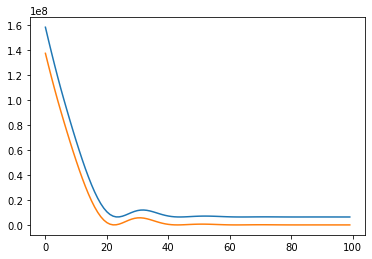

In [151]:
plt.plot(losses[:100])
plt.plot(losses_val[:100])

Escalado de variables (para media 0 y std 1):

In [ ]:
for column in NUMERICAL_COLUMNS_DAILY:
    mean, std = dataset_daily

### Modelo de regresión lineal

Modelo de regresión lineal utilizando sólo variables climáticas:

In [104]:
dataset_daily_lognormal = dataset_daily.copy()
dataset_daily_lognormal[COL_BIKES_RIDES] = np.log(dataset_daily_lognormal[COL_BIKES_RIDES])

In [117]:
train_daily, test_daily = prepare_data(dataset_daily)
train_daily_lognormal, test_daily_lognormal = prepare_data(dataset_daily_lognormal)

In [118]:
linear_regression_model_daily = create_linear_regression_model()
linear_regression_model_daily = train(linear_regression_model_daily, train_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                                                    COL_WEATHER_RAIN, 
                                                                                                    COL_WEATHER_WIND_MEAN], target_column=TARGET)
rmse_daily_weather = evaluate(linear_regression_model_daily, test_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                      COL_WEATHER_RAIN, 
                                                                      COL_WEATHER_WIND_MEAN], target_column=TARGET, metric='rmse')
print('RMSE (modelo diario, variables climatológicas): {}'.format(rmse_daily_weather))

RMSE (modelo diario, variables climatológicas): 52.75975383990383


Añadiendo el día de la semana:

In [119]:
linear_regression_model_daily = create_linear_regression_model()
linear_regression_model_daily = train(linear_regression_model_daily, train_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                                                    COL_WEATHER_RAIN, 
                                                                                                    COL_WEATHER_WIND_MEAN,
                                                                                                    'weekend_weekend',
                                                                                                    'weekend_weekend'] , target_column=TARGET)
rmse_daily_weather_weekend = evaluate(linear_regression_model_daily, test_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                                                     COL_WEATHER_RAIN, 
                                                                                                     COL_WEATHER_WIND_MEAN,
                                                                                                    'weekend_weekend',
                                                                                                    'weekend_weekend'], target_column=TARGET, metric='rmse')
print('RMSE (modelo diario, variables climatológicas + fin de semana/entre semana): {}'.format(rmse_daily_weather_weekend))

RMSE (modelo diario, variables climatológicas + fin de semana/entre semana): 28.517810339550394


In [120]:
linear_regression_model_daily = create_linear_regression_model()
linear_regression_model_daily = train(linear_regression_model_daily, train_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                                                    COL_WEATHER_RAIN, 
                                                                                                    COL_WEATHER_WIND_MEAN] + ENCODED_CATEGORIAL_COLUMNS_DAILY, target_column=TARGET)
rmse_daily_weather_dayofweek = evaluate(linear_regression_model_daily, test_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                      COL_WEATHER_RAIN, 
                                                                      COL_WEATHER_WIND_MEAN] + ENCODED_CATEGORIAL_COLUMNS_DAILY, target_column=TARGET, metric='rmse')
print('RMSE (modelo diario, variables climatológicas + día de la semana + fin de semana/entre semana): {}'.format(rmse_daily_weather_dayofweek))

RMSE (modelo diario, variables climatológicas + día de la semana + fin de semana/entre semana): 46.41182505625355


Añadiendo la cantidad media de trayectos para ese día de la semana:

In [121]:
linear_regression_model_daily = create_linear_regression_model()
linear_regression_model_daily = train(linear_regression_model_daily, train_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                                                    COL_WEATHER_RAIN, 
                                                                                                    COL_WEATHER_WIND_MEAN,
                                                                                                    COL_BIKES_RIDES_MEAN_WEEKDAY] + ENCODED_CATEGORIAL_COLUMNS_DAILY, target_column=TARGET)
rmse_daily_weather_dayofweek_meanrides = evaluate(linear_regression_model_daily, test_daily, features_columns=[COL_WEATHER_TEMP_MEAN, 
                                                                                                     COL_WEATHER_RAIN, 
                                                                                                     COL_WEATHER_WIND_MEAN,
                                                                                                     COL_BIKES_RIDES_MEAN_WEEKDAY] + ENCODED_CATEGORIAL_COLUMNS_DAILY, target_column=TARGET, metric='rmse')
print('RMSE (modelo diario, variables climatológicas + día de la semana + fin de semana/entre semana + número medio de trayectos para ese día de la semana): {}'.format(rmse_daily_weather_dayofweek_meanrides))

RMSE (modelo diario, variables climatológicas + día de la semana + fin de semana/entre semana + número medio de trayectos para ese día de la semana): 46.4118250562664
